# Data Preparation

## Data Preparation for Regression Train csv file

In [1]:
#import pandas
import pandas as pd

C:\Users\claud\AppData\Local\Temp\ipykernel_4332\4083740381.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import data
df = pd.read_csv('Regression_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          5376 non-null   int64  
 1   Crash ID                            5266 non-null   float64
 2   Crash Date                          5267 non-null   object 
 3   Crash Severity                      5259 non-null   object 
 4   Crash Time                          5376 non-null   object 
 5   Day of Week                         5264 non-null   object 
 6   Nearest Trauma Center Distance      5266 non-null   object 
 7   Time Arrived                        5283 non-null   object 
 8   Time Notified                       5264 non-null   object 
 9   Time Roadway Cleared                5376 non-null   object 
 10  Weather Condition                   5376 non-null   object 
 11  Autonomous Level Engaged            5273 no

In [4]:
df.describe()

,Unnamed: 0,Crash ID
count,5376.000000,5.266000e+03
mean,2687.500000,1.978672e+07
std,1552.061854,1.476784e+05
min,0.000000,1.952228e+07
25%,1343.750000,1.966853e+07
50%,2687.500000,1.978774e+07
75%,4031.250000,1.990848e+07
max,5375.000000,2.005731e+07


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash ID                            5266 non-null   float64
 1   Crash Date                          5267 non-null   object 
 2   Crash Severity                      5259 non-null   object 
 3   Crash Time                          5376 non-null   object 
 4   Day of Week                         5264 non-null   object 
 5   Nearest Trauma Center Distance      5266 non-null   object 
 6   Time Arrived                        5283 non-null   object 
 7   Time Notified                       5264 non-null   object 
 8   Time Roadway Cleared                5376 non-null   object 
 9   Weather Condition                   5376 non-null   object 
 10  Autonomous Level Engaged            5273 non-null   object 
 11  Autonomous Unit - Reported          5274 no

### Crash Date imputation

In [7]:
#next one os crash date which we impute nan values because it is helpful for imputing week column
#may be after discussion we have to decide to keep the crash date column or not
p= df['Crash Date'][df['Crash Date'].isnull()].index
r = df['Crash Date'].isnull().sum()
print(r)
print(p)
# as it reperesents we have 109 null values 

109
Index([ 102,  125,  158,  166,  171,  251,  291,  511,  566,  577,
       ...
       4876, 4903, 4967, 4991, 5124, 5137, 5184, 5200, 5231, 5264],
      dtype='int64', length=109)


In [8]:
import numpy as np
import pandas as pd

# Assign the value of the above or below row to the null value
for i in df.index:
    if df['Crash Date'].isnull().iloc[i]:
        # Check if the row above is the same as the row below
        if df['Crash Date'].iloc[i - 1] == df['Crash Date'].iloc[i + 1]:
            # Assign the value of the above or below row to the null value
            df.loc[i, 'Crash Date'] = df['Crash Date'].iloc[i - 1]

print(df['Crash Date'].isnull().sum()) 
print(df['Crash Date']) 
df.to_csv('output.csv', index=False)

16
0       5/1/2023
1       5/1/2023
2       5/1/2023
3       5/1/2023
4       5/1/2023
          ...   
5371    3/1/2024
5372    3/1/2024
5373    3/1/2024
5374    3/1/2024
5375    3/1/2024
Name: Crash Date, Length: 5376, dtype: object


In [9]:
p= df['Crash Date'][df['Crash Date'].isnull()].index
print(p)
#now this 16 we are imputing manually

Index([ 166,  511, 1128, 1252, 1389, 1437, 1659, 2841, 3772, 3895, 4392, 4393,
       4798, 4821, 4903, 5264],
      dtype='int64')


In [10]:
df.loc[166, 'Crash Date'] = '5/10/2023'
df.loc[511, 'Crash Date'] = '5/27/2023'
df.loc[1128, 'Crash Date'] = '6/28/2023'
df.loc[1252, 'Crash Date'] = '7/15/2023'
df.loc[1389, 'Crash Date'] = '7/22/2023'
df.loc[1437, 'Crash Date'] = '7/25/2023'
df.loc[1659, 'Crash Date'] = '8/8/2023'
df.loc[2841, 'Crash Date'] = '10/6/2023'
df.loc[3772, 'Crash Date'] = '11/18/2023'
df.loc[3895, 'Crash Date'] = '11/25/2023'
df.loc[4392, 'Crash Date'] = '12/19/2023'
df.loc[4393, 'Crash Date'] = '12/19/2023'
df.loc[4798, 'Crash Date'] = '1/20/2024'
df.loc[4821, 'Crash Date'] = '1/22/2024'
df.loc[4903, 'Crash Date'] = '1/28/2024'
df.loc[5264, 'Crash Date'] = '2/22/2024'
print(df['Crash Date'].isnull().sum()) 

0


### CRASH SEVERITY column data imputation

In [11]:
df['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 3459
B - SUSPECTED MINOR INJURY       796
C - POSSIBLE INJURY              733
99 - UNKNOWN                     149
A - SUSPECTED SERIOUS INJURY     101
K - FATAL INJURY                  21
Name: count, dtype: int64

In [12]:
df['Crash Severity'].isna().sum()

117

Our team has chosen to impute data on the Crash Severity column based on a crosstab between the Vehicle Damage and Crash Severity columns.
We will take the highest frequency found in the Crash Severity category per Vehicle Damage Rating category
For example, if for Vehicle Damage Rating, category 0 - No Damage has the highest frequency in the category of Crash Severity is Not Injured, then to our NaN values in Crash Severity data with Vehicle Damage of 0, we will impute Not Injury as the category. 

In [13]:
# Replace 'No Data' category in Vehicle Damage Rating with np.nan 

df['Vehicle Damage Rating 1 - Severity'] = df['Vehicle Damage Rating 1 - Severity'].replace('No Data', np.nan)

In [14]:
# import Numpy 

import numpy as np

pd.crosstab(df['Crash Severity'], df['Vehicle Damage Rating 1 - Severity'])

Vehicle Damage Rating 1 - Severity,0 - NO DAMAGE,1 - DAMAGED 1 MINIMUM,2 - DAMAGED 2,3 - DAMAGED 3,4 - DAMAGED 4,5 - DAMAGED 5,6 - DAMAGED 6,7 - DAMAGED 7 HIGHEST
Crash Severity,,,,,,,,
99 - UNKNOWN,0,14,28,25,3,1,0,0
A - SUSPECTED SERIOUS INJURY,9,4,8,27,21,8,2,5
B - SUSPECTED MINOR INJURY,21,110,197,217,124,41,21,4
C - POSSIBLE INJURY,12,124,296,188,53,8,4,5
K - FATAL INJURY,0,2,2,2,6,3,1,0
N - NOT INJURED,60,1066,1153,652,205,48,10,3


In [15]:
df.loc[(df['Crash Severity'].isna()) & (df['Vehicle Damage Rating 1 - Severity'] == '0 - NO DAMAGE'), ['Crash Severity']] = 'N - NOT INJURED'
df.loc[(df['Crash Severity'].isna()) & (df['Vehicle Damage Rating 1 - Severity'] == '1 - DAMAGED 1 MINIMUM'), ['Crash Severity']] = 'N - NOT INJURED' 
df.loc[(df['Crash Severity'].isna()) & (df['Vehicle Damage Rating 1 - Severity'] == '2 - DAMAGED 2'), ['Crash Severity']] = 'N - NOT INJURED'
df.loc[(df['Crash Severity'].isna()) & (df['Vehicle Damage Rating 1 - Severity'] == '3 - DAMAGED 3'), ['Crash Severity']] = 'N - NOT INJURED'
df.loc[(df['Crash Severity'].isna()) & (df['Vehicle Damage Rating 1 - Severity'] == '4 - DAMAGED 4'), ['Crash Severity']] = 'N - NOT INJURED'
df.loc[(df['Crash Severity'].isna()) & (df['Vehicle Damage Rating 1 - Severity'] == '5 - DAMAGED 5'), ['Crash Severity']] = 'N - NOT INJURED'
df.loc[(df['Crash Severity'].isna()) & (df['Vehicle Damage Rating 1 - Severity'] == '6 - DAMAGED 6'), ['Crash Severity']] = 'B - SUSPECTED MINOR INJURY' 
df.loc[(df['Crash Severity'].isna()) & (df['Vehicle Damage Rating 1 - Severity'] == '7 - DAMAGED 7 HIGHEST'), ['Crash Severity']] = 'A - SUSPECTED SERIOUS INJURY	'

In [16]:
# Checking for any NaN values left 

df['Crash Severity'].isna().sum()

16

In [17]:
# Since Vehicle Damage Rating has some NaN values, and this is why we are still left with 16 NaN values for Crash Severity column
# Our Team has decided to assign these NaN values the category of 99 - UNKNOWN

df['Crash Severity'] = df['Crash Severity'].replace(np.nan, '99 - UNKNOWN') 
df['Crash Severity'].isna().sum()

0

### Crash Time Column Data Imputation

In [18]:
# Check for missing values 

df['Crash Time'].isna().sum()

0

Our team has observed that the Crash Time column is a full non-missing values column.

In [19]:
df['Crash Time'].isna().sum()

0

### Day of Week Column Data Imputation

For this column, our team has observed the following:
- Categorical data: ordinal since days of the week follow an specific order

In [20]:
# Day of week value counts:

df['Day of Week'].value_counts()


Day of Week
FRIDAY       961
THURSDAY     833
TUESDAY      774
MONDAY       765
WEDNESDAY    754
SATURDAY     617
SUNDAY       560
Name: count, dtype: int64

In [21]:
# Check for missing values

df['Day of Week'].isna().sum()

112

In [22]:
# we are going to impute the Day of Week column using Crash Date column

df['Crash Date'] = pd.to_datetime(df['Crash Date'])

# Impute missing values in 'Day of Week' based on 'Crash Date'
df['Day of Week'] = df.apply(lambda row: row['Crash Date'].strftime('%A').upper() if pd.isna(row['Day of Week']) else row['Day of Week'], axis=1)


In [23]:
#Check for any missing values left

df['Day of Week'].isna().sum()

0

### Nearest Trauma Center Distance Column Data Imputation

In [24]:
# Nearest Trauma Center value counts

df['Nearest Trauma Center Distance'].value_counts()

Nearest Trauma Center Distance
No Data    4538
5.916        19
2.491        12
4.489        11
4.354        10
           ... 
4.62          1
0.988         1
1.354         1
5.685         1
7.712         1
Name: count, Length: 272, dtype: int64

In [25]:
# Replacing the No Data category with np.nan

df['Nearest Trauma Center Distance'] = df['Nearest Trauma Center Distance'].replace('No Data', np.nan)

In [26]:
# Check for missing values:

df['Nearest Trauma Center Distance'].isna().sum()

4648

In [27]:
# Calculate percentage of NaN values in the Nearest Trauma Center Distance

(df['Nearest Trauma Center Distance'].isna().sum() / df['Nearest Trauma Center Distance'].size)*100

# since we have a 86.46% of Nan values for the column Nearest Trauma Center Distance, we have decided to drop it to avoid adding noise to our analysis

86.45833333333334

In [28]:
# Drop Nearest Trauma Center Distance column

df.drop('Nearest Trauma Center Distance', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Crash ID                            5266 non-null   float64       
 1   Crash Date                          5376 non-null   datetime64[ns]
 2   Crash Severity                      5376 non-null   object        
 3   Crash Time                          5376 non-null   object        
 4   Day of Week                         5376 non-null   object        
 5   Time Arrived                        5283 non-null   object        
 6   Time Notified                       5264 non-null   object        
 7   Time Roadway Cleared                5376 non-null   object        
 8   Weather Condition                   5376 non-null   object        
 9   Autonomous Level Engaged            5273 non-null   object        
 10  Autonomous Unit - Report

### Time Arrived Column Data Imputation 

Time Arrived in a Vehicle Crash Report means when emergency responders or law enforcement arrived at the accident scene. 

In [29]:
# Time Arrived value counts

df['Time Arrived'].value_counts()

Time Arrived
No Data    4451
16:20        11
15:50        10
13:13        10
13:39        10
           ... 
23:40         1
00:01         1
11:32         1
11:09         1
18:26         1
Name: count, Length: 327, dtype: int64

In [30]:
# Replacing the No Data category with np.nan

df['Time Arrived'] = df['Time Arrived'].replace('No Data', np.nan)

In [31]:
# Check for missing values:

df['Time Arrived'].isna().sum()

4544

In [32]:
# Calculate the percentage of NaN values in the Time Arrived column

(df['Time Arrived'].isna().sum() / df['Time Arrived'].size)*100

# since we have a 84.52% of Nan values for the column Nearest Trauma Center Distance, we have decided to drop it to avoid adding noise to our analysis


84.52380952380952

In [33]:
# Drop Time Arrived column

df.drop('Time Arrived', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Crash ID                            5266 non-null   float64       
 1   Crash Date                          5376 non-null   datetime64[ns]
 2   Crash Severity                      5376 non-null   object        
 3   Crash Time                          5376 non-null   object        
 4   Day of Week                         5376 non-null   object        
 5   Time Notified                       5264 non-null   object        
 6   Time Roadway Cleared                5376 non-null   object        
 7   Weather Condition                   5376 non-null   object        
 8   Autonomous Level Engaged            5273 non-null   object        
 9   Autonomous Unit - Reported          5274 non-null   object        
 10  Vehicle Damage Rating 1 

### Time Notified Column Data Imputation

The values of this column represent when emergency responders were notified about the vehicle crash.

In [34]:
# Time Notified value counts

df['Time Notified'].value_counts()

Time Notified
No Data    4432
16:56        11
16:20        10
08:59         9
13:03         9
           ... 
20:06         1
03:20         1
08:15         1
21:10         1
11:58         1
Name: count, Length: 321, dtype: int64

In [35]:
# Replacing the No Data category with np.nan

df['Time Notified'] = df['Time Notified'].replace('No Data', np.nan)

In [36]:
# Check for missing values:

df['Time Notified'].isna().sum()

4544

In [37]:
# Calculate the percentage of NaN values in the Time Arrived column

(df['Time Notified'].isna().sum() / df['Time Notified'].size)*100

# since we have a 84.52% of Nan values for the column Nearest Trauma Center Distance, we have decided to drop it to avoid adding noise to our analysis


84.52380952380952

In [38]:
# Drop Time Arrived column

df.drop('Time Notified', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Crash ID                            5266 non-null   float64       
 1   Crash Date                          5376 non-null   datetime64[ns]
 2   Crash Severity                      5376 non-null   object        
 3   Crash Time                          5376 non-null   object        
 4   Day of Week                         5376 non-null   object        
 5   Time Roadway Cleared                5376 non-null   object        
 6   Weather Condition                   5376 non-null   object        
 7   Autonomous Level Engaged            5273 non-null   object        
 8   Autonomous Unit - Reported          5274 non-null   object        
 9   Vehicle Damage Rating 1 - Severity  4894 non-null   object        
 10  Vehicle Model Year      

### Time Roadway Cleared Column Data Imputation

The values in this column represents when the roadway, in which the Vehicle Crash took place, was completely clear of debris allowing regular traffic to circulate.

In [39]:
# Check for missing values

df['Time Roadway Cleared'].isna().sum()

0

Our team has observed that the Time Roadway Cleared column is a full non-missing values column.

### Weather Condition Column Data Imputation 

For this column, our team has made the following observations:
- Categorical data: nominal
- Each category represents a different weather condition

In [40]:
# Weather Condition value counts

df['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            4304
2 - CLOUDY                            531
3 - RAIN                              394
Unknown                                49
No Data                                46
99 - UNKNOWN                           27
6 - FOG                                11
5 - SNOW                                6
4 - SLEET/HAIL                          4
98 - OTHER (EXPLAIN IN NARRATIVE)       4
Name: count, dtype: int64

In [41]:
# Since we have observed that we have two Unknown categories in the Weather Condition column, we will proceed to join them

df['Weather Condition'] = df['Weather Condition'].replace('Unknown', '99 - UNKNOWN')

# Also, replace 'No Data' with np.nan

df['Weather Condition'] = df['Weather Condition'].replace('No Data', np.nan)

# Value count
df['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            4304
2 - CLOUDY                            531
3 - RAIN                              394
99 - UNKNOWN                           76
6 - FOG                                11
5 - SNOW                                6
4 - SLEET/HAIL                          4
98 - OTHER (EXPLAIN IN NARRATIVE)       4
Name: count, dtype: int64

In [42]:
# Check for missing values

df['Weather Condition'].isna().sum()

46

In [43]:
df[df['Weather Condition'].isna()]

,Crash ID,Crash Date,Crash Severity,Crash Time,Day of Week,Time Roadway Cleared,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
204,19541148.0,2023-05-12,N - NOT INJURED,12:03,FRIDAY,13:08,NaN,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2005,34,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
255,19542602.0,2023-05-14,C - POSSIBLE INJURY,18:01,SUNDAY,18:39,NaN,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019,27,No Data,97 - NOT APPLICABLE,H - HISPANIC,2 - FEMALE
381,19556297.0,2023-05-21,C - POSSIBLE INJURY,09:18,SUNDAY,09:53,NaN,NaN,2 - NO,3 - DAMAGED 3,2016,25,No Data,97 - NOT APPLICABLE,H - HISPANIC,2 - FEMALE
544,19579474.0,2023-05-30,C - POSSIBLE INJURY,15:20,TUESDAY,16:06,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2018,32,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE
723,19604379.0,2023-06-08,N - NOT INJURED,22:45,THURSDAY,22:45,NaN,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2013,16,No Data,No Data,A - ASIAN,2 - FEMALE
899,NaN,2023-06-20,N - NOT INJURED,13:44,TUESDAY,15:00,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2018,32,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE
1038,19632494.0,2023-06-29,N - NOT INJURED,16:40,THURSDAY,16:42,NaN,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2011,37,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
1133,19640672.0,2023-07-07,N - NOT INJURED,14:19,FRIDAY,14:53,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2018,33,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
1366,19662839.0,2023-07-21,C - POSSIBLE INJURY,18:35,FRIDAY,19:29,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2021,No Data,No Data,No Data,A - ASIAN,NaN
1463,19680308.0,2023-07-26,N - NOT INJURED,20:44,WEDNESDAY,21:29,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2009,22,NaN,No Data,B - BLACK,1 - MALE


After reviewing the NaN values in the Weather Condition, our team will check for the following criteria using an iteration to impute data in this column NaN values:

- Crash ID same as above or below
- Crash Time same as above or below
- If none of the above criteria are met, then attribute the mode of this column to the NaN value

This way, our team believes to have a more accurate imputation method for this column.

In [44]:
import numpy as np
import pandas as pd

# Assign the value of the above or below row to the null value
for i in df.index:
    if df['Weather Condition'].isnull().iloc[i]:
        # Check if the row above is the same as the row below
        if i > 0 and df['Crash Date'].iloc[i - 1] == df['Crash Date'].iloc[i] and df['Crash Time'].iloc[i - 1] == df['Crash Time'].iloc[i]:
            # Assign the value of the above or below row to the null value
               df.loc[i, 'Weather Condition'] = df['Weather Condition'].iloc[i - 1] 
        elif i < len(df) - 1 and df['Crash Date'].iloc[i + 1] == df['Crash Date'].iloc[i] and df['Crash Time'].iloc[i + 1] == df['Crash Time'].iloc[i]: 
               df.loc[i, 'Weather Condition'] = df['Weather Condition'].iloc[i + 1] 
             

print(df['Weather Condition'].isnull().sum()) 
print(df['Weather Condition']) 
df.to_csv('output1.csv', index=False)

2
0       1 - CLEAR
1       1 - CLEAR
2       1 - CLEAR
3       1 - CLEAR
4       1 - CLEAR
          ...    
5371    1 - CLEAR
5372    1 - CLEAR
5373    1 - CLEAR
5374    1 - CLEAR
5375    1 - CLEAR
Name: Weather Condition, Length: 5376, dtype: object


In [45]:
df[df['Weather Condition'].isna()]

,Crash ID,Crash Date,Crash Severity,Crash Time,Day of Week,Time Roadway Cleared,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
3803,19880797.0,2023-11-20,N - NOT INJURED,10:24,MONDAY,10:24,NaN,0 - NO AUTOMATION,2 - NO,4 - DAMAGED 4,2019,19,NaN,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
4211,19926519.0,2023-12-11,99 - UNKNOWN,16:00,MONDAY,16:06,NaN,0 - NO AUTOMATION,2 - NO,NaN,2021,No Data,No Data,97 - NOT APPLICABLE,99 - UNKNOWN,99 - UNKNOWN


In [46]:
# Since we still have 2 NaN values in our column, we proceeded to replace them with the mode on this column that is  1-Clear

df['Weather Condition'] = df['Weather Condition'].fillna(df['Weather Condition'].mode()[0])

In [47]:
# Check for NaN values
df[df['Weather Condition'].isna()]

,Crash ID,Crash Date,Crash Severity,Crash Time,Day of Week,Time Roadway Cleared,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender


### Autonomous Level Engaged Column Data Imputation

The values in this column represent the level of autonomy or automation that was active in the vehicle involved in the crash.
With advancements in automative technology, some vehicles are equipped with autonomous driving capabilities, which allow them to operate with varying levels of automation.

Our team has made the following observations:
- Two categories: '0 - Automation' and '99 - Unknown'
- Since we have binomial data, we will inpit data with the category that has the highest frequency.

In [48]:
# Autonomous Level Engaged Column value counts

df['Autonomous Level Engaged'].value_counts()

Autonomous Level Engaged
0 - NO AUTOMATION    4961
99 - UNKNOWN          312
Name: count, dtype: int64

In [49]:
# Check for missing values

df['Autonomous Level Engaged'].isna().sum()

103

In [50]:
# replae NaN values with '0 - NO AUTOMATION' category since it has the highest frequency or mode

df['Autonomous Level Engaged'] = df['Autonomous Level Engaged'].fillna(df['Autonomous Level Engaged'].mode()[0])

In [51]:
# check for missing values

df['Autonomous Level Engaged'].isna().sum()

0

### Autonomous Unit - Reported

The values in this column represent whether an autonomous vehicle or its system reported information about the accident 

Our team has made the following observations:
- Two categories (binomial data): '2 - NO' and '99 - UNKNOWN'
- Since we have binomial data, we will input data with the category that has the highest frequency.

In [52]:
# Autonomous Level Engaged Column value counts

df['Autonomous Unit - Reported'].value_counts()

Autonomous Unit - Reported
2 - NO          4968
99 - UNKNOWN     306
Name: count, dtype: int64

In [53]:
# Check for missing values

df['Autonomous Unit - Reported'].isna().sum()

102

In [54]:
# replae NaN values with '0 - NO AUTOMATION' category since it has the highest frequency or mode

df['Autonomous Unit - Reported'] = df['Autonomous Unit - Reported'].fillna(df['Autonomous Unit - Reported'].mode()[0])

In [55]:
# Check for missing values

df['Autonomous Unit - Reported'].isna().sum()

0

### Vehicle Damage Rating 1 - Severity

Our team has made the following observations:
- Ordinal data (inherent ranking or order)
- Category 'No Data' will be replace with np.nan, and we will fill these missing values
- Doing a Cross Tab between Vehicle Damage Rating 1 and Crash Severity to get the highest frequency (mode) per category.

In [56]:
# Replace label "No Data" with np.nan

df['Vehicle Damage Rating 1 - Severity'] = df['Vehicle Damage Rating 1 - Severity'].replace('No Data', np.nan)

# Print the amount of NaN values in the Vehicle Damage Rating 1 - Severity column

print(df['Vehicle Damage Rating 1 - Severity'].isna().sum())

482


In [57]:
pd.crosstab(df['Vehicle Damage Rating 1 - Severity'], df['Crash Severity'])

Crash Severity,99 - UNKNOWN,A - SUSPECTED SERIOUS INJURY,B - SUSPECTED MINOR INJURY,C - POSSIBLE INJURY,K - FATAL INJURY,N - NOT INJURED
Vehicle Damage Rating 1 - Severity,,,,,,
0 - NO DAMAGE,0,9,21,12,0,62
1 - DAMAGED 1 MINIMUM,14,4,110,124,2,1085
2 - DAMAGED 2,28,8,197,296,2,1191
3 - DAMAGED 3,25,27,217,188,2,682
4 - DAMAGED 4,3,21,124,53,6,211
5 - DAMAGED 5,1,8,41,8,3,53
6 - DAMAGED 6,0,2,22,4,1,10
7 - DAMAGED 7 HIGHEST,0,5,4,5,0,3


In [58]:
df.loc[(df['Vehicle Damage Rating 1 - Severity'].isna()) & (df['Crash Severity'] == '99 - UNKNOWN'), ['Vehicle Damage Rating 1 - Severity']] = '2 - DAMAGED 2'
df.loc[(df['Vehicle Damage Rating 1 - Severity'].isna()) & (df['Crash Severity'] == 'A - SUSPECTED SERIOUS INJURY'), ['Vehicle Damage Rating 1 - Severity']] = '3 - DAMAGED 3' 
df.loc[(df['Vehicle Damage Rating 1 - Severity'].isna()) & (df['Crash Severity'] == 'B - SUSPECTED MINOR INJURY'), ['Vehicle Damage Rating 1 - Severity']] = '3 - DAMAGED 3'
df.loc[(df['Vehicle Damage Rating 1 - Severity'].isna()) & (df['Crash Severity'] == 'C - POSSIBLE INJURY'), ['Vehicle Damage Rating 1 - Severity']] = '2 - DAMAGED 2'
df.loc[(df['Vehicle Damage Rating 1 - Severity'].isna()) & (df['Crash Severity'] == 'K - FATAL INJURY'), ['Vehicle Damage Rating 1 - Severity']] = '4 - DAMAGED 4'
df.loc[(df['Vehicle Damage Rating 1 - Severity'].isna()) & (df['Crash Severity'] == 'N - NOT INJURED'), ['Vehicle Damage Rating 1 - Severity']] = '2 - DAMAGED 2'

In [59]:
# Check for missing values
df['Vehicle Damage Rating 1 - Severity'].isna().sum()


0

### Vehicle Model Year Column Data Imputation



In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Crash ID                            5266 non-null   float64       
 1   Crash Date                          5376 non-null   datetime64[ns]
 2   Crash Severity                      5376 non-null   object        
 3   Crash Time                          5376 non-null   object        
 4   Day of Week                         5376 non-null   object        
 5   Time Roadway Cleared                5376 non-null   object        
 6   Weather Condition                   5376 non-null   object        
 7   Autonomous Level Engaged            5376 non-null   object        
 8   Autonomous Unit - Reported          5376 non-null   object        
 9   Vehicle Damage Rating 1 - Severity  5376 non-null   object        
 10  Vehicle Model Year      

In [61]:
# Vehicle Model Year value counts

df['Vehicle Model Year'].value_counts()

Vehicle Model Year
2018       376
2016       349
2019       334
2017       319
No Data    318
2020       314
2022       292
2015       291
2021       275
2013       270
2023       260
2014       255
2012       213
2010       175
2007       152
2011       148
2009       142
2006       141
2008       128
2004       101
2005        84
2003        69
2002        51
2001        49
2024        39
2000        37
1999        26
1998        15
1996        13
1997        11
1995        10
1990         4
1991         2
1970         2
1989         2
1993         1
1994         1
1992         1
1978         1
1980         1
1984         1
Name: count, dtype: int64

In [62]:
# change data type for Vehicle Model Year to float

df['Vehicle Model Year'] = df['Vehicle Model Year'].replace('No Data', np.nan)

# Calculate the amount of NaN values in this column
df['Vehicle Model Year'].isna().sum()

421

In [63]:
# change data type for Vehicle Model Year to float
# exclude nan values to avoid an error
df['Vehicle Model Year'] = df['Vehicle Model Year'].dropna().astype(int)

In [64]:
crash_severity_frequency = df.groupby('Crash Severity')['Vehicle Model Year'].apply(lambda x: x.mode().iloc[0])

crash_severity_frequency

Crash Severity
99 - UNKNOWN                    2016.0
A - SUSPECTED SERIOUS INJURY    2018.0
B - SUSPECTED MINOR INJURY      2019.0
C - POSSIBLE INJURY             2018.0
K - FATAL INJURY                2017.0
N - NOT INJURED                 2016.0
Name: Vehicle Model Year, dtype: float64

In [65]:
# Change data type of the series crash_severity_frequency to integers

crash_severity_frequency = crash_severity_frequency.astype(int)
crash_severity_frequency


# Transform the series crash_severity_sorted into a dictionary

crash_severity_frequency = crash_severity_frequency.to_dict()

crash_severity_frequency

{'99 - UNKNOWN': 2016,
 'A - SUSPECTED SERIOUS INJURY': 2018,
 'B - SUSPECTED MINOR INJURY': 2019,
 'C - POSSIBLE INJURY': 2018,
 'K - FATAL INJURY': 2017,
 'N - NOT INJURED': 2016}

In [66]:
# Creating a mask with the conditions needed

mask = df['Vehicle Model Year'].isna() & df['Crash Severity'].isin(crash_severity_frequency)

In [67]:
# Using .loc to iterate through rows and applying the mask that contains the conditions to update the nan values with info in the dictionary
#here we also use mapping to replace the values with their corresponding highest frequency Crash Severity that can be found in the dictionary

df.loc[mask, 'Vehicle Model Year'] = df.loc[mask, 'Crash Severity'].map(crash_severity_frequency)

In [68]:
# Check for missing values

df['Vehicle Model Year'].isna().sum()

0

In [69]:
# Check the value counts 
df['Vehicle Model Year'].value_counts()

Vehicle Model Year
2016.0    668
2018.0    427
2019.0    380
2017.0    324
2020.0    314
2022.0    292
2015.0    291
2021.0    275
2013.0    270
2023.0    260
2014.0    255
2012.0    213
2010.0    175
2007.0    152
2011.0    148
2009.0    142
2006.0    141
2008.0    128
2004.0    101
2005.0     84
2003.0     69
2002.0     51
2001.0     49
2024.0     39
2000.0     37
1999.0     26
1998.0     15
1996.0     13
1997.0     11
1995.0     10
1990.0      4
1991.0      2
1989.0      2
1970.0      2
1993.0      1
1994.0      1
1992.0      1
1978.0      1
1980.0      1
1984.0      1
Name: count, dtype: int64

### Person Age Column Data Imputation
For this column, our team has decided to replace the missing values with median or mean depending on the distribution of the values on this column.

In [70]:
# Person Age value counts:

df['Person Age'].value_counts()

Person Age
No Data    334
21         230
19         218
20         196
22         187
          ... 
89           4
85           4
88           2
91           2
93           1
Name: count, Length: 94, dtype: int64

In [71]:
# Replace 'No Data' with np.nan

df['Person Age'] = df['Person Age'].replace('No Data', np.nan)

In [72]:
# Change the data type to integers

df['Person Age'] = df['Person Age'].dropna().astype(int) 

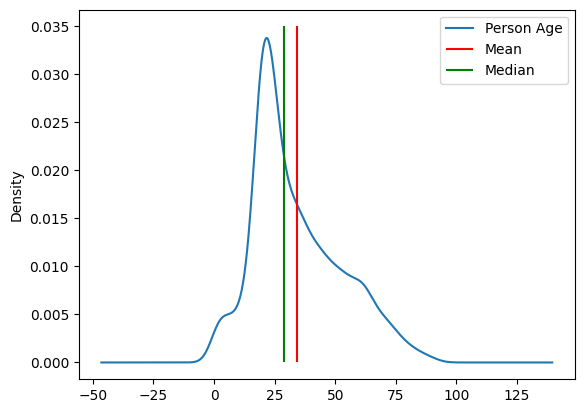

In [73]:
# plot the in a kde the distribution of this column's value to decide whether to use the mean or median

import matplotlib.pyplot as plt

df['Person Age'].plot(kind = 'kde')
plt.vlines(df['Person Age'].mean(), ymin= 0, ymax= 0.035, color = 'r', label = 'Mean')
plt.vlines(df['Person Age'].median(), ymin= 0, ymax= 0.035, color = 'g', label = 'Median')
plt.legend()

Based on the distribution above, we have decided to use the Median for Person Age column to fill the missing values in this column.

In [74]:
# Fill the missing values in the Person Age column with the median

df.fillna({'Person Age': df['Person Age'].median()}, inplace = True)

In [75]:
df['Person Age'].value_counts()

Person Age
29.0    535
21.0    230
19.0    218
20.0    196
22.0    187
       ... 
89.0      4
85.0      4
88.0      2
91.0      2
93.0      1
Name: count, Length: 93, dtype: int64

In [76]:
df['Person Age'].unique()

array([19., 37., 29., 23., 24., 61., 31., 17., 55., 26., 47., 27., 28.,
       21., 59., 50.,  2., 18.,  3., 62., 32., 54., 35., 22., 56.,  1.,
       25., 51., 75., 74., 65., 52., 70., 53., 42., 36., 16., 49., 44.,
       58., 20., 67., 73., 63., 46., 15., 34., 38.,  5., 11., 41., 84.,
       39., 64., 48., 57., 30., 45., 80.,  9.,  8., 43., 79., 13., 33.,
       40., 12.,  6., 14.,  4., 72.,  0.,  7., 66., 69., 68., 90., 60.,
       81., 71., 78., 83., 88., 76., 87., 77., 86., 89., 10., 93., 85.,
       91., 82.])

### Person Alcohol Result Column Data Imputation

In [77]:
df['Person Alcohol Result'].value_counts()

Person Alcohol Result
No Data         5262
1 - POSITIVE      15
2 - NEGATIVE       8
Name: count, dtype: int64

In [78]:
# Replace 'No Data' values with np.nan

df['Person Alcohol Result'] = df['Person Alcohol Result'].replace('No Data', np.nan)

# Calculate the amoun NaN value in this column
df['Person Alcohol Result'].isna().sum()

5353

In [79]:
# Calculate the percentage of missing values in this column

(df['Person Alcohol Result'].isna().sum() / df['Person Alcohol Result'].size)*100

99.57217261904762

Since there is a 99.57% of missing values in the column Person Alcohol Result, our team has decided to drop this column.

In [80]:
# Drop the Person Alcohol Result column

df.drop('Person Alcohol Result', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Crash ID                            5266 non-null   float64       
 1   Crash Date                          5376 non-null   datetime64[ns]
 2   Crash Severity                      5376 non-null   object        
 3   Crash Time                          5376 non-null   object        
 4   Day of Week                         5376 non-null   object        
 5   Time Roadway Cleared                5376 non-null   object        
 6   Weather Condition                   5376 non-null   object        
 7   Autonomous Level Engaged            5376 non-null   object        
 8   Autonomous Unit - Reported          5376 non-null   object        
 9   Vehicle Damage Rating 1 - Severity  5376 non-null   object        
 10  Vehicle Model Year      

### Person Drug Test Result Column Data Imputation

In [81]:
df['Person Drug Test Result'].value_counts()

Person Drug Test Result
97 - NOT APPLICABLE    3832
No Data                1347
99 - UNKNOWN             61
1 - POSITIVE              5
2 - NEGATIVE              4
Name: count, dtype: int64

In [82]:
# Replace No Data with np.nan values

df['Person Drug Test Result'] = df['Person Drug Test Result'].replace('No Data', np.nan)

# Calculate the percentage of missing values in this column

df['Person Drug Test Result'].isna().sum()

1474

In [83]:
# Calculate the percentage of missing values for the Person Drug Test Result column

(df['Person Drug Test Result'].isna().sum() / df['Person Drug Test Result'].size)*100

27.418154761904763

In [84]:
# Person Drug Test Result value counts

df['Person Drug Test Result'].value_counts()

Person Drug Test Result
97 - NOT APPLICABLE    3832
99 - UNKNOWN             61
1 - POSITIVE              5
2 - NEGATIVE              4
Name: count, dtype: int64

Our team has made the following observations:
- There is Nominal data (Categorical data with names or labels that do not have any inherent order) in this column.
- There is a 27.42% NaN values indicating a moderate level of incompleteness
- While we could replace the missing values with the '99 - UNKNOWN' category, we believe this information won't help our analysis since most of this data is not Applicable or Unknown.
- We decided to drop the column.

In [85]:
# Drop the column 'Person Drug Test Result'

df.drop('Person Drug Test Result', axis = 1, inplace = True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Crash ID                            5266 non-null   float64       
 1   Crash Date                          5376 non-null   datetime64[ns]
 2   Crash Severity                      5376 non-null   object        
 3   Crash Time                          5376 non-null   object        
 4   Day of Week                         5376 non-null   object        
 5   Time Roadway Cleared                5376 non-null   object        
 6   Weather Condition                   5376 non-null   object        
 7   Autonomous Level Engaged            5376 non-null   object        
 8   Autonomous Unit - Reported          5376 non-null   object        
 9   Vehicle Damage Rating 1 - Severity  5376 non-null   object        
 10  Vehicle Model Year      

### Person Ethnicity 

In [87]:
# Check the Person Ethnicity value counts

df['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          2720
H - HISPANIC                       1091
B - BLACK                           753
99 - UNKNOWN                        347
A - ASIAN                           277
No Data                              91
Unknown                              41
I - AMER. INDIAN/ALASKAN NATIVE      35
98 - OTHER                           21
Name: count, dtype: int64

In [88]:
# Replace 'No Data' with np.nan

df['Person Ethnicity'] = df['Person Ethnicity'].replace('No Data', np.nan)

# Replace 'Unknown' with category '99 - UNKNOWN'

df['Person Ethnicity'] = df['Person Ethnicity'].replace('Unknown', '99 - UNKNOWN')

# Check value counts

df['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          2720
H - HISPANIC                       1091
B - BLACK                           753
99 - UNKNOWN                        388
A - ASIAN                           277
I - AMER. INDIAN/ALASKAN NATIVE      35
98 - OTHER                           21
Name: count, dtype: int64

In [89]:
# Calculate the amount of missing values in the Person Ethnicity column

df['Person Ethnicity'].isna().sum()

91

In [90]:
# since we have only 91 missing values, our team has decided to fill these values with '98 - OTHER' category 

df['Person Ethnicity'] = df['Person Ethnicity'].fillna('98 - OTHER')

# Check for missing values

df['Person Ethnicity'].isna().sum()

0

### Person Gender

In [91]:
#Check the value counts

df['Person Gender'].value_counts()


Person Gender
1 - MALE        2708
2 - FEMALE      2262
99 - UNKNOWN     298
Name: count, dtype: int64

In [92]:
df['Person Gender'].isna().sum()

108

In [93]:
# For this column, our team has decided to replace the category '99 - Unknown' and missing values with the category with highest frequency 
# In this case, with ' 1 - MALE '

df['Person Gender'] = df['Person Gender'].replace('99 - UNKNOWN', pd.NA)
gender_mode = df['Person Gender'].mode()[0]
df.fillna({'Person Gender': gender_mode}, inplace = True)


In [94]:
df['Person Gender'].value_counts()

Person Gender
1 - MALE      3114
2 - FEMALE    2262
Name: count, dtype: int64

### Target Column 

In [95]:
#Conver the Crash Time column to minutes
df['Crash Time'] = df['Crash Time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
 
# Convert the 'time' column to integers
df['Crash Time'] = df['Crash Time'].astype(int)
 
# Print the resulting DataFrame
df['Crash Time'].head()

0     964
1    1069
2    1069
3    1069
4    1069
Name: Crash Time, dtype: int32

In [96]:
# Convert the 'Time Roadway Cleared' column to minutes
df['Time Roadway Cleared'] = df['Time Roadway Cleared'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
 
# Convert the 'Time Roadway Cleared' column to integers
df['Time Roadway Cleared'] = df['Time Roadway Cleared'].astype(int)
 
df['Time Roadway Cleared']

0        986
1       1148
2       1148
3       1148
4       1148
        ... 
5371    1050
5372    1050
5373    1050
5374    1169
5375    1169
Name: Time Roadway Cleared, Length: 5376, dtype: int32

In [97]:
# target column is the difference between Time Roadway Cleared and Crash Time columns
df['Target'] = df['Time Roadway Cleared'] - df['Crash Time']

df['Target'].head()

0    22
1    79
2    79
3    79
4    79
Name: Target, dtype: int32

In [98]:
#here we found negative values because of time frame crash time is more and roadway cleared is less as it is in 24 hrs format
mk = df[df['Target'] < 0]

#converting those 77 negative values to positive by adding 1440  to the Target column
df.loc[df['Target'] < 0, 'Target'] += 1440

df[df['Target'] < 0]


,Crash ID,Crash Date,Crash Severity,Crash Time,Day of Week,Time Roadway Cleared,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Ethnicity,Person Gender,Target


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Crash ID                            5266 non-null   float64       
 1   Crash Date                          5376 non-null   datetime64[ns]
 2   Crash Severity                      5376 non-null   object        
 3   Crash Time                          5376 non-null   int32         
 4   Day of Week                         5376 non-null   object        
 5   Time Roadway Cleared                5376 non-null   int32         
 6   Weather Condition                   5376 non-null   object        
 7   Autonomous Level Engaged            5376 non-null   object        
 8   Autonomous Unit - Reported          5376 non-null   object        
 9   Vehicle Damage Rating 1 - Severity  5376 non-null   object        
 10  Vehicle Model Year      

After creating the target column, our team has decided to drop the columns that were used to calculate our target.

Also, we have decided to drop the Crash ID column, as we do not think it will be necessary for our incoming analysis. We have used this column in some of the data imputation methods since some rows had the same Crash ID and were missing data such as weather conditions or date, and the Crash ID was useful to complete our dataset.

Additionally, we decided to drop the Crash Date column as well. After using it to help us input data to other columns, we no longer need this column in our further analysis and model training.

Finally, we decided to drop 'Autonomous Level Engaged' and 'Autonomous Unit - Reported' since the information is these columns was found to be insignificant for our analysis.


In [100]:
# Drop Crash Time and Time Roadway Cleared columns
df.drop(['Crash Time', 'Time Roadway Cleared', 'Crash ID', 'Crash Date', 'Autonomous Level Engaged', 'Autonomous Unit - Reported'], axis=1, inplace = True)

We are left with 12 columns, and now we proceed to transform them to numerical values.

## Transform data to all numerical values

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      5376 non-null   object 
 1   Day of Week                         5376 non-null   object 
 2   Weather Condition                   5376 non-null   object 
 3   Vehicle Damage Rating 1 - Severity  5376 non-null   object 
 4   Vehicle Model Year                  5376 non-null   float64
 5   Person Age                          5376 non-null   float64
 6   Person Ethnicity                    5376 non-null   object 
 7   Person Gender                       5376 non-null   object 
 8   Target                              5376 non-null   int32  
dtypes: float64(2), int32(1), object(6)
memory usage: 357.1+ KB


### Crash Severity

For this column, and as previously mentioned, we have ordinal data. This type of categorical data represents labels with specific order or ranking. 

Due to this condition, our team has decided to map the values in the following way:
- '99 - UNKNOWN': 0
- 'N - NOT INJURED':1
- 'C - POSSIBLE INJURY':2
- 'B - SUSPECTED MINOR INJURY':3
- 'A - SUSPECTED SERIOUS INJURY':4
- 'K - FATAL INJURY':5

In [102]:
df['Crash Severity'].unique()

array(['N - NOT INJURED', 'C - POSSIBLE INJURY', '99 - UNKNOWN',
       'B - SUSPECTED MINOR INJURY', 'A - SUSPECTED SERIOUS INJURY',
       'K - FATAL INJURY'], dtype=object)

In [103]:
# map the Crash Severity column values from 0 to 5

df['Crash Severity'] = df['Crash Severity'].map({'99 - UNKNOWN': 0, 'N - NOT INJURED': 1, 'C - POSSIBLE INJURY': 2, 'B - SUSPECTED MINOR INJURY': 3, 'A - SUSPECTED SERIOUS INJURY': 4, 'K - FATAL INJURY': 5})

In [104]:
df['Crash Severity'].value_counts()

Crash Severity
1    3559
3     797
2     733
0     165
4     101
5      21
Name: count, dtype: int64

### Day of the Week

For this column, and as previously mentioned, we have ordinal data. This type of categorical data represents labels with specific order or ranking. 

Since we want to preserve the order of days for a trend analysis, we want to keep these values in the same column.

Due to these conditions, our team has decided to map the values in the following way:
- MONDAY: 1
- TUESDAY: 2
- WEDNESDAY: 3
- THURSDAY: 4
- FRIDAY: 5
- SATURDAY: 6
- SUNDAY: 7

In [105]:
df['Day of Week'].unique()

array(['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY',
       'SUNDAY'], dtype=object)

In [106]:
df['Day of Week'] = df['Day of Week'].map({'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7})

In [107]:
df['Day of Week'].value_counts()

Day of Week
5    985
4    854
2    791
1    782
3    768
6    630
7    566
Name: count, dtype: int64

### Weather Condition

For this column, as previously mentioned, we have nominal data. This type of categorical data represents labels with no inherent order or ranking among them.

Due to this condition, our team has decided to use one-hot vector for this column.

In [108]:
df['Weather Condition'].unique()

array(['1 - CLEAR', '2 - CLOUDY', '3 - RAIN', '99 - UNKNOWN',
       '4 - SLEET/HAIL', '5 - SNOW', '98 - OTHER (EXPLAIN IN NARRATIVE)',
       '6 - FOG'], dtype=object)

In [109]:
# First we have decided to map the values of this column the following way to keep order and coherence in our data columns' headers:

df['Weather Condition'] = df['Weather Condition'].map({'1 - CLEAR': 'Clear', '2 - CLOUDY': 'Cloudy', '3 - RAIN': 'Rain', '99 - UNKNOWN': 'Unknown',
       '4 - SLEET/HAIL':'Sleet/Hail', '5 - SNOW':'Snow', '98 - OTHER (EXPLAIN IN NARRATIVE)': 'Other', '6 - FOG': 'Fog'})

In [110]:
# Check the mapping:

df['Weather Condition'].unique()

array(['Clear', 'Cloudy', 'Rain', 'Unknown', 'Sleet/Hail', 'Snow',
       'Other', 'Fog'], dtype=object)

In [111]:
# Use the get.dummies function to create the one-hot vector for this column

cols = pd.get_dummies(df['Weather Condition'], prefix = 'Weather')
df[cols.columns] = cols

In [112]:
# call .info on df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      5376 non-null   int64  
 1   Day of Week                         5376 non-null   int64  
 2   Weather Condition                   5376 non-null   object 
 3   Vehicle Damage Rating 1 - Severity  5376 non-null   object 
 4   Vehicle Model Year                  5376 non-null   float64
 5   Person Age                          5376 non-null   float64
 6   Person Ethnicity                    5376 non-null   object 
 7   Person Gender                       5376 non-null   object 
 8   Target                              5376 non-null   int32  
 9   Weather_Clear                       5376 non-null   bool   
 10  Weather_Cloudy                      5376 non-null   bool   
 11  Weather_Fog                         5376 no

In [113]:
# Drop the Weather Condition column since it is no longer needed

df.drop('Weather Condition', axis = 1, inplace = True)

###  Vehicle Damage Rating 1 - Severity

For this column, and as previously mentioned, we have ordinal data. This type of categorical data represents labels with specific order or ranking.

Due to these conditions, our team has decided to map the values in the following way:
- '0 - NO DAMAGE': 0
- '1 - DAMAGED 1 MINIMUM': 1
- '2 - DAMAGED 2': 2
- '3 - DAMAGED 3': 3
- '4 - DAMAGED 4': 4
- '5 - DAMAGED 5': 5
- '6 - DAMAGED 6': 6
- '7 - DAMAGED 7 HIGHEST': 7

In [114]:
df['Vehicle Damage Rating 1 - Severity'].unique()

array(['3 - DAMAGED 3', '4 - DAMAGED 4', '1 - DAMAGED 1 MINIMUM',
       '2 - DAMAGED 2', '0 - NO DAMAGE', '5 - DAMAGED 5',
       '7 - DAMAGED 7 HIGHEST', '6 - DAMAGED 6'], dtype=object)

In [115]:
df['Vehicle Damage Rating 1 - Severity'] = df['Vehicle Damage Rating 1 - Severity'].map({'0 - NO DAMAGE': 0, '1 - DAMAGED 1 MINIMUM': 1, '2 - DAMAGED 2': 2, '3 - DAMAGED 3': 3, '4 - DAMAGED 4': 4, '5 - DAMAGED 5': 5, '6 - DAMAGED 6': 6, '7 - DAMAGED 7 HIGHEST': 7 })

In [116]:
# Check the mapping
df['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
2    2121
1    1339
3    1219
4     423
5     114
0     104
6      39
7      17
Name: count, dtype: int64

### Vehicle Model Year

This column has already numerical values. Thus we proceed to work on the next column.

### Person Age

This column has already numerical values. Thus we proceed to work on the next column.

### Person Ethnicity

For this column, as previously mentioned, we have nominal data. This type of categorical data represents labels with no inherent order or ranking among them.

Due to this condition, our team has decided to use a one-hot vector for this column.

In [117]:
df['Person Ethnicity'].unique()

array(['H - HISPANIC', 'W - WHITE', 'B - BLACK', '99 - UNKNOWN',
       '98 - OTHER', 'A - ASIAN', 'I - AMER. INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [118]:
# First we have decided to map the values of this column in the following way to keep order and coherence in our data columns' headers:

df['Person Ethnicity'] = df['Person Ethnicity'].map({'H - HISPANIC': 'Hispanic', 'W - WHITE': 'White', 'B - BLACK': 'Black', '99 - UNKNOWN': 'Unknown', '98 - OTHER': 'Other', 'A - ASIAN': 'Asian', 'I - AMER. INDIAN/ALASKAN NATIVE': 'Native American'}) 

In [119]:
df['Person Ethnicity'].value_counts()

Person Ethnicity
White              2720
Hispanic           1091
Black               753
Unknown             388
Asian               277
Other               112
Native American      35
Name: count, dtype: int64

In [120]:
# Use the get.dummies function to create the one-hot vector for this column

cols = pd.get_dummies(df['Person Ethnicity'], prefix = 'Ethnicity')
df[cols.columns] = cols

In [121]:
# Drop the Person Drug Test Result column since it is no longer needed

df.drop('Person Ethnicity', axis = 1, inplace = True)

### Person Gender

For this column, we binomial data.

Due to this condition, our team has decided to map the values to 0 and 1 where the most frequent class will be mapped to 1 while the other class to 0.

In [122]:
df['Person Gender'].unique()

array(['1 - MALE', '2 - FEMALE'], dtype=object)

In [123]:
# Check the frequencies

df['Person Gender'].value_counts()

Person Gender
1 - MALE      3114
2 - FEMALE    2262
Name: count, dtype: int64

In [124]:
# As we can see from the results in the previous cell, '1 - MALE' has the highest frequency, and thus, it will be mapped to 1.

df['Person Gender'] = df['Person Gender'].map({'1 - MALE': 1, '2 - FEMALE': 0 })

In [125]:
# Check the mapping

df['Person Gender'].value_counts()

Person Gender
1    3114
0    2262
Name: count, dtype: int64

As we might observe, we now have a dataset full of numerical values:

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      5376 non-null   int64  
 1   Day of Week                         5376 non-null   int64  
 2   Vehicle Damage Rating 1 - Severity  5376 non-null   int64  
 3   Vehicle Model Year                  5376 non-null   float64
 4   Person Age                          5376 non-null   float64
 5   Person Gender                       5376 non-null   int64  
 6   Target                              5376 non-null   int32  
 7   Weather_Clear                       5376 non-null   bool   
 8   Weather_Cloudy                      5376 non-null   bool   
 9   Weather_Fog                         5376 non-null   bool   
 10  Weather_Other                       5376 non-null   bool   
 11  Weather_Rain                        5376 no

## Data Preparation for Regression Test csv file

In [127]:
# import data
df2 = pd.read_csv('Regression_test.csv')

In [128]:
df2.head()

,Unnamed: 0,Crash ID,Crash Date,Crash Severity,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,0,19896631.0,11/30/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,6 - FOG,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2010,19,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
1,1,19568388.0,5/26/2023,N - NOT INJURED,FRIDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2015,59,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
2,2,19675565.0,7/29/2023,N - NOT INJURED,SATURDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2009,41,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE
3,3,19636995.0,7/6/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2020,56,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE
4,4,19605340.0,6/15/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019,31,No Data,97 - NOT APPLICABLE,B - BLACK,1 - MALE


In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          948 non-null    int64  
 1   Crash ID                            930 non-null    float64
 2   Crash Date                          919 non-null    object 
 3   Crash Severity                      928 non-null    object 
 4   Day of Week                         924 non-null    object 
 5   Nearest Trauma Center Distance      927 non-null    object 
 6   Time Arrived                        934 non-null    object 
 7   Time Notified                       930 non-null    object 
 8   Weather Condition                   948 non-null    object 
 9   Autonomous Level Engaged            929 non-null    object 
 10  Autonomous Unit - Reported          926 non-null    object 
 11  Vehicle Damage Rating 1 - Severity  928 non-n

### Crash Date imputation

For now, our team has decided to reconsider how to wait to see how we could input data for this column. Since the test values (rows) from the csv file appears to be randomly extracted  and there is not chronological order like we found on the train file.

### Crash Severity Imputation

In [130]:
df2['Crash Severity'].value_counts()

Crash Severity
N - NOT INJURED                 616
C - POSSIBLE INJURY             136
B - SUSPECTED MINOR INJURY      120
99 - UNKNOWN                     27
A - SUSPECTED SERIOUS INJURY     27
K - FATAL INJURY                  2
Name: count, dtype: int64

In [131]:
df2['Crash Severity'].isna().sum()

20

In [132]:
# Replace 'No Data' category in Vehicle Damage Rating with np.nan 

df2['Vehicle Damage Rating 1 - Severity'] = df2['Vehicle Damage Rating 1 - Severity'].replace('No Data', np.nan)

In [133]:
import numpy as np

pd.crosstab(df2['Crash Severity'], df2['Vehicle Damage Rating 1 - Severity'])

Vehicle Damage Rating 1 - Severity,0 - NO DAMAGE,1 - DAMAGED 1 MINIMUM,2 - DAMAGED 2,3 - DAMAGED 3,4 - DAMAGED 4,5 - DAMAGED 5,6 - DAMAGED 6,7 - DAMAGED 7 HIGHEST
Crash Severity,,,,,,,,
99 - UNKNOWN,0,1,5,6,2,0,0,0
A - SUSPECTED SERIOUS INJURY,0,0,9,6,6,1,1,1
B - SUSPECTED MINOR INJURY,0,19,34,38,14,8,1,0
C - POSSIBLE INJURY,1,22,51,43,9,2,1,0
K - FATAL INJURY,0,1,0,0,1,0,0,0
N - NOT INJURED,19,156,203,142,28,10,2,1


In [134]:
df2.loc[(df2['Crash Severity'].isna()) & (df2['Vehicle Damage Rating 1 - Severity'] == '0 - NO DAMAGE'), ['Crash Severity']] = 'N - NOT INJURED'
df2.loc[(df2['Crash Severity'].isna()) & (df2['Vehicle Damage Rating 1 - Severity'] == '1 - DAMAGED 1 MINIMUM'), ['Crash Severity']] = 'N - NOT INJURED' 
df2.loc[(df2['Crash Severity'].isna()) & (df2['Vehicle Damage Rating 1 - Severity'] == '2 - DAMAGED 2'), ['Crash Severity']] = 'N - NOT INJURED'
df2.loc[(df2['Crash Severity'].isna()) & (df2['Vehicle Damage Rating 1 - Severity'] == '3 - DAMAGED 3'), ['Crash Severity']] = 'N - NOT INJURED'
df2.loc[(df2['Crash Severity'].isna()) & (df2['Vehicle Damage Rating 1 - Severity'] == '4 - DAMAGED 4'), ['Crash Severity']] = 'N - NOT INJURED'
df2.loc[(df2['Crash Severity'].isna()) & (df2['Vehicle Damage Rating 1 - Severity'] == '5 - DAMAGED 5'), ['Crash Severity']] = 'N - NOT INJURED'
df2.loc[(df2['Crash Severity'].isna()) & (df2['Vehicle Damage Rating 1 - Severity'] == '6 - DAMAGED 6'), ['Crash Severity']] = 'B - NOT INJURED' 
df2.loc[(df2['Crash Severity'].isna()) & (df2['Vehicle Damage Rating 1 - Severity'] == '7 - DAMAGED 7 HIGHEST'), ['Crash Severity']] = 'A - SUSPECTED SERIOUS INJURY	'

In [135]:
# Checking for any NaN values left 

df2['Crash Severity'].isna().sum()

0

### Day of Week Imputation

For this column, our team has observed the following: Categorical data: ordinal since days of the week follow an specific order

In [136]:
# Day of week value counts:

df2['Day of Week'].value_counts()


Day of Week
FRIDAY       154
THURSDAY     153
MONDAY       151
WEDNESDAY    135
TUESDAY      129
SATURDAY     112
SUNDAY        90
Name: count, dtype: int64

In [137]:
# Check for missing values

df2['Day of Week'].isna().sum()

24

In [138]:
# we are going to impute the Day of Week column using Crash Date column

df2['Crash Date'] = pd.to_datetime(df2['Crash Date'])

# Impute missing values in 'Day of Week' based on 'Crash Date'
df2['Day of Week'] = df2.apply(lambda row: row['Crash Date'].strftime('%A').upper() if pd.isna(row['Day of Week']) else row['Day of Week'], axis=1)


In [139]:
#Check for any missing values left

df2['Day of Week'].isna().sum()

0

### Nearest Trauma Center Distance Column Data Imputation


In [140]:
# Nearest Trauma Center value counts

df2['Nearest Trauma Center Distance'].value_counts()

Nearest Trauma Center Distance
No Data    807
5.916        5
1.058        3
2.087        3
4.489        3
          ... 
4.534        1
3.902        1
0.164        1
1.566        1
7.296        1
Name: count, Length: 98, dtype: int64

In [141]:
# Replacing the No Data category with np.nan

df2['Nearest Trauma Center Distance'] = df2['Nearest Trauma Center Distance'].replace('No Data', np.nan)

In [142]:
# Check for missing values:

df2['Nearest Trauma Center Distance'].isna().sum()

828

In [143]:
# Calculate percentage of NaN values in the Nearest Trauma Center Distance

(df2['Nearest Trauma Center Distance'].isna().sum() / df2['Nearest Trauma Center Distance'].size)*100

# since we have a 86.46% of Nan values for the column Nearest Trauma Center Distance, we have decided to drop it to avoid adding noise to our analysis

87.34177215189874

In [144]:
# Drop Nearest Trauma Center Distance column

df2.drop('Nearest Trauma Center Distance', axis = 1, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          948 non-null    int64         
 1   Crash ID                            930 non-null    float64       
 2   Crash Date                          919 non-null    datetime64[ns]
 3   Crash Severity                      948 non-null    object        
 4   Day of Week                         948 non-null    object        
 5   Time Arrived                        934 non-null    object        
 6   Time Notified                       930 non-null    object        
 7   Weather Condition                   948 non-null    object        
 8   Autonomous Level Engaged            929 non-null    object        
 9   Autonomous Unit - Reported          926 non-null    object        
 10  Vehicle Damage Rating 1 - 

### Time Arrived Column Data Imputation 

Time Arrived in a Vehicle Crash Report means when emergency responders or law enforcement arrived at the accident scene.

In [145]:
# Time Arrived value counts

df2['Time Arrived'].value_counts()

Time Arrived
No Data    794
13:39        3
20:17        3
17:43        3
16:29        3
          ... 
08:16        1
19:09        1
15:35        1
18:55        1
08:21        1
Name: count, Length: 121, dtype: int64

In [146]:
# Replacing the No Data category with np.nan

df2['Time Arrived'] = df2['Time Arrived'].replace('No Data', np.nan)

In [147]:
# Check for missing values:

df2['Time Arrived'].isna().sum()

808

In [148]:
# Calculate the percentage of NaN values in the Time Arrived column

(df2['Time Arrived'].isna().sum() / df2['Time Arrived'].size)*100

# since we have a 84.52% of Nan values for the column Nearest Trauma Center Distance, we have decided to drop it to avoid adding noise to our analysis


85.23206751054853

In [149]:
# Drop Time Arrived column

df2.drop('Time Arrived', axis = 1, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          948 non-null    int64         
 1   Crash ID                            930 non-null    float64       
 2   Crash Date                          919 non-null    datetime64[ns]
 3   Crash Severity                      948 non-null    object        
 4   Day of Week                         948 non-null    object        
 5   Time Notified                       930 non-null    object        
 6   Weather Condition                   948 non-null    object        
 7   Autonomous Level Engaged            929 non-null    object        
 8   Autonomous Unit - Reported          926 non-null    object        
 9   Vehicle Damage Rating 1 - Severity  864 non-null    object        
 10  Vehicle Model Year        

### Time Notified Column Data Imputation

The values of this column represent when emergency responders were notified about the vehicle crash.

In [150]:
# Time Notified value counts

df2['Time Notified'].value_counts()

Time Notified
No Data    791
07:11        3
17:39        3
13:36        2
04:23        2
          ... 
11:25        1
20:42        1
18:45        1
18:03        1
08:05        1
Name: count, Length: 122, dtype: int64

In [151]:
# Replacing the No Data category with np.nan

df2['Time Notified'] = df2['Time Notified'].replace('No Data', np.nan)

In [152]:
# Check for missing values:

df2['Time Notified'].isna().sum()

809

In [153]:
# Calculate the percentage of NaN values in the Time Arrived column

(df2['Time Notified'].isna().sum() / df2['Time Notified'].size)*100

# since we have a 84.52% of Nan values for the column Nearest Trauma Center Distance, we have decided to drop it to avoid adding noise to our analysis


85.33755274261603

In [154]:
# Drop Time Arrived column

df2.drop('Time Notified', axis = 1, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          948 non-null    int64         
 1   Crash ID                            930 non-null    float64       
 2   Crash Date                          919 non-null    datetime64[ns]
 3   Crash Severity                      948 non-null    object        
 4   Day of Week                         948 non-null    object        
 5   Weather Condition                   948 non-null    object        
 6   Autonomous Level Engaged            929 non-null    object        
 7   Autonomous Unit - Reported          926 non-null    object        
 8   Vehicle Damage Rating 1 - Severity  864 non-null    object        
 9   Vehicle Model Year                  936 non-null    object        
 10  Person Age                

Our team has observed that the Time Roadway Cleared column is a full non-missing values column.

### Weather Condition Column Data Imputation

For this column, our team has made the following observations:

Categorical data: nominal
Each category represents a different weather condition

In [155]:
# Weather Condition value counts

df2['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            743
2 - CLOUDY                           101
3 - RAIN                              72
No Data                               12
Unknown                               10
99 - UNKNOWN                           6
6 - FOG                                3
98 - OTHER (EXPLAIN IN NARRATIVE)      1
Name: count, dtype: int64

In [156]:
# Since we have observed that we have two Unknown categories in the Weather Condition column, we will proceed to join them

df2['Weather Condition'] = df2['Weather Condition'].replace('Unknown', '99 - UNKNOWN')

# Also, replace 'No Data' with np.nan

df2['Weather Condition'] = df2['Weather Condition'].replace('No Data', np.nan)

# Value count
df2['Weather Condition'].value_counts()

Weather Condition
1 - CLEAR                            743
2 - CLOUDY                           101
3 - RAIN                              72
99 - UNKNOWN                          16
6 - FOG                                3
98 - OTHER (EXPLAIN IN NARRATIVE)      1
Name: count, dtype: int64

In [157]:
# Check for missing values

df2['Weather Condition'].isna().sum()

12

In [158]:
df2[df2['Weather Condition'].isna()]

,Unnamed: 0,Crash ID,Crash Date,Crash Severity,Day of Week,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
25,25,20019818.0,2024-01-23,B - SUSPECTED MINOR INJURY,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2004,60,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
134,134,19579508.0,2023-05-30,N - NOT INJURED,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2021,42,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE
151,151,19886975.0,2023-11-25,N - NOT INJURED,SATURDAY,NaN,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2020,42,No Data,No Data,W - WHITE,1 - MALE
158,158,19744511.0,2023-09-07,N - NOT INJURED,THURSDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2023,41,No Data,No Data,W - WHITE,2 - FEMALE
192,192,19785217.0,2023-09-25,C - POSSIBLE INJURY,MONDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2012,22,No Data,97 - NOT APPLICABLE,98 - OTHER,1 - MALE
223,223,19717098.0,2023-08-15,N - NOT INJURED,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2021,46,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
377,377,19768936.0,2023-09-14,N - NOT INJURED,THURSDAY,NaN,0 - NO AUTOMATION,2 - NO,5 - DAMAGED 5,2022,36,No Data,No Data,W - WHITE,1 - MALE
393,393,19806563.0,2023-10-11,N - NOT INJURED,WEDNESDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2018,21,No Data,No Data,W - WHITE,1 - MALE
415,415,19645140.0,NaT,N - NOT INJURED,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2009,71,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE
555,555,19561132.0,2023-05-23,N - NOT INJURED,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2022,39,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE


After reviewing the NaN values in the Weather Condition, our team will check for the following criteria using an iteration to impute data in this column NaN values:

Crash ID same as above or below
Crash Time same as above or below
If none of the above criteria are met, then attribute the mode of this column to the NaN value
This way, our team believes to have a more accurate imputation method for this column.

In [159]:
import numpy as np
import pandas as pd

# Assign the value of the above or below row to the null value
for i in df2.index:
    if df2['Weather Condition'].isnull().iloc[i]:
        # Check if the row above is the same as the row below
        if i > 0 and df2['Crash Date'].iloc[i - 1] == df2['Crash Date'].iloc[i] and df2['Crash Time'].iloc[i - 1] == df2['Crash Time'].iloc[i]:
            # Assign the value of the above or below row to the null value
               df2.loc[i, 'Weather Condition'] = df2['Weather Condition'].iloc[i - 1] 
        elif i < len(df2) - 1 and df2['Crash Date'].iloc[i + 1] == df2['Crash Date'].iloc[i] and df2['Crash Time'].iloc[i + 1] == df2['Crash Time'].iloc[i]: 
               df2.loc[i, 'Weather Condition'] = df2['Weather Condition'].iloc[i + 1] 
             

print(df2['Weather Condition'].isnull().sum()) 
print(df2['Weather Condition']) 
df2.to_csv('output1.csv', index=False)

12
0         6 - FOG
1       1 - CLEAR
2       1 - CLEAR
3       1 - CLEAR
4       1 - CLEAR
          ...    
943    2 - CLOUDY
944     1 - CLEAR
945     1 - CLEAR
946       6 - FOG
947     1 - CLEAR
Name: Weather Condition, Length: 948, dtype: object


In [160]:
df2[df2['Weather Condition'].isna()]

,Unnamed: 0,Crash ID,Crash Date,Crash Severity,Day of Week,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
25,25,20019818.0,2024-01-23,B - SUSPECTED MINOR INJURY,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2004,60,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
134,134,19579508.0,2023-05-30,N - NOT INJURED,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2021,42,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE
151,151,19886975.0,2023-11-25,N - NOT INJURED,SATURDAY,NaN,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2020,42,No Data,No Data,W - WHITE,1 - MALE
158,158,19744511.0,2023-09-07,N - NOT INJURED,THURSDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2023,41,No Data,No Data,W - WHITE,2 - FEMALE
192,192,19785217.0,2023-09-25,C - POSSIBLE INJURY,MONDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2012,22,No Data,97 - NOT APPLICABLE,98 - OTHER,1 - MALE
223,223,19717098.0,2023-08-15,N - NOT INJURED,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2021,46,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
377,377,19768936.0,2023-09-14,N - NOT INJURED,THURSDAY,NaN,0 - NO AUTOMATION,2 - NO,5 - DAMAGED 5,2022,36,No Data,No Data,W - WHITE,1 - MALE
393,393,19806563.0,2023-10-11,N - NOT INJURED,WEDNESDAY,NaN,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2018,21,No Data,No Data,W - WHITE,1 - MALE
415,415,19645140.0,NaT,N - NOT INJURED,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2009,71,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE
555,555,19561132.0,2023-05-23,N - NOT INJURED,TUESDAY,NaN,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2022,39,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE


for training part we applied using date column and crash time but here it is not possible because of random crash date column 
so imputing using majority of value in weather column

In [161]:
# Since we still have 12 NaN values in our column, we proceeded to replace them with the mode on this column that is  1-Clear
df2['Weather Condition'] = df2['Weather Condition'].fillna(df2['Weather Condition'].mode()[0])

In [162]:
print(df2['Weather Condition'].isnull().sum()) 

0


## Vehicle Damage Rating 1 - Severity
Our team has made the following observations:

Ordinal data (inherent ranking or order)
Category 'No Data' will be replace with np.nan, and we will fill these missing values
Doing a Cross Tab between Vehicle Damage Rating 1 and Crash Severity to get the highest frequency (mode) per category.


In [163]:
# Replace label "No Data" with np.nan

df2['Vehicle Damage Rating 1 - Severity'] = df2['Vehicle Damage Rating 1 - Severity'].replace('No Data', np.nan)

# Print the amount of NaN values in the Vehicle Damage Rating 1 - Severity column

print(df2['Vehicle Damage Rating 1 - Severity'].isna().sum())

84


In [164]:
pd.crosstab(df2['Vehicle Damage Rating 1 - Severity'], df2['Crash Severity'])

Crash Severity,99 - UNKNOWN,A - SUSPECTED SERIOUS INJURY,B - SUSPECTED MINOR INJURY,C - POSSIBLE INJURY,K - FATAL INJURY,N - NOT INJURED
Vehicle Damage Rating 1 - Severity,,,,,,
0 - NO DAMAGE,0,0,0,1,0,19
1 - DAMAGED 1 MINIMUM,1,0,19,22,1,163
2 - DAMAGED 2,5,9,34,51,0,208
3 - DAMAGED 3,6,6,38,43,0,146
4 - DAMAGED 4,2,6,14,9,1,30
5 - DAMAGED 5,0,1,8,2,0,12
6 - DAMAGED 6,0,1,1,1,0,2
7 - DAMAGED 7 HIGHEST,0,1,0,0,0,1


In [165]:
df2.loc[(df2['Vehicle Damage Rating 1 - Severity'].isna()) & (df2['Crash Severity'] == '99 - UNKNOWN'), ['Vehicle Damage Rating 1 - Severity']] = '2 - DAMAGED 2'
df2.loc[(df2['Vehicle Damage Rating 1 - Severity'].isna()) & (df2['Crash Severity'] == 'A - SUSPECTED SERIOUS INJURY'), ['Vehicle Damage Rating 1 - Severity']] = '2 - DAMAGED 2' 
df2.loc[(df2['Vehicle Damage Rating 1 - Severity'].isna()) & (df2['Crash Severity'] == 'B - SUSPECTED MINOR INJURY'), ['Vehicle Damage Rating 1 - Severity']] = '3 - DAMAGED 3'
df2.loc[(df2['Vehicle Damage Rating 1 - Severity'].isna()) & (df2['Crash Severity'] == 'C - POSSIBLE INJURY'), ['Vehicle Damage Rating 1 - Severity']] = '2 - DAMAGED 2'
df2.loc[(df2['Vehicle Damage Rating 1 - Severity'].isna()) & (df2['Crash Severity'] == 'K - FATAL INJURY'), ['Vehicle Damage Rating 1 - Severity']] = '1 - DAMAGED 1'
df2.loc[(df2['Vehicle Damage Rating 1 - Severity'].isna()) & (df2['Crash Severity'] == 'N - NOT INJURED'), ['Vehicle Damage Rating 1 - Severity']] = '2 - DAMAGED 2'

In [166]:
# Check for missing values
df2['Vehicle Damage Rating 1 - Severity'].isna().sum()


0

### Vehicle Model Year Column Data Imputation

In [167]:
# Vehicle Model Year value counts

df2['Vehicle Model Year'].value_counts()

Vehicle Model Year
2018       71
2013       62
2021       61
2016       59
2015       56
2019       53
2023       51
2020       49
No Data    48
2017       46
2014       46
2022       45
2012       42
2010       38
2008       32
2011       29
2007       27
2009       23
2006       17
2003       16
2004       13
2001       12
2005       10
2002        7
1999        6
2024        6
2000        5
1998        2
1986        1
1989        1
1996        1
1997        1
Name: count, dtype: int64

In [168]:
# change data type for Vehicle Model Year to float

df2['Vehicle Model Year'] = df2['Vehicle Model Year'].replace('No Data', np.nan)

# Calculate the amount of NaN values in this column
df2['Vehicle Model Year'].isna().sum()

60

In [169]:
# change data type for Vehicle Model Year to float
# exclude nan values to avoid an error
df2['Vehicle Model Year'] = df2['Vehicle Model Year'].dropna().astype(int)

In [170]:
crash_severity_frequency = df2.groupby('Crash Severity')['Vehicle Model Year'].apply(lambda x: x.mode().iloc[0])

crash_severity_frequency

Crash Severity
99 - UNKNOWN                    2013.0
A - SUSPECTED SERIOUS INJURY    2018.0
B - SUSPECTED MINOR INJURY      2012.0
C - POSSIBLE INJURY             2018.0
K - FATAL INJURY                2013.0
N - NOT INJURED                 2013.0
Name: Vehicle Model Year, dtype: float64

In [171]:
# Change data type of the series crash_severity_frequency to integers

crash_severity_frequency = crash_severity_frequency.astype(int)
crash_severity_frequency


# Transform the series crash_severity_sorted into a dictionary

crash_severity_frequency = crash_severity_frequency.to_dict()

crash_severity_frequency

{'99 - UNKNOWN': 2013,
 'A - SUSPECTED SERIOUS INJURY': 2018,
 'B - SUSPECTED MINOR INJURY': 2012,
 'C - POSSIBLE INJURY': 2018,
 'K - FATAL INJURY': 2013,
 'N - NOT INJURED': 2013}

In [172]:
# Creating a mask with the conditions needed

mask = df2['Vehicle Model Year'].isna() & df2['Crash Severity'].isin(crash_severity_frequency)

In [173]:
# Using .loc to iterate through rows and applying the mask that contains the conditions to update the nan values with info in the dictionary
#here we also use mapping to replace the values with their corresponding highest frequency Crash Severity that can be found in the dictionary

df2.loc[mask, 'Vehicle Model Year'] = df2.loc[mask, 'Crash Severity'].map(crash_severity_frequency)

In [174]:
# Check for missing values

df2['Vehicle Model Year'].isna().sum()

0

In [175]:
# Check the value counts 
df2['Vehicle Model Year'].value_counts()

Vehicle Model Year
2013.0    110
2018.0     77
2021.0     61
2016.0     59
2015.0     56
2019.0     53
2023.0     51
2020.0     49
2012.0     48
2014.0     46
2017.0     46
2022.0     45
2010.0     38
2008.0     32
2011.0     29
2007.0     27
2009.0     23
2006.0     17
2003.0     16
2004.0     13
2001.0     12
2005.0     10
2002.0      7
1999.0      6
2024.0      6
2000.0      5
1998.0      2
1986.0      1
1989.0      1
1996.0      1
1997.0      1
Name: count, dtype: int64

## Person Age Column Data Imputation
For this column, our team has decided to replace the missing values with median or mean depending on the distribution of the values on this column.

In [176]:
# Person Age value counts:

df2['Person Age'].value_counts()

Person Age
No Data    58
21         49
19         46
20         37
22         34
           ..
86          1
83          1
48          1
81          1
72          1
Name: count, Length: 88, dtype: int64

In [177]:
# Replace 'No Data' with np.nan

df2['Person Age'] = df2['Person Age'].replace('No Data', np.nan)

In [178]:
# Change the data type to integers

df2['Person Age'] = df2['Person Age'].dropna().astype(int) 

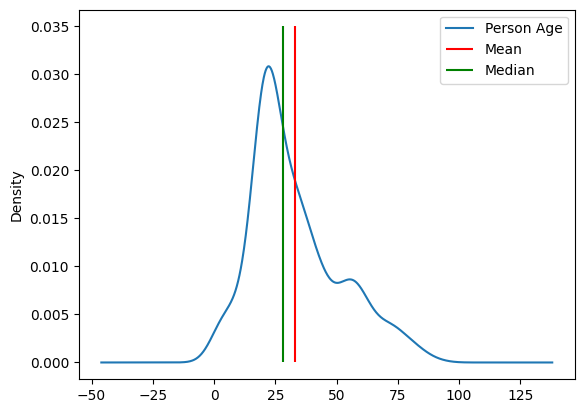

In [179]:
# plot the in a kde the distribution of this column's value to decide whether to use the mean or median

import matplotlib.pyplot as plt

df2['Person Age'].plot(kind = 'kde')
plt.vlines(df2['Person Age'].mean(), ymin= 0, ymax= 0.035, color = 'r', label = 'Mean')
plt.vlines(df2['Person Age'].median(), ymin= 0, ymax= 0.035, color = 'g', label = 'Median')
plt.legend()

In [180]:
# Fill the missing values in the Person Age column with the median

df2.fillna({'Person Age': df['Person Age'].median()}, inplace = True)

In [181]:
# Person Age value counts:

df2['Person Age'].value_counts()

Person Age
29.0    96
21.0    49
19.0    46
20.0    37
22.0    34
        ..
86.0     1
83.0     1
48.0     1
81.0     1
72.0     1
Name: count, Length: 87, dtype: int64

## Person Alcohol Result Column Data Imputation

In [182]:
df2['Person Alcohol Result'].value_counts()

Person Alcohol Result
No Data         930
1 - POSITIVE      2
2 - NEGATIVE      1
Name: count, dtype: int64

In [183]:
# Replace 'No Data' values with np.nan

df2['Person Alcohol Result'] = df2['Person Alcohol Result'].replace('No Data', np.nan)

# Calculate the amoun NaN value in this column
df2['Person Alcohol Result'].isna().sum()

945

In [184]:
# Calculate the percentage of missing values in this column

(df2['Person Alcohol Result'].isna().sum() / df2['Person Alcohol Result'].size)*100

99.68354430379746

Since there is a 99.68% of missing values in the column Person Alcohol Result, our team has decided to drop this column.

In [185]:
# Drop the Person Alcohol Result column

df2.drop('Person Alcohol Result', axis = 1, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          948 non-null    int64         
 1   Crash ID                            930 non-null    float64       
 2   Crash Date                          919 non-null    datetime64[ns]
 3   Crash Severity                      948 non-null    object        
 4   Day of Week                         948 non-null    object        
 5   Weather Condition                   948 non-null    object        
 6   Autonomous Level Engaged            929 non-null    object        
 7   Autonomous Unit - Reported          926 non-null    object        
 8   Vehicle Damage Rating 1 - Severity  948 non-null    object        
 9   Vehicle Model Year                  948 non-null    float64       
 10  Person Age                

### Person Drug Test Result Column Data Imputation

In [186]:
df2['Person Drug Test Result'].value_counts()

Person Drug Test Result
97 - NOT APPLICABLE    644
No Data                278
99 - UNKNOWN             8
2 - NEGATIVE             1
Name: count, dtype: int64

In [187]:
# Replace No Data with np.nan values

df2['Person Drug Test Result'] = df2['Person Drug Test Result'].replace('No Data', np.nan)

# Calculate the percentage of missing values in this column

df2['Person Drug Test Result'].isna().sum()

295

In [188]:
# Calculate the percentage of missing values for the Person Drug Test Result column

(df2['Person Drug Test Result'].isna().sum() / df2['Person Drug Test Result'].size)*100

31.118143459915608

In [189]:
# Person Drug Test Result value counts

df2['Person Drug Test Result'].value_counts()

Person Drug Test Result
97 - NOT APPLICABLE    644
99 - UNKNOWN             8
2 - NEGATIVE             1
Name: count, dtype: int64

Our team has made the following observations:

There is Nominal data (Categorical data with names or labels that do not have any inherent order) in this column.
There is a 31.11% NaN value indicating a moderate level of incompleteness
While we could replace the missing values with the '99 - UNKNOWN' category, we believe this information won't help our analysis since most of this data is not Applicable or Unknown.
We decided to drop the column.

In [190]:
# Drop the column 'Person Drug Test Result'

df2.drop('Person Drug Test Result', axis = 1, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          948 non-null    int64         
 1   Crash ID                            930 non-null    float64       
 2   Crash Date                          919 non-null    datetime64[ns]
 3   Crash Severity                      948 non-null    object        
 4   Day of Week                         948 non-null    object        
 5   Weather Condition                   948 non-null    object        
 6   Autonomous Level Engaged            929 non-null    object        
 7   Autonomous Unit - Reported          926 non-null    object        
 8   Vehicle Damage Rating 1 - Severity  948 non-null    object        
 9   Vehicle Model Year                  948 non-null    float64       
 10  Person Age                

### Person Ethnicity

In [191]:
# Check the Person Ethnicity value counts

df2['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          468
H - HISPANIC                       190
B - BLACK                          134
99 - UNKNOWN                        64
A - ASIAN                           58
No Data                             15
98 - OTHER                           9
Unknown                              6
I - AMER. INDIAN/ALASKAN NATIVE      4
Name: count, dtype: int64

In [192]:
# Replace 'No Data' with np.nan

df2['Person Ethnicity'] = df2['Person Ethnicity'].replace('No Data', np.nan)

# Replace 'Unknown' with category '99 - UNKNOWN'

df2['Person Ethnicity'] = df2['Person Ethnicity'].replace('Unknown', '99 - UNKNOWN')

# Check value counts

df2['Person Ethnicity'].value_counts()

Person Ethnicity
W - WHITE                          468
H - HISPANIC                       190
B - BLACK                          134
99 - UNKNOWN                        70
A - ASIAN                           58
98 - OTHER                           9
I - AMER. INDIAN/ALASKAN NATIVE      4
Name: count, dtype: int64

In [193]:
# Calculate the amount of missing values in the Person Ethnicity column

df2['Person Ethnicity'].isna().sum()

15

In [194]:
# since we have only 91 missing values, our team has decided to fill these values with '98 - OTHER' category 

df2['Person Ethnicity'] = df2['Person Ethnicity'].fillna('98 - OTHER')

# Check for missing values

df2['Person Ethnicity'].isna().sum()

0

### Person Gender

In [195]:
#Check the value counts

df2['Person Gender'].value_counts()


Person Gender
1 - MALE        479
2 - FEMALE      397
99 - UNKNOWN     50
Name: count, dtype: int64

In [196]:
df2['Person Gender'].isna().sum()

22

In [197]:
# For this column, our team has decided to replace the category '99 - Unknown' and missing values with the category with highest frequency 
# In this case, with ' 1 - MALE '

df2['Person Gender'] = df2['Person Gender'].replace('99 - UNKNOWN', pd.NA)
gender_mode = df2['Person Gender'].mode()[0]
df2.fillna({'Person Gender': gender_mode}, inplace = True)


In [198]:
df2['Person Gender'].value_counts()

Person Gender
1 - MALE      551
2 - FEMALE    397
Name: count, dtype: int64

### Transform data to all numerical values

In [199]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          948 non-null    int64         
 1   Crash ID                            930 non-null    float64       
 2   Crash Date                          919 non-null    datetime64[ns]
 3   Crash Severity                      948 non-null    object        
 4   Day of Week                         948 non-null    object        
 5   Weather Condition                   948 non-null    object        
 6   Autonomous Level Engaged            929 non-null    object        
 7   Autonomous Unit - Reported          926 non-null    object        
 8   Vehicle Damage Rating 1 - Severity  948 non-null    object        
 9   Vehicle Model Year                  948 non-null    float64       
 10  Person Age                

After creating the target column, our team has decided to drop the columns that were used to calculate our target.
**but in test data we dont have the columns for target column**

Also, we have decided to drop the Crash ID column, as we do not think it will be necessary for our incoming analysis. We have used this column in some of the data imputation methods since some rows had the same Crash ID and were missing data such as weather conditions or date, and the Crash ID was useful to complete our dataset.

Finally, we decided to drop the Crash Date column as well. After using it to help us input data to other columns, we no longer need this column in our further analysis and model training.

In [200]:
# Drop Crash Time and Time Roadway Cleared columns
df2.drop([ 'Crash ID', 'Crash Date'], axis=1, inplace = True)

#Drop Unnamed column 



In [201]:

#Drop Unnamed column 
df2.drop(['Unnamed: 0'], axis=1, inplace = True)

We are left with 10 columns, and now we proceed to transform them to numerical values.

**Transform data to all numerical values**

In [202]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      948 non-null    object 
 1   Day of Week                         948 non-null    object 
 2   Weather Condition                   948 non-null    object 
 3   Autonomous Level Engaged            929 non-null    object 
 4   Autonomous Unit - Reported          926 non-null    object 
 5   Vehicle Damage Rating 1 - Severity  948 non-null    object 
 6   Vehicle Model Year                  948 non-null    float64
 7   Person Age                          948 non-null    float64
 8   Person Ethnicity                    948 non-null    object 
 9   Person Gender                       948 non-null    object 
dtypes: float64(2), object(8)
memory usage: 74.2+ KB


### Crash Severity
For this column, and as previously mentioned, we have ordinal data. This type of categorical data represents labels with specific order or ranking.

Due to this condition, our team has decided to map the values in the following way:

- '99 - UNKNOWN': 0
- 'N - NOT INJURED':1
- 'C - POSSIBLE INJURY':2
- 'B - SUSPECTED MINOR INJURY':3
- 'A - SUSPECTED SERIOUS INJURY':4
- 'K - FATAL INJURY':5

In [203]:
df2['Crash Severity'].unique()

array(['N - NOT INJURED', 'B - SUSPECTED MINOR INJURY',
       'C - POSSIBLE INJURY', '99 - UNKNOWN',
       'A - SUSPECTED SERIOUS INJURY', 'K - FATAL INJURY'], dtype=object)

In [204]:
# map the Crash Severity column values from 0 to 5

df2['Crash Severity'] = df2['Crash Severity'].map({'99 - UNKNOWN': 0, 'N - NOT INJURED': 1, 'C - POSSIBLE INJURY': 2, 'B - SUSPECTED MINOR INJURY': 3, 'A - SUSPECTED SERIOUS INJURY': 4, 'K - FATAL INJURY': 5})

In [205]:
df2['Crash Severity'].value_counts()

Crash Severity
1    636
2    136
3    120
0     27
4     27
5      2
Name: count, dtype: int64

### Day of the Week
For this column, and as previously mentioned, we have ordinal data. This type of categorical data represents labels with specific order or ranking.

Since we want to preserve the order of days for a trend analysis, we want to keep these values in the same column.

Due to these conditions, our team has decided to map the values in the following way:

MONDAY: 1
TUESDAY: 2
WEDNESDAY: 3
THURSDAY: 4
FRIDAY: 5
SATURDAY: 6
SUNDAY: 7

In [206]:
df2['Day of Week'].unique()

array(['THURSDAY', 'FRIDAY', 'SATURDAY', 'WEDNESDAY', 'TUESDAY', 'SUNDAY',
       'MONDAY'], dtype=object)

In [207]:
df2['Day of Week'] = df2['Day of Week'].map({'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7})

In [208]:
df2['Day of Week'].value_counts()

Day of Week
4    159
5    157
1    155
3    137
2    135
6    114
7     91
Name: count, dtype: int64

### Weather Condition
For this column, as previously mentioned, we have nominal data. This type of categorical data represents labels with no inherent order or ranking among them.

Due to this condition, our team has decided to use one-hot vector for this column.

In [209]:
df2['Weather Condition'].unique()

array(['6 - FOG', '1 - CLEAR', '2 - CLOUDY', '3 - RAIN', '99 - UNKNOWN',
       '98 - OTHER (EXPLAIN IN NARRATIVE)'], dtype=object)

In [210]:
# First we have decided to map the values of this column the following way to keep order and coherence in our data columns' headers:

df2['Weather Condition'] = df2['Weather Condition'].map({'1 - CLEAR': 'Clear', '2 - CLOUDY': 'Cloudy', '3 - RAIN': 'Rain', '99 - UNKNOWN': 'Unknown',
       '4 - SLEET/HAIL':'Sleet/Hail', '5 - SNOW':'Snow', '98 - OTHER (EXPLAIN IN NARRATIVE)': 'Other', '6 - FOG': 'Fog'})

In [211]:
# Check the mapping:

df2['Weather Condition'].unique()

array(['Fog', 'Clear', 'Cloudy', 'Rain', 'Unknown', 'Other'], dtype=object)

In [212]:
# Use the get.dummies function to create the one-hot vector for this column

cols = pd.get_dummies(df2['Weather Condition'], prefix = 'Weather')
df2[cols.columns] = cols

In [213]:
# call .info on df

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      948 non-null    int64  
 1   Day of Week                         948 non-null    int64  
 2   Weather Condition                   948 non-null    object 
 3   Autonomous Level Engaged            929 non-null    object 
 4   Autonomous Unit - Reported          926 non-null    object 
 5   Vehicle Damage Rating 1 - Severity  948 non-null    object 
 6   Vehicle Model Year                  948 non-null    float64
 7   Person Age                          948 non-null    float64
 8   Person Ethnicity                    948 non-null    object 
 9   Person Gender                       948 non-null    object 
 10  Weather_Clear                       948 non-null    bool   
 11  Weather_Cloudy                      948 non-n

In [214]:
# since there were no instances for the categories Sleet/Hail and snow we are adding them manually 

df2.insert(16, 'Weather_Sleet/Hail', 0)  # insert after Weather_Rain
df2.insert(17, 'Weather_Snow', 0)  # insert after Weather_Snail

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      948 non-null    int64  
 1   Day of Week                         948 non-null    int64  
 2   Weather Condition                   948 non-null    object 
 3   Autonomous Level Engaged            929 non-null    object 
 4   Autonomous Unit - Reported          926 non-null    object 
 5   Vehicle Damage Rating 1 - Severity  948 non-null    object 
 6   Vehicle Model Year                  948 non-null    float64
 7   Person Age                          948 non-null    float64
 8   Person Ethnicity                    948 non-null    object 
 9   Person Gender                       948 non-null    object 
 10  Weather_Clear                       948 non-null    bool   
 11  Weather_Cloudy                      948 non-n

In [215]:
# Drop the Weather Condition column since it is no longer needed

df2.drop('Weather Condition', axis = 1, inplace = True)

### Autonomous Level Engaged

For this column, our team previously decided to drop it.

In [216]:
df2.drop('Autonomous Level Engaged', axis = 1, inplace = True)

### Autonomous Unit - Reported

For this column, our team previously decided to drop it.

In [217]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      948 non-null    int64  
 1   Day of Week                         948 non-null    int64  
 2   Autonomous Unit - Reported          926 non-null    object 
 3   Vehicle Damage Rating 1 - Severity  948 non-null    object 
 4   Vehicle Model Year                  948 non-null    float64
 5   Person Age                          948 non-null    float64
 6   Person Ethnicity                    948 non-null    object 
 7   Person Gender                       948 non-null    object 
 8   Weather_Clear                       948 non-null    bool   
 9   Weather_Cloudy                      948 non-null    bool   
 10  Weather_Fog                         948 non-null    bool   
 11  Weather_Other                       948 non-n

In [218]:
df2.drop('Autonomous Unit - Reported', axis = 1, inplace = True)

### Vehicle Damage Rating 1 - Severity
For this column, and as previously mentioned, we have ordinal data. This type of categorical data represents labels with specific order or ranking.

Due to these conditions, our team has decided to map the values in the following way:

- '0 - NO DAMAGE': 0
- '1 - DAMAGED 1 MINIMUM': 1
- '2 - DAMAGED 2': 2
- '3 - DAMAGED 3': 3
- '4 - DAMAGED 4': 4
- '5 - DAMAGED 5': 5
- '6 - DAMAGED 6': 6
- '7 - DAMAGED 7 HIGHEST': 7


In [219]:
df2['Vehicle Damage Rating 1 - Severity'].unique()

array(['2 - DAMAGED 2', '3 - DAMAGED 3', '4 - DAMAGED 4',
       '1 - DAMAGED 1 MINIMUM', '6 - DAMAGED 6', '5 - DAMAGED 5',
       '0 - NO DAMAGE', '7 - DAMAGED 7 HIGHEST'], dtype=object)

In [220]:
df2['Vehicle Damage Rating 1 - Severity'] = df2['Vehicle Damage Rating 1 - Severity'].map({'0 - NO DAMAGE': 0, '1 - DAMAGED 1 MINIMUM': 1, '2 - DAMAGED 2': 2, '3 - DAMAGED 3': 3, '4 - DAMAGED 4': 4, '5 - DAMAGED 5': 5, '6 - DAMAGED 6': 6, '7 - DAMAGED 7 HIGHEST': 7 })

In [221]:
# Check the mapping
df2['Vehicle Damage Rating 1 - Severity'].value_counts()

Vehicle Damage Rating 1 - Severity
2    385
3    245
1    206
4     62
5     23
0     20
6      5
7      2
Name: count, dtype: int64

### Vehicle Model Year
This column has already numerical values. Thus we proceed to work on the next column.

### Person Age
This column has already numerical values. Thus we proceed to work on the next column.





### Person Ethnicity
For this column, as previously mentioned, we have nominal data. This type of categorical data represents labels with no inherent order or ranking among them.

Due to this condition, our team has decided to use a one-hot vector for this column.

In [222]:
df2['Person Ethnicity'].unique()

array(['W - WHITE', 'B - BLACK', 'H - HISPANIC', '99 - UNKNOWN',
       'A - ASIAN', '98 - OTHER', 'I - AMER. INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [223]:
# First we have decided to map the values of this column in the following way to keep order and coherence in our data columns' headers:

df2['Person Ethnicity'] = df2['Person Ethnicity'].map({'H - HISPANIC': 'Hispanic', 'W - WHITE': 'White', 'B - BLACK': 'Black', '99 - UNKNOWN': 'Unknown', '98 - OTHER': 'Other', 'A - ASIAN': 'Asian', 'I - AMER. INDIAN/ALASKAN NATIVE': 'Native American'}) 

In [224]:
df2['Person Ethnicity'].value_counts()

Person Ethnicity
White              468
Hispanic           190
Black              134
Unknown             70
Asian               58
Other               24
Native American      4
Name: count, dtype: int64

In [225]:
# Use the get.dummies function to create the one-hot vector for this column

cols = pd.get_dummies(df2['Person Ethnicity'], prefix = 'Ethnicity')
df2[cols.columns] = cols

In [226]:
# Drop the Person Drug Test Result column since it is no longer needed

df2.drop('Person Ethnicity', axis = 1, inplace = True)

### Person Gender
For this column, we binomial data.

Due to this condition, our team has decided to map the values to 0 and 1 where the most frequent class will be mapped to 1 while the other class to 0.

In [227]:
df2['Person Gender'].unique()

array(['1 - MALE', '2 - FEMALE'], dtype=object)

In [228]:
# Check the frequencies

df2['Person Gender'].value_counts()

Person Gender
1 - MALE      551
2 - FEMALE    397
Name: count, dtype: int64

In [229]:
# As we can see from the results in the previous cell, '1 - MALE' has the highest frequency, and thus, it will be mapped to 1.

df2['Person Gender'] = df2['Person Gender'].map({'1 - MALE': 1, '2 - FEMALE': 0 })

In [230]:
# Check the mapping

df2['Person Gender'].value_counts()

Person Gender
1    551
0    397
Name: count, dtype: int64

In [231]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      948 non-null    int64  
 1   Day of Week                         948 non-null    int64  
 2   Vehicle Damage Rating 1 - Severity  948 non-null    int64  
 3   Vehicle Model Year                  948 non-null    float64
 4   Person Age                          948 non-null    float64
 5   Person Gender                       948 non-null    int64  
 6   Weather_Clear                       948 non-null    bool   
 7   Weather_Cloudy                      948 non-null    bool   
 8   Weather_Fog                         948 non-null    bool   
 9   Weather_Other                       948 non-null    bool   
 10  Weather_Rain                        948 non-null    bool   
 11  Weather_Unknown                     948 non-n

# Clustering

**Instructions**

- Scale each dataset. Explain your choice of data scaling method.- 
Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model.

### Scaling and Agglomerative Clustering

Our team has decided to use the MinMaxScaling method due to the features of our data set. We have value with ordinal data (ranking or inherent order) and boolean data. Due to this and the lack of normal distribution, we have decided to use the MinMaxScaler rather than the StandardScaler.

In [232]:
# import the model 

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      5376 non-null   int64  
 1   Day of Week                         5376 non-null   int64  
 2   Vehicle Damage Rating 1 - Severity  5376 non-null   int64  
 3   Vehicle Model Year                  5376 non-null   float64
 4   Person Age                          5376 non-null   float64
 5   Person Gender                       5376 non-null   int64  
 6   Target                              5376 non-null   int32  
 7   Weather_Clear                       5376 non-null   bool   
 8   Weather_Cloudy                      5376 non-null   bool   
 9   Weather_Fog                         5376 non-null   bool   
 10  Weather_Other                       5376 non-null   bool   
 11  Weather_Rain                        5376 no

In [234]:
# Define your X and y

X = df.drop('Target', axis = 1)
y = df['Target']

In [235]:
# Check your X variable using .info() 

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      5376 non-null   int64  
 1   Day of Week                         5376 non-null   int64  
 2   Vehicle Damage Rating 1 - Severity  5376 non-null   int64  
 3   Vehicle Model Year                  5376 non-null   float64
 4   Person Age                          5376 non-null   float64
 5   Person Gender                       5376 non-null   int64  
 6   Weather_Clear                       5376 non-null   bool   
 7   Weather_Cloudy                      5376 non-null   bool   
 8   Weather_Fog                         5376 non-null   bool   
 9   Weather_Other                       5376 non-null   bool   
 10  Weather_Rain                        5376 non-null   bool   
 11  Weather_Sleet/Hail                  5376 no

In [236]:
# Check your y variable using .info() 
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5376 entries, 0 to 5375
Series name: Target
Non-Null Count  Dtype
--------------  -----
5376 non-null   int32
dtypes: int32(1)
memory usage: 21.1 KB


In [237]:
# Scale the dataset

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X) 

# Make a dataframe out of the scaled numpy array 

X_scaled = pd.DataFrame(X_scaled, columns = X.columns, index = X.index)

In [238]:
X_scaled

,Crash Severity,Day of Week,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Gender,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,...,Weather_Sleet/Hail,Weather_Snow,Weather_Unknown,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_Other,Ethnicity_Unknown,Ethnicity_White
0,0.2,0.000000,0.428571,0.907407,0.204301,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.2,0.000000,0.571429,0.666667,0.397849,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.4,0.000000,0.142857,0.703704,0.311828,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.4,0.000000,0.428571,0.888889,0.247312,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.4,0.000000,0.428571,0.888889,0.258065,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,0.2,0.666667,0.285714,0.907407,0.677419,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5372,0.2,0.666667,0.285714,0.574074,0.182796,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5373,0.2,0.666667,0.285714,0.574074,0.204301,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5374,0.2,0.666667,0.428571,0.629630,0.258065,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Agglomerative Clustering

In [239]:
# Build the clustering model

# To get the distance threshold our team tried integers between 1 and 40 to see which would give us a total of 5 clusters 
# Our team found that a distance threshold of 32 will give us the number desired of clusters.

# We decided to use the ward linkage after trying different linkages due to its usefulness in producing more balanced and compact clusters. 

model = AgglomerativeClustering( distance_threshold = 32, n_clusters = None, linkage = 'ward')

# Train the clustering model in the feature set

model.fit(X_scaled)

AgglomerativeClustering(distance_threshold=32, n_clusters=None)

In [240]:
model.n_clusters_

5

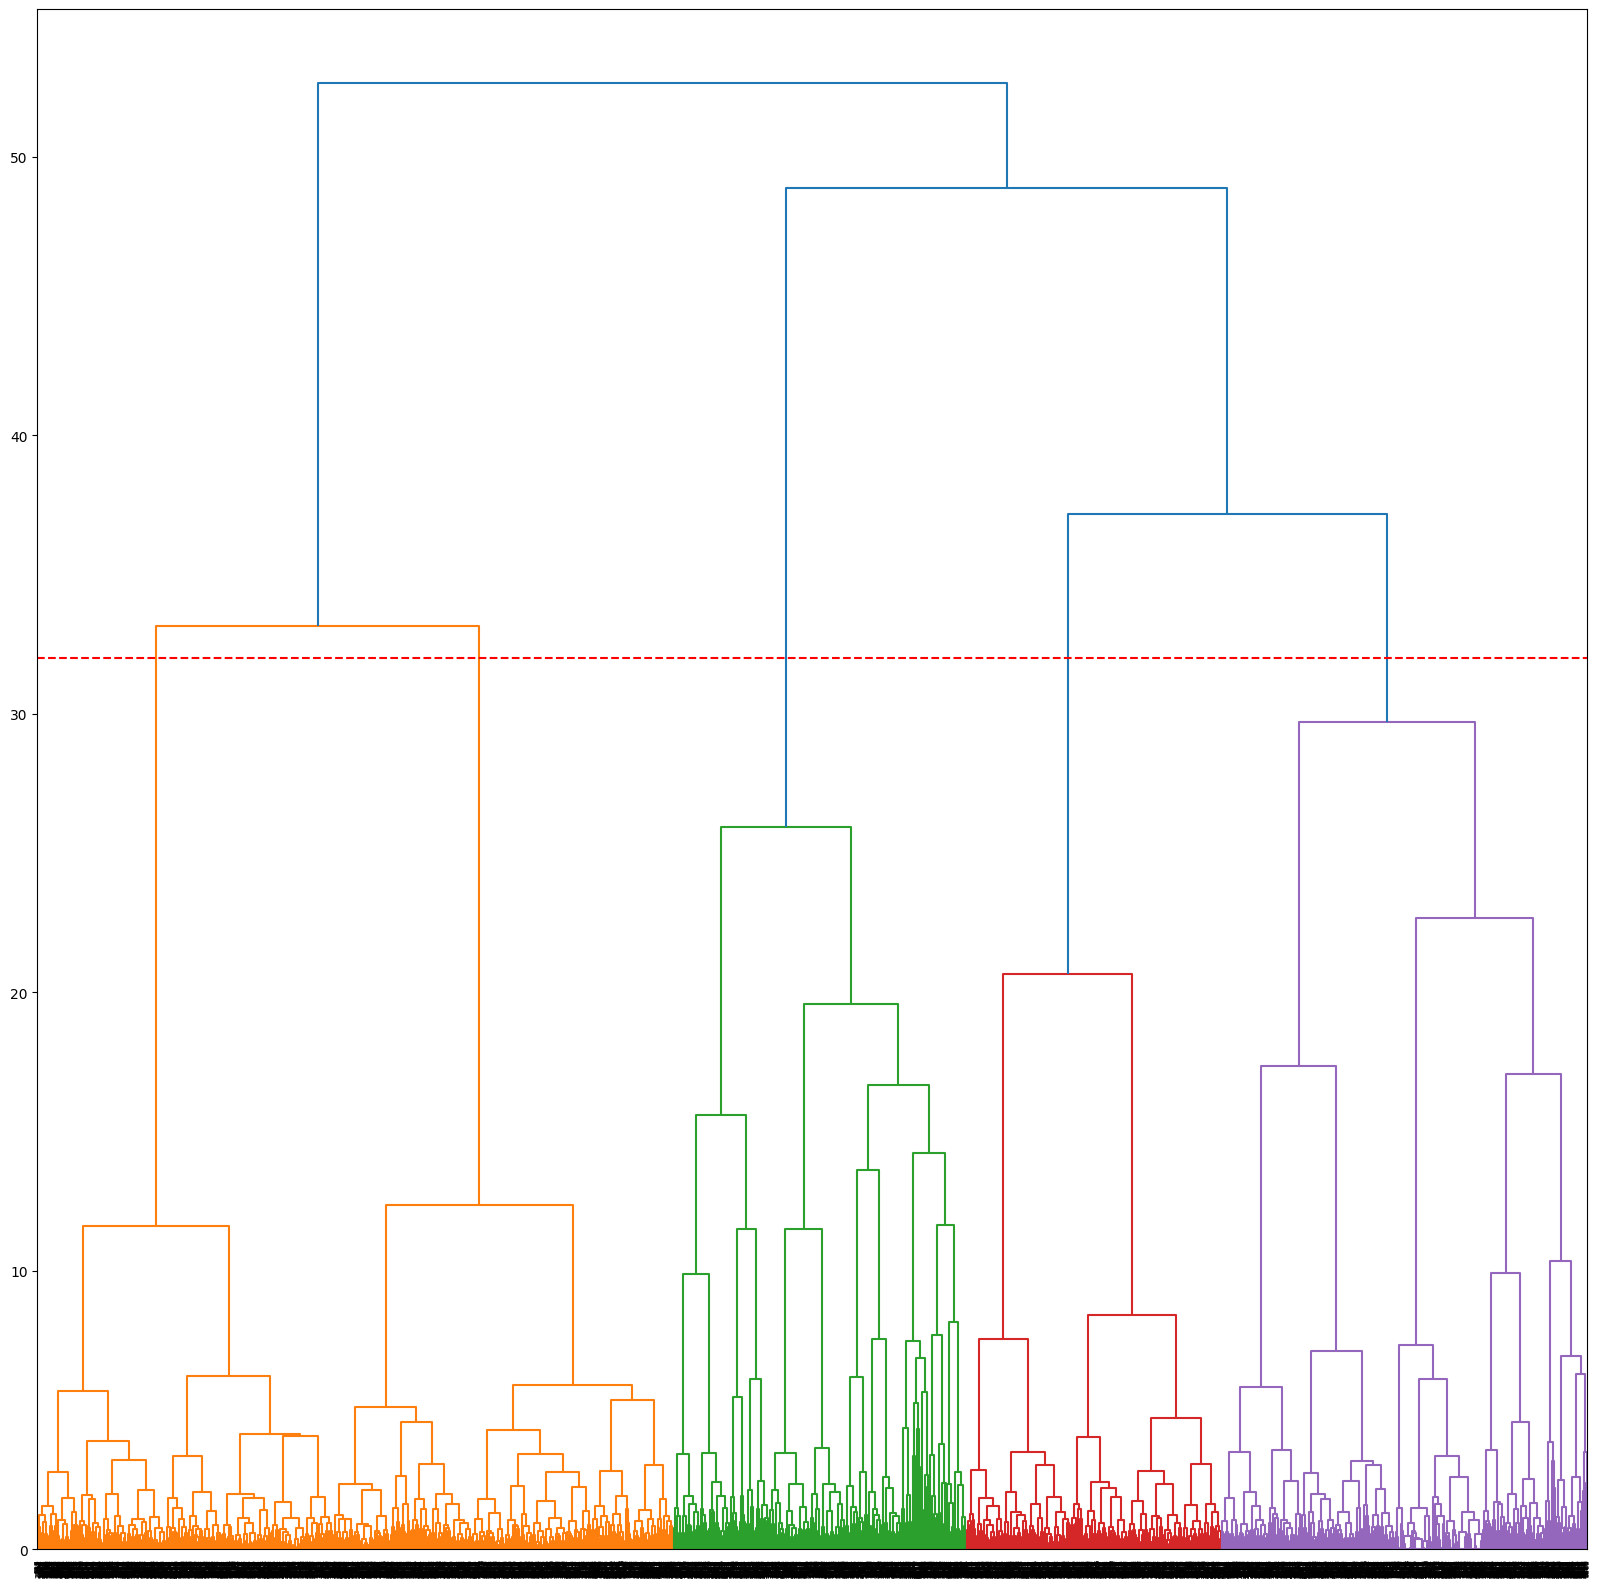

In [241]:
# Dendrograpm
from scipy.cluster.hierarchy import dendrogram, linkage

plt.subplots(figsize = (20,20))
dendrogram(linkage(X_scaled, method = 'ward'))
plt.axhline(y = 32, c = 'r', linestyle = '--')

plt.show() 

After training an Agglomerative Clustering model with all default parameters and distance_threshold computed above, it is time to label each point with the cluster label to which they belong.

In [242]:
# Cluster labels for each point

labels = model.labels_

labels

array([1, 4, 3, ..., 3, 1, 1], dtype=int64)

In [243]:
# To get a value count in an array, our team is going to import collection from numpy

import collections, numpy

# Now, we are going to make a new varibale 'counter', in which we are going to use collection.Counter() on model.labels_ to get the size of each cluster 

counter = collections.Counter(labels)

counter

Counter({0: 1269, 3: 1178, 4: 1029, 2: 1017, 1: 883})

As our team can observe, the size of the clusters are the following:

- Cluster 0: 1,269
- Cluster 1: 883
- Cluster 2: 1,017
- Cluster 3: 1,178


Employing the inverse_transform function on each cluster is essential in the forthcoming questions.

This procedure will facilitate the retrieval of the original values associated with every feature within the given cluster. 

This process's primary aim is to explore each cluster's contents thoroughly. To ensure the integrity of your analysis, remember to save the outcome of the inverse_transform function in a new variable. 

This precautionary step will help prevent any potential alterations to the original and scale data frames

In [244]:
# USe .inverse_trasnform on the X_scaled df to retrieve the original values of our df

inverse_transformed_data = scaler.inverse_transform(X_scaled)

inverse_transformed_df = pd.DataFrame(inverse_transformed_data, columns = X_scaled.columns)

# Add a new colum to the inverse_transformed_df to assigned the correspondet cluster labels

inverse_transformed_df['cluster_label'] = labels

inverse_transformed_df.head()

,Crash Severity,Day of Week,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Gender,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,...,Weather_Snow,Weather_Unknown,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_Other,Ethnicity_Unknown,Ethnicity_White,cluster_label
0,1.0,1.0,3.0,2019.0,19.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1.0,1.0,4.0,2006.0,37.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
2,2.0,1.0,1.0,2008.0,29.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,2.0,1.0,3.0,2018.0,23.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,2.0,1.0,3.0,2018.0,24.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3


## Understanding patterns and analysing the clusters 

In [245]:
# Group the data by clusters

cluster0_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 0]
cluster1_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 1]
cluster2_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 2]
cluster3_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 3]

### Crash Severity Column
We mapped this column: 

- '99 - UNKNOWN': 0
- 'N - NOT INJURED':1
- 'C - POSSIBLE INJURY':2
- 'B - SUSPECTED MINOR INJURY':3
- 'A - SUSPECTED SERIOUS INJURY':4
- 'K - FATAL INJURY':5

**Answer the following questions:**
- Which cluster has the highest frequency for each of the categories in this column?
- Which cluster has the lowest frequency for each of the categories in this column?


In [246]:
pd.crosstab(inverse_transformed_df['cluster_label'], df['Crash Severity'])

Crash Severity,0,1,2,3,4,5
cluster_label,,,,,,
0,90,800,181,168,24,6
1,2,588,139,134,18,2
2,47,680,111,147,26,6
3,14,813,141,183,21,6
4,12,678,161,165,12,1


Obsevations:

**Cluster 0**
- The majority of instances in Cluster 0 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances in Cluster 0 have a Crash Severity of Fatal Injury (mapped to 5).

**Cluster 1**
- The majority of instances in Cluster 1 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances in Cluster 1 have a tie of 2 instances for Unknown and 2 for Fatal Injury.

**Cluster 2**
- The majority of instances in CLuster 2 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances in Cluster 2 have a Crah Severity of Fatal Injury (mapped to 5)

**Cluster 3**
- The majority of instances in Cluster 3 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances in Clsuter 3 have a Crash Severity of Fatal Injury (mapped to 5).

**Cluster 4**
- The majority of instances in Cluster 4 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances in Cluster 4 have a Crash Severity of Fatal Injury (mapped to 5).

**Unknown (0)**
- Cluster 0 has the majority of instances for this category.
- Cluster 2 has the majority of instances for this category.

**Not Injured (1)**
- Cluster 3 has the majority of instances for this category.
- Cluster 1 has the minority of instances for this category.

**Possible Injury (2)**
- Cluster 0 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Suspected Minor Injury (3)**
- Cluster 3 has the majority of instances for this category.
- Cluster 1 has the minority of instances for this category.

**Suspected Serious Injury (4)**
- Cluster 2 has the majority of instances for this category.
- Cluster 4 has the minority of instances for this category.

**Fatal Injury (4)**
- There is a tie between Clusters 0, 2, and 3 with 6 instances as the majority for this category.
- Cluster 4 has the minority of instances for this category.

### Day of the Week
We mapped this column:

- MONDAY: 1
- TUESDAY: 2
- WEDNESDAY: 3
- THURSDAY: 4
- FRIDAY: 5
- SATURDAY: 6
- SUNDAY: 7

**Answer the following questions:**
- On average, which cluster has the lowest ratio of car crashes during the weekend? (Friday, Saturday, Sunday)
- On average, which cluster has the highest ratio of car crashes during the weekend? (Friday, Saturday, Sunday)
- Which cluster has the highest frequency for each of the day of the week?
- Which cluster has the lowest frequency for each of the day of the week?
Refer to Question 7 Lab2

In [247]:
dfk = pd.crosstab(inverse_transformed_df['cluster_label'], df['Day of Week'])
df3 = pd.DataFrame(dfk)
print(df3)

Day of Week      1    2    3    4    5    6    7
cluster_label                                   
0              192  196  188  201  205  143  144
1              144  124  110  131  154  109  111
2               79  129  114  207  212  137  139
3              199  194  181  156  226  133   89
4              168  148  175  159  188  108   83


In [248]:
#question 1
#On average, which cluster has the lowest ratio of car crashes during the weekend? (Friday, Saturday, Sunday) 
# Select the last three columns
print("On average, which cluster has the lowest ratio of car crashes during the weekend? (Friday, Saturday, Sunday) ")
cols = df3.iloc[:, -3:]
# Calculate the row-wise mean
row_averages = cols.mean(axis=1)
print(row_averages)
# Find the index of the minimum value
min_index = row_averages.idxmin()
# Print the minimum value and its corresponding cluster_label index
print(f"cluster_label\n{min_index}\n{row_averages[min_index]}\n") 
print("*********************************************************")


#question2:::
print("On average, which cluster has the highest ratio of car crashes during the weekend? (Friday, Saturday, Sunday)")
max_index = row_averages.idxmax()
print(f"cluster_label\n{max_index}\n{row_averages[max_index]}\n") 
print("*********************************************************")

#question 3
#Which cluster has the highest frequency for each of the day of the week?
# Find the cluster label with the highest frequency for each day of the week
print("Which cluster has the highest frequency for each of the day of the week?")
max_cluster_labels = df3.iloc[:, :].idxmax()
# Print the result
print("Day of Week\t cluster_label\t frequency\n")
for day, cluster_label in enumerate(max_cluster_labels):
    print(f"{df3.columns[day]}\t{cluster_label}\t{df3.iloc[cluster_label, day]}")
print("*********************************************************")
    
#question4
#Which cluster has the lowest frequency for each of the day of the week?
print("Which cluster has the lowest frequency for each of the day of the week?")
min_cluster_labels = df3.iloc[:, :].idxmin()
# Print the result
print("Day of Week\t cluster_label\t frequency\n")
for day, cluster_label in enumerate(min_cluster_labels):
    print(f"{df3.columns[day]}\t{cluster_label}\t{df3.iloc[cluster_label, day]}")
print("*********************************************************")




On average, which cluster has the lowest ratio of car crashes during the weekend? (Friday, Saturday, Sunday) 
cluster_label
0    164.000000
1    124.666667
2    162.666667
3    149.333333
4    126.333333
dtype: float64
cluster_label
1
124.66666666666667

*********************************************************
On average, which cluster has the highest ratio of car crashes during the weekend? (Friday, Saturday, Sunday)
cluster_label
0
164.0

*********************************************************
Which cluster has the highest frequency for each of the day of the week?
Day of Week	 cluster_label	 frequency

1	3	199
2	0	196
3	0	188
4	2	207
5	3	226
6	0	143
7	0	144
*********************************************************
Which cluster has the lowest frequency for each of the day of the week?
Day of Week	 cluster_label	 frequency

1	2	79
2	1	124
3	1	110
4	1	131
5	1	154
6	4	108
7	4	83
*********************************************************


Observation: after doing cross tab we can easily identify lowest frequency , highest frequency, mean and median for last 3 columns But, if it last data it is difficult to calculate so after cross tab convereted into dataframe and from there we can perform coding as per our queries

### Vehicle Damage Rating 1 - Severity

We mapped this column:

- '0 - NO DAMAGE': 0
- '1 - DAMAGED 1 MINIMUM': 1
- '2 - DAMAGED 2': 2
- '3 - DAMAGED 3': 3
- '4 - DAMAGED 4': 4
- '5 - DAMAGED 5': 5
- '6 - DAMAGED 6': 6
- '7 - DAMAGED 7 HIGHEST': 7

**Answer the following questions:**
- On average, which cluster has the highest ratio for each of the categories of the Vehicle Damage Rating 1 - Severity?
- On average, which cluster has the lowest ratio for each of the categories of the Vehicle Damage Rating 1 - Severity?

In [249]:
dfv = pd.crosstab(inverse_transformed_df['cluster_label'], df['Vehicle Damage Rating 1 - Severity'])
df3 = pd.DataFrame(dfv)
print(df3)

Vehicle Damage Rating 1 - Severity   0    1    2    3   4   5   6  7
cluster_label                                                       
0                                   19  301  589  218  97  30  11  4
1                                   15  237  300  229  77  12  10  3
2                                   19  231  401  263  72  28   0  3
3                                   38  312  439  252  94  28  12  3
4                                   13  258  392  257  83  16   6  4


**Observations**

**No Damage (0)**
- The highest number of instances belong to Cluster 3 with 38 cases.
- The lowest number of instances belong to Cluster 4 with 3 cases.

**Damage 1 (1)**
- The highest number of instances belong to Cluster 3 with 312 cases.
- The lowest number of instances belong to Cluster 2 with 231 cases.

**Damage 2 (2)**
- The highest number of instances belong to Cluster 0 with 589 cases.
- The lowest number of instances belong to Cluster 1 with 300 cases.

**Damage 3 (3)**
- The highest number of instances belong to Cluster 2 with 263 cases.
- The lowest number of instances belong to Cluster 1 with 229 cases.

**Damage 4 (4)**
- The highest number of instances belong to Cluster 0 with 97 cases.
- The lowest number of instances belong to Cluster 1 with 77 cases.

**Damage 5 (5)**
- The highest number of instances belong to Cluster 0 with 30 cases.
- The lowest number of instances belong to Cluster 1 with 12 cases.

**Damage 6 (6)**
- The highest number of instances belong to Cluster 3 with 12 cases.
- The lowest number of instances belong to Cluster 4 with 6 cases.
- And Cluster 2 does not has any instance in this category

**Damage 7 (7)**
- The highest number of instances belong to Cluster 0 and 4 which both have a tied of 4 cases each which is the highest in this category.
- Cluster 1, 2, and 3 have a tied for the lowest frequency in this category with 3 cases.

In [250]:
max_cluster_labels = df3.iloc[:, :].idxmax()
# Print the result
print("Vehicle Damage Rating 1 - Severity\t cluster_label\t frequency\n")
for severity, cluster_label in enumerate(max_cluster_labels):
    print(f"{df3.columns[severity]}\t{cluster_label}\t{df3.iloc[cluster_label, severity]}")
print("*********************************************************")
min_cluster_labels = df3.iloc[:, :].idxmin()
# Print the result
print("Vehicle Damage Rating 1 - Severity\t cluster_label\t frequency\n")
for severity, cluster_label in enumerate(min_cluster_labels):
    print(f"{df3.columns[severity]}\t{cluster_label}\t{df3.iloc[cluster_label, severity]}")
print("*********************************************************") 
   								

Vehicle Damage Rating 1 - Severity	 cluster_label	 frequency

0	3	38
1	3	312
2	0	589
3	2	263
4	0	97
5	0	30
6	3	12
7	0	4
*********************************************************
Vehicle Damage Rating 1 - Severity	 cluster_label	 frequency

0	4	13
1	2	231
2	1	300
3	0	218
4	2	72
5	1	12
6	2	0
7	1	3
*********************************************************


### Vehicle Model Year

**Answer the following questions:**
- Which cluster has the oldest cars? (might want to do group brackets first to assign instances to groups)
- Which cluster has the newest cars?


In [251]:
dfvm = pd.crosstab(inverse_transformed_df['cluster_label'], df['Vehicle Model Year'])
df3 = pd.DataFrame(dfvm)
print(df3)

Vehicle Model Year  1970.0  1978.0  1980.0  1984.0  1989.0  1990.0  1991.0  \
cluster_label                                                                
0                        0       0       0       0       0       1       1   
1                        0       0       0       0       0       1       0   
2                        0       1       0       1       0       2       0   
3                        2       0       1       0       1       0       1   
4                        0       0       0       0       1       0       0   

Vehicle Model Year  1992.0  1993.0  1994.0  ...  2015.0  2016.0  2017.0  \
cluster_label                               ...                           
0                        0       0       0  ...      74     296      78   
1                        0       0       0  ...      46      60      48   
2                        0       0       0  ...      43     142      58   
3                        0       1       1  ...      55      85      64   
4  

In [252]:
max_cluster_labels = df3.iloc[:,  :].idxmax()
# Print the result
print("Vehicle Model Year\t cluster_label\t frequency\n")
for modelyear, cluster_label in enumerate(max_cluster_labels):
    print(f"{df3.columns[modelyear]}\t{cluster_label}\t{df3.iloc[cluster_label, modelyear]}")
print("********************************************")

Vehicle Model Year	 cluster_label	 frequency

1970.0	3	2
1978.0	2	1
1980.0	3	1
1984.0	2	1
1989.0	3	1
1990.0	2	2
1991.0	0	1
1992.0	4	1
1993.0	3	1
1994.0	3	1
1995.0	3	4
1996.0	3	8
1997.0	3	8
1998.0	2	5
1999.0	2	8
2000.0	3	13
2001.0	2	16
2002.0	1	13
2003.0	1	24
2004.0	3	31
2005.0	2	25
2006.0	3	35
2007.0	1	42
2008.0	1	43
2009.0	1	40
2010.0	1	43
2011.0	0	42
2012.0	2	50
2013.0	3	61
2014.0	0	60
2015.0	0	74
2016.0	0	296
2017.0	0	78
2018.0	0	110
2019.0	3	94
2020.0	3	89
2021.0	4	77
2022.0	3	76
2023.0	3	64
2024.0	3	11
********************************************


This output says the year of haing high frequency contains which cluster through this we can also say which cluster having high frequency from 1970 to 1999 when we sum up as 3rd cluster having high frequency of old cars.

In [253]:
max_cluster_labels = df3.iloc[ :, :].idxmin()
# Print the result
print("Vehicle Model Year\t cluster_label\t frequency\n")
for modelyear, cluster_label in enumerate(max_cluster_labels):
    print(f"{df3.columns[modelyear]}\t{cluster_label}\t{df3.iloc[cluster_label, modelyear]}")
print("********************************************")

Vehicle Model Year	 cluster_label	 frequency

1970.0	0	0
1978.0	0	0
1980.0	0	0
1984.0	0	0
1989.0	0	0
1990.0	3	0
1991.0	1	0
1992.0	0	0
1993.0	0	0
1994.0	0	0
1995.0	1	0
1996.0	0	0
1997.0	0	0
1998.0	0	1
1999.0	0	2
2000.0	4	2
2001.0	0	4
2002.0	4	6
2003.0	2	7
2004.0	2	13
2005.0	4	11
2006.0	2	17
2007.0	4	21
2008.0	4	14
2009.0	2	16
2010.0	0	22
2011.0	1	21
2012.0	4	35
2013.0	1	44
2014.0	2	44
2015.0	2	43
2016.0	1	60
2017.0	1	48
2018.0	1	59
2019.0	2	64
2020.0	1	37
2021.0	1	26
2022.0	1	23
2023.0	1	29
2024.0	0	4
********************************************


In [254]:
# Group the data by clusters

cluster0_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 0]
cluster1_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 1]
cluster2_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 2]
cluster3_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 3]
cluster4_data = inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 4]

In [255]:
# Oldest Vehicle Model Year in Cluster 0
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 0, 'Vehicle Model Year'].min().round()

1990.0

In [256]:
# Oldest Vehicle Model Year in Cluster 1
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 1, 'Vehicle Model Year'].min().round()

1990.0

In [257]:
# Oldest Vehicle Model Year in Cluster 2
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 2, 'Vehicle Model Year'].min().round()

1978.0

In [258]:
# Oldest Vehicle Model Year in Cluster 3
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 3, 'Vehicle Model Year'].min().round()

1970.0

In [259]:
# Oldest Vehicle Model Year in Cluster 4
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 4, 'Vehicle Model Year'].min().round()

1989.0

**Observation**

cluster 3 is having oldest cars

In [260]:
# Newest Vehicle Model Year in Cluster 0
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 0, 'Vehicle Model Year'].max().round()

2024.0

In [261]:
# Newest Vehicle Model Year in Cluster 1
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 1, 'Vehicle Model Year'].max().round()

2024.0

In [262]:
# Newest Vehicle Model Year in Cluster 2
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 2, 'Vehicle Model Year'].max().round()

2024.0

In [263]:
# Newest Vehicle Model Year in Cluster 3
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 3, 'Vehicle Model Year'].max().round()

2024.0

In [264]:
# Newest Vehicle Model Year in Cluster 4
inverse_transformed_df.loc[inverse_transformed_df['cluster_label'] == 4, 'Vehicle Model Year'].max().round()

2024.0

**observation**
every cluster is having newest car vehicle

In [265]:
#Is there any relationship between the vehicle model year and the person's gender?
pd.crosstab(df['Person Gender'], df['Vehicle Model Year'])

Vehicle Model Year,1970.0,1978.0,1980.0,1984.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
Person Gender,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,2,1,1,0,0,...,145,208,166,199,171,131,136,135,124,18
1,2,1,1,1,1,2,1,0,1,1,...,146,460,158,228,209,183,139,157,136,21


This crosstab function result says there is a relation between person gender and vehicle model year which we can say how many male and how many female effected or using which type of vehicle model car consider 0 as female and 1 as a male

In [266]:
col1, col2 = "Person Gender", "Vehicle Model Year"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")

Correlation between  Person Gender  and  Vehicle Model Year is:  -0.09
Person Gender and Vehicle Model Year are not correlated.


correlation concept If the absolute value of the correlation coefficient is less than 0.1, it is considered that there is no correlation between the two columns. the corr() method returns a value between -1 and 1. A value of 1 means that there is a strong positive correlation between the two columns, while a value of -1 means that there is a strong negative correlation. A value of 0 means that there is no correlation between the two columns.

In [267]:
pd.crosstab(df['Ethnicity_Asian'], df['Vehicle Model Year'])

Vehicle Model Year,1970.0,1978.0,1980.0,1984.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
Ethnicity_Asian,,,,,,,,,,,,,,,,,,,,,
False,2,1,1,1,2,3,2,1,1,1,...,271,640,302,412,362,302,259,271,238,37
True,0,0,0,0,0,1,0,0,0,0,...,20,28,22,15,18,12,16,21,22,2


In [268]:
#Is there any meaningful relationship between the vehicle model year and the ethnicity of the person driving the vehicle? (For these you might want to do a crosstab)
#two ways : cross tab and correlation
pd.crosstab(df['Ethnicity_Asian'], df['Vehicle Model Year']) 
col1, col2 = "Ethnicity_Asian", "Vehicle Model Year"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")
#***************************************************************************#
col1, col2 = "Ethnicity_Black", "Vehicle Model Year"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")
#***************************************************************************#
col1, col2 = "Ethnicity_Hispanic", "Vehicle Model Year"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")
#****************************************************************************#
col1, col2 = "Ethnicity_Native American", "Vehicle Model Year"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")
#****************************************************************************#
col1, col2 = "Ethnicity_Other", "Vehicle Model Year"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")
#************************************************************************#
col1, col2 = "Ethnicity_Unknown", "Vehicle Model Year"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")
#****************************************************************************#
col1, col2 = "Ethnicity_White", "Vehicle Model Year"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")

Correlation between  Ethnicity_Asian  and  Vehicle Model Year is:  0.03
Ethnicity_Asian and Vehicle Model Year are not correlated.
Correlation between  Ethnicity_Black  and  Vehicle Model Year is:  0.01
Ethnicity_Black and Vehicle Model Year are not correlated.
Correlation between  Ethnicity_Hispanic  and  Vehicle Model Year is:  -0.12
Ethnicity_Hispanic and Vehicle Model Year are correlated.
Correlation between  Ethnicity_Native American  and  Vehicle Model Year is:  -0.01
Ethnicity_Native American and Vehicle Model Year are not correlated.
Correlation between  Ethnicity_Other  and  Vehicle Model Year is:  0.02
Ethnicity_Other and Vehicle Model Year are not correlated.
Correlation between  Ethnicity_Unknown  and  Vehicle Model Year is:  0.06
Ethnicity_Unknown and Vehicle Model Year are not correlated.
Correlation between  Ethnicity_White  and  Vehicle Model Year is:  0.04
Ethnicity_White and Vehicle Model Year are not correlated.


### Person Age

**Answer the following questions:**
- On average, which cluster has younger members than that of the other clusters?
- On average, which cluster had older members than that of the other clusters?
(Do a group by cluster and age.mean)

In [269]:
average_age = inverse_transformed_df.groupby('cluster_label')['Person Age'].mean()
average_age.sort_values()


cluster_label
1    30.428086
0    30.431048
2    32.998033
4    36.909621
3    37.093379
Name: Person Age, dtype: float64

**Observation:**

On average, Cluster 1 and 0 have the youngest members among all clusters.

On average, Cluster 3 have the oldest members among all clusters.

### Person Gender
We mapped this column:
- '1 - MALE': 1
- '2 - FEMALE': 0

**Answer the following questions:**
- Which cluster has the majority of instances of women?
- Which cluster has the minority of instances of women?
- Which cluster has the majority of instances of males?
- Which cluster has the minority of instances of males?

In [270]:
#1- male and 0-female 
female = cluster0_data['Person Gender']
female_count = (female == 0 ).sum()
print(female_count) 
value_counts = female. value_counts()
value_counts 

443


Person Gender
1.0    826
0.0    443
Name: count, dtype: int64

In [271]:
avg_age = inverse_transformed_df.groupby('cluster_label')['Person Gender'].value_counts()
avg_age.sort_values()

cluster_label  Person Gender
1              0.0               360
2              0.0               430
0              0.0               443
1              1.0               523
2              1.0               587
0              1.0               826
4              0.0              1029
3              1.0              1178
Name: count, dtype: int64

I performed two ways of codes if we want to know the majority of males or females for single cluster is the 1st way of coding and 2nd way is to know the the majority or minority for both males and females for all clusters

**Observation**

**Cluster 0**

The majority of instances in Cluster 1 are males(826) (mapped to 1). 

Approximately, 65.09% of instances in this cluster are males.

The minority of instances in Cluster 1 are females(443) (mapped to 0). 

Approximately, 34.91% of instances in this cluster are females.


**Cluster 1**

The majority of instances in Cluster 1 are(523) males (mapped to 1).

Approx 59.22%, of instances in this cluster are males.

The minority of instances in Cluster 1 are(360) females (mapped to 0).

Approximately 40.77%, of instances in this cluster are females.

**Cluster 2**

The majority of instances in Cluster2 (587) are males (mapped to 1).

Approx, 57.71% of instances in this cluster are males.

The minority of instances in Cluster 2(430) are females (mapped to 0).

Approx, 42.28% of instances in this cluster are females

**cluster 3**

All instance in cluster 3 are males (mapped to 1) 

**Cluster 4**

All instances in Cluster in 4 are females (mapped to 0)


females (0)

Cluster 4 has the majority of instances in this category

Males (1)

Cluster 3 has the majority of instances in this category.

### Weather_Clear

**Answer the following questions:**

- Which cluster has the majority of instances with clear weather?
- Which cluster has a minority of instances with clear weather?
- Is there any cluster with no instance with a clear weather?

In [272]:
weather = inverse_transformed_df.groupby('cluster_label')['Weather_Clear'].value_counts()
weather.sort_values()

cluster_label  Weather_Clear
0              0.0                19
1              1.0               883
2              0.0              1017
4              1.0              1029
3              1.0              1178
0              1.0              1250
Name: count, dtype: int64

**observation**
by this observation we can say if it is 1-weather_clear or else weather not clear 
cluster 0 ,1 and 3 are not containg 0.0 values
and 2 is not having 1.0 which means weather_clear is not having in cluster 2

**Observations:**

**Cluster 0**

1250 of the instances in Cluster 0 have Clear weather.

19 of the instances in Cluster 0 not having Clear weather.

Approximately 98.50 of instances belong to Clear weather

**Cluster 1**

All of the instances in Cluster 1 have Clear weather.

**Cluster 2**

None of the instances in Cluster 2 not have Clear weather.

**Cluster 3**

ALl of the instances in Cluster 3 have Clear weather.

**Cluster 4**

All of the instances in Cluster 4 have Clear weather.

With 1250, **Cluster 0** has the highest frequency of cases with Clear weather.

with 883, **Cluster 1** has lowest frequency of cases with Clear weather.
of cases with Clear weather.

### Weather_Cloudy

**Answer the following questions:**
    
- Which cluster has the majority of instances with cloudy weather?
- Which cluster has a minority of instances with cloudy weather?
- Is there any cluster with no instance with cloudy weather?

In [273]:
weather = inverse_transformed_df.groupby('cluster_label')['Weather_Cloudy'].value_counts()
weather.sort_values()

cluster_label  Weather_Cloudy
0              1.0                  5
2              0.0                486
               1.0                531
1              0.0                883
4              0.0               1029
3              0.0               1178
0              0.0               1264
Name: count, dtype: int64

**Observations:**

**Cluster 0**

5 of the instances in Cluster 0 have Cloudy weather

1264 of the instances in Cluster 0 not having Cloudy weather.

Approximately 0.39 of instances belong to Cloudy weather

**Cluster 1**

None of the instances in Cluster 1 have Cloudy weather.

**Cluster 2**

486 of the instances in cluster 2 have Cloudy weather

531 of the instances in Cluster 2 not have Cloudy weather.

Approximately 49.05 of instances belong to Cloudy weather

**Cluster 3**

None of the instances in Cluster 3 have Cloudy weather.

**Cluster 4**

None of the instances in Cluster 4 have Cloudy weather.

With 531, **Cluster 2** has the highest frequency of cases with Cloudy weather.

with 5, **Cluster 0** has lowest frequency of cases with Cloudy weather.


### Weather_Fog

**Answer the following questions:**
    
- Which cluster has the majority of instances with foggy weather?
- Which cluster has a minority of instances with foggy weather?
- Is there any cluster with no instance with foggy weather?

In [274]:
weather = inverse_transformed_df.groupby('cluster_label')['Weather_Fog'].value_counts()
weather.sort_values()

cluster_label  Weather_Fog
2              1.0              11
1              0.0             883
2              0.0            1006
4              0.0            1029
3              0.0            1178
0              0.0            1269
Name: count, dtype: int64

**Observations:**

**Cluster 0**

None of the instances in Cluster 0  having Fog weather.


**Cluster 1**

None of the instances in Cluster 1 have Fog weather.

**Cluster 2**

11 of the instances in cluster 2 have  Fog weather

1006 of the instances in Cluster 2 not have Fog weather.

Approximately 1.08 of instances belong to Fog weather

**Cluster 3**

None of the instances in Cluster 3 have Fog weather.

**Cluster 4**

None of the instances in Cluster 4 have Fog weather.

With 11, **Cluster 2** has the highest frequency of cases with Fog weather.

no other cluster are having Fog weather

### Weather_Other

**Answer the following questions:**

- Which cluster has the majority of instances with other weather?
- Which cluster has a minority of instances with other weather?
- Is there any cluster with no instance with other weather?

In [275]:
weather = inverse_transformed_df.groupby('cluster_label')['Weather_Other'].value_counts()
weather.sort_values()

cluster_label  Weather_Other
2              1.0                 4
1              0.0               883
2              0.0              1013
4              0.0              1029
3              0.0              1178
0              0.0              1269
Name: count, dtype: int64

**Observations:**

**Cluster 0**
None of the instances in Cluster 0 not having Other weather.


**Cluster 1**

None of the instances in Cluster 1 have Other weather.

**Cluster 2**

4 of the instances in cluster 2 have  Other weather

1013 of the instances in Cluster 2 not have Other weather.

Approximately 4.27 of instances belong to Other weather

**Cluster 3**

None of the instances in Cluster 3 have Other weather.

**Cluster 4**

None of the instances in Cluster 4 have Otherl weather.

With 4, **Cluster 2** has the highest frequency of cases with Other weather.

no other cluster are having Other weather


### Weather_Rain

**Answer the following questions:**

- Which cluster has the majority of instances with rainy weather?
- Which cluster has a minority of instances with rainy weather?
- Is there any cluster with no instance with a rainy weather?

In [276]:
weather = inverse_transformed_df.groupby('cluster_label')['Weather_Rain'].value_counts()
weather.sort_values()

cluster_label  Weather_Rain
0              1.0               12
2              1.0              387
               0.0              630
1              0.0              883
4              0.0             1029
3              0.0             1178
0              0.0             1257
Name: count, dtype: int64

**Observations:**

**Cluster 0**

12 of the instances in Cluster 0 have Rainy weather

1257 of the instances in Cluster 0 not having Rainy weather.

Approximately 0.9 of instances belong to Rainy weather

**Cluster 1**

None of the instances in Cluster 1 have Rainy weather.

**Cluster 2**

387 of the instances in cluster 2 have Rainy weather

630 of the instances in Cluster 2 not have Rainy weather.

Approximately 38.05 of instances belong to Rainy weather

**Cluster 3**

None of the instances in Cluster 3 have Rainy weather.

**Cluster 4**

None of the instances in Cluster 4 have Rainy weather.

With 387, **Cluster 2** has the highest frequency of cases with Rainy weather.

with 12, **Cluster 0** has lowest frequency of cases with Rainy weather.


### Weather_Sleet/Hail

**Answer the following questions:**

- Which cluster has the majority of instances with sleet/hail weather?
- Which cluster has a minority of instances with sleet/hail weather?
- Is there any cluster with no instance with a sleet/hail weather?

In [277]:
weather = inverse_transformed_df.groupby('cluster_label')['Weather_Sleet/Hail'].value_counts()
weather.sort_values()

cluster_label  Weather_Sleet/Hail
2              1.0                      4
1              0.0                    883
2              0.0                   1013
4              0.0                   1029
3              0.0                   1178
0              0.0                   1269
Name: count, dtype: int64

**Cluster 0**

None of the instances in Cluster 0 not having Sleet/Hail weather.


**Cluster 1**

None of the instances in Cluster 1 have  Sleet/Hail weather.

**Cluster 2**

4 of the instances in cluster 2 have Sleet/Hailweather

1013 of the instances in Cluster 2 not have Sleet/Hail weather.

Approximately 4.27 of instances belong to Sleet/Hail weather

**Cluster 3**

None of the instances in Cluster 3 have Sleet/Hail weather.

**Cluster 4**

None of the instances in Cluster 4 have Sleet/Hail weather.

With 4, **Cluster 2** has the highest frequency of cases with Sleet/Hail weather.

no other cluster are having Sleet/Hail weather

### Weather_Snow

**Answer the following questions:**

- Which cluster has the majority of instances with snowy weather?
- Which cluster has a minority of instances with snowy weather?
- - Is there any cluster with no instance with a snowy weather?

In [278]:
weather = inverse_transformed_df.groupby('cluster_label')['Weather_Snow'].value_counts()
weather.sort_values()

cluster_label  Weather_Snow
2              1.0                6
1              0.0              883
2              0.0             1011
4              0.0             1029
3              0.0             1178
0              0.0             1269
Name: count, dtype: int64

**Observations:**

**Cluster 0**

None of the instances in Cluster 0 not having Snow weather.

**Cluster 1**

None of the instances in Cluster 1 have Snow weather.

**Cluster 2**

2 of the instances in cluster 2 have Snow weather

1011 of the instances in Cluster 2 not have snow weather.

Approximately 0.19 of instances belong to snow  weather

**Cluster 3**

None of the instances in Cluster 3 have Snow weather.

**Cluster 4**

None of the instances in Cluster 4 have snow weather.

With 2, **Cluster 2** has the highest frequency of cases with snow weather.

we dont have any other cluster with snow weather

### Weather_Unknown

**Answer the following questions:**

- Which cluster has the majority of instances with unknown weather?
- Which cluster has a minority of instances with unknown weather?
- Is there any cluster with no instance with an unknown weather?

In [279]:
weather = inverse_transformed_df.groupby('cluster_label')['Weather_Unknown'].value_counts()
weather.sort_values()

cluster_label  Weather_Unknown
0              1.0                   2
2              1.0                  74
1              0.0                 883
2              0.0                 943
4              0.0                1029
3              0.0                1178
0              0.0                1267
Name: count, dtype: int64

**Observations:**

**Cluster 0**

2 of the instances in Cluster 0 have Unknown weather

1267 of the instances in Cluster 0 not having unknown weather.

Approximately 0.02 of instances belong to Unknown weather

**Cluster 1**

None of the instances in Cluster 1 have Unknown weather.

**Cluster 2**

74 of the instances in cluster 2 have Unknown weather

943 of the instances in Cluster 2 not have Unknown weather.

Approximately 7.27 of instances belong to Unknown weather

**Cluster 3**

None of the instances in Cluster 3 have Unknown weather.

**Cluster 4**

None of the instances in Cluster 4 have unknown weather.

With 74, **Cluster 2** has the highest frequency of cases with Unknown weather.

with 2, **Cluster 0** has lowest frequency of cases with Unknown weather.


### Ethnicity_Asian

**Answer the following questions:**

- Which cluster has the majority of instances of Asian ethnicity?
- Which cluster has a minority of instances of Asian ethnicity?
- Is there any cluster with no instance of Asian ethnicity?

In [280]:
Ethnicity = inverse_transformed_df.groupby('cluster_label')['Ethnicity_Asian'].value_counts()
Ethnicity.sort_values()

cluster_label  Ethnicity_Asian
2              1.0                  62
0              1.0                 215
1              0.0                 883
2              0.0                 955
4              0.0                1029
0              0.0                1054
3              0.0                1178
Name: count, dtype: int64

In [281]:
pd.crosstab(inverse_transformed_df['cluster_label'], df['Ethnicity_Asian'])

Ethnicity_Asian,False,True
cluster_label,,
0,1054,215
1,883,0
2,955,62
3,1178,0
4,1029,0


**Observations:**

**Cluster 0**

215 of the instances in Cluster 0 have Asian ethnicity.

1054 of the instances in Cluster 0 not having Asian ethnicity.

Approximately 16.94 of instances belong to Asian ethnicity

**Cluster 1**

None of the instances in Cluster 1 have Asian ethnicity.

**Cluster 2**
62 of the instances in cluster 2 have Asian Ethnicity

955  of the instances in Cluster 2 not have Asian ethnicity.

Approximately 6.09 of instances belong to Asian ethnicity

**Cluster 3**

None of the instances in Cluster 3 have Asian ethnicity.

**Cluster 4**

None of the instances in Cluster 4 have Asian ethnicity.

With 215, **Cluster 0** has the highest frequency of cases with Asian ethnicity.

with 62, **Cluster 2** has lowest frequency of cases with Asian Ethnicity.


### Ethnicity_Black

**Answer the following questions:**

- Which cluster has the majority of instances of Black ethnicity?
- Which cluster has a minority of instances of Black ethnicity?
- Is there any cluster with no instance of Black ethnicity?

In [282]:
ethnicity = inverse_transformed_df.groupby('cluster_label')['Ethnicity_Black'].value_counts()
ethnicity.sort_values()

cluster_label  Ethnicity_Black
2              1.0                 150
0              1.0                 603
               0.0                 666
2              0.0                 867
1              0.0                 883
4              0.0                1029
3              0.0                1178
Name: count, dtype: int64

In [283]:
pd.crosstab(inverse_transformed_df['cluster_label'], df['Ethnicity_Black'])

Ethnicity_Black,False,True
cluster_label,,
0,666,603
1,883,0
2,867,150
3,1178,0
4,1029,0


**Observations:**

**Cluster 0**

603 of the instances in Cluster 0 have Black ethnicity.

666 of the instances in Cluster 0 not having Black ethnicity.

**Cluster 1**

None of the instances in Cluster 1 have Black ethnicity.

**Cluster 2**

150 of the instances in cluster 2 have Black Ethnicity

867 of the instances in Cluster 2 not have Black ethnicity.

Approximately 20.45 of instances belong to Black ethnicity

**Cluster 3**

None of the instances in Cluster 3 have Black ethnicity.

**Cluster 4**

None of the instances in Cluster 4 have Black ethnicity.

With 603, **Cluster 0** has the highest frequency of cases with Black ethnicity.

with 150, **Cluster 2** has lowest frequency of cases with Black Ethnicity.


### Ethnicity_Hispanic

**Answer the following questions:**

- Which cluster has the majority of instances of Hispanic ethnicity?
- Which cluster has a minority of instances of Hispanic ethnicity?
- Is there any cluster with no instance of Hispanic ethnicity?

In [284]:
pd.crosstab(inverse_transformed_df['cluster_label'], df['Ethnicity_Hispanic'])

Ethnicity_Hispanic,False,True
cluster_label,,
0,1269,0
1,0,883
2,809,208
3,1178,0
4,1029,0


In [285]:
ethnicity = inverse_transformed_df.groupby('cluster_label')['Ethnicity_Hispanic'].value_counts()
ethnicity.sort_values()

cluster_label  Ethnicity_Hispanic
2              1.0                    208
               0.0                    809
1              1.0                    883
4              0.0                   1029
3              0.0                   1178
0              0.0                   1269
Name: count, dtype: int64

**Observations:**

**Cluster 0**

None of the instances in Cluster 0 have Hispanic ethnicity.

**Cluster 1**

All of the instances in Cluster 1 have Hispanic ethnicity.

**Cluster 2**

208 of the instances in cluster 2 have Hispanic Ethnicity

809 of the instances in Cluster 2 not have Hispanic ethnicity.

Approximately 20.45 of instances belong to Hispanic ethnicity

**Cluster 3**

None of the instances in Cluster 3 have Hispanic ethnicity.

**Cluster 4**

None of the instances in Cluster 4 have Hispanic ethnicity.

With 883, **Cluster 1** has the highest frequency of cases with Hispanic ethnicity.

with 208, **Cluster 2** has lowest frequency of cases with Hispanic Ethnicity.


### Ethnicity_Native American

**Answer the following questions:**

- Which cluster has the majority of instances of Native American ethnicity?
- Which cluster has a minority of instances of Native American ethnicity?
- Is there any cluster with no instance of Native American ethnicity?

In [286]:
pd.crosstab(inverse_transformed_df['cluster_label'], df['Ethnicity_Native American'])

Ethnicity_Native American,False,True
cluster_label,,
0,1234,35
1,883,0
2,1017,0
3,1178,0
4,1029,0


In [287]:
ethnicity = inverse_transformed_df.groupby('cluster_label')['Ethnicity_Native American'].value_counts()
ethnicity.sort_values()

cluster_label  Ethnicity_Native American
0              1.0                            35
1              0.0                           883
2              0.0                          1017
4              0.0                          1029
3              0.0                          1178
0              0.0                          1234
Name: count, dtype: int64

**Observations:**

**Cluster 0**

35 of the instances in Cluster 0  belong to the Native American ethnicity.Approximately 8.825 of instances belong to Other ethnicity

1234 of the instances in Cluster 0 not  belong to the Native American ethnicity.

**Cluster 1**

None of the instances in Cluster 1 have Native American ethnicity.

**Cluster 2**

None of the instances in Cluster 2 have NAtive American ethnicity.

**Cluster 3**

None of the instances in Cluster 3 have Native American ethnicity.

**Cluster 4**

None of the instances in Cluster 4 have Native American ethnicity.

With 35, **Cluster 0** has the highest frequency of cases with NAtive American ethnicity.

we dont have any other instances apart from cluster 0

### Ethnicity_Other

**Answer the following questions:**
    
- Which cluster has the majority of instances of Other ethnicities?
- Which cluster has a minority of instances of Other ethnicities?
- Is there any cluster with no instance of Other ethnicities?

In [288]:
pd.crosstab(inverse_transformed_df['cluster_label'], df['Ethnicity_Other'])

Ethnicity_Other,False,True
cluster_label,,
0,1157,112
1,883,0
2,1017,0
3,1178,0
4,1029,0


In [289]:
ethnicity = inverse_transformed_df.groupby('cluster_label')['Ethnicity_Other'].value_counts()
ethnicity.sort_values()

cluster_label  Ethnicity_Other
0              1.0                 112
1              0.0                 883
2              0.0                1017
4              0.0                1029
0              0.0                1157
3              0.0                1178
Name: count, dtype: int64

**Observations:**

**Cluster 0**

112 of the instances in Cluster 0  belong to the Other ethnicity.Approximately 8.825 of instances belong to Other ethnicity

1157 of the instances in Cluster 0 not  belong to the Other ethnicity.

**Cluster 1**

None of the instances in Cluster 1 have Other ethnicity.

**Cluster 2**

None of the instances in Cluster 2 have Other ethnicity.

**Cluster 3**

None of the instances in Cluster 3 have Other ethnicity.

**Cluster 4**

None of the instances in Cluster 4 have Other ethnicity.

With 112, **Cluster 0** has the highest frequency of cases with Other ethnicity.

we dont have any other instances apart from cluster 0

### Ethnicity_Unknown

**Answer the following questions:**

- Which cluster has the majority of instances of Unknown ethnicity?
- Which cluster has a minority of instances of Unknown ethnicity?
- Is there any cluster with no instance of Unknown ethnicity?

In [290]:
pd.crosstab(inverse_transformed_df['cluster_label'], df['Ethnicity_Unknown'])

Ethnicity_Unknown,False,True
cluster_label,,
0,965,304
1,883,0
2,933,84
3,1178,0
4,1029,0


In [291]:
ethnicity = inverse_transformed_df.groupby('cluster_label')['Ethnicity_Unknown'].value_counts()
ethnicity.sort_values()

cluster_label  Ethnicity_Unknown
2              1.0                    84
0              1.0                   304
1              0.0                   883
2              0.0                   933
0              0.0                   965
4              0.0                  1029
3              0.0                  1178
Name: count, dtype: int64

**Observations:**

**Cluster 0**

304 of the instances in Cluster 0  belong to the Unknown ethnicity.Approximately 23.95 of instances belong to unknown ethnicity

965 of the instances in Cluster 0 not  belong to the Unknown ethnicity.

**Cluster 1**

None of the instances in Cluster 1 have unknown ethnicity.

**Cluster 2**

84 of instances in Cluster 2 belong to the unknown ethnicity and 933 of instances not belong to unknown entnicity. 

Approximately, 8.25% of instances in this cluster have unknown ethnicity.

**Cluster 3**

None of the instances in Cluster 3 have Unknown ethnicity.

**Cluster 4**

None of the instances in Cluster 4 have Unknown ethnicity.


With 304, **Cluster 0** has the highest frequency of cases with Unknown ethnicity.

With 84 ,**cluster 2** has lowest frequency of cases with Unknown ethnicity

### Ethnicity_White

**Answer the following questions:**

- Which cluster has the majority of instances of White ethnicity?
- Which cluster has a minority of instances of White ethnicity?
- Is there any cluster with no instance of White ethnicity?

In [292]:
pd.crosstab(inverse_transformed_df['cluster_label'], df['Ethnicity_White'])

Ethnicity_White,False,True
cluster_label,,
0,1269,0
1,883,0
2,504,513
3,0,1178
4,0,1029


In [293]:
ethnicity = inverse_transformed_df.groupby('cluster_label')['Ethnicity_White'].value_counts()
ethnicity.sort_values()

cluster_label  Ethnicity_White
2              0.0                 504
               1.0                 513
1              0.0                 883
4              1.0                1029
3              1.0                1178
0              0.0                1269
Name: count, dtype: int64

**Observations:**

**Cluster 0**

All of the instances in Cluster 0 not belong to the White ethnicity.

**Cluster 1**

None of the instances in Cluster 1 have White ethnicity.

**Cluster 2**

513 of instances in Cluster 2 belong to the White ethnicity and 504 of instances not belong to White entnicity. 

Approximately, 50.63% of instances in this cluster have unknown ethnicity.

**Cluster 3**

All of the instances in Cluster 3 have White ethnicity.

**Cluster 4**

All of the instances in Cluster 4 have White ethnicity.

With 1178, **Cluster 3** has the highest frequency of cases with White ethnicity.

With 513 ,**cluster 2** has lowest frequency of cases with white ethnicity

Is there any relationship between the person's ethnicity and the crash severity or vehicle damage? (Cross Tab value counts)

**Ethicity_Asian**

In [294]:
pd.crosstab(df['Ethnicity_Asian'], df['Vehicle Damage Rating 1 - Severity']) 

Vehicle Damage Rating 1 - Severity,0,1,2,3,4,5,6,7
Ethnicity_Asian,,,,,,,,
False,98,1274,2024,1150,394,108,35,16
True,6,65,97,69,29,6,4,1


In [295]:
col1, col2 = "Vehicle Damage Rating 1 - Severity", "Ethnicity_Asian"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")

Correlation between  Vehicle Damage Rating 1 - Severity  and  Ethnicity_Asian is:  0.02
Vehicle Damage Rating 1 - Severity and Ethnicity_Asian are not correlated.


**Observation**

AS per crossstab we can check the relation between Ethnicity_Asian and vehicle damage rating column

AS correlation suggests it is not linearly correlated because the correlation is less than 0.1

**Ethnicity_Black**

In [296]:
pd.crosstab(df['Ethnicity_Black'], df['Vehicle Damage Rating 1 - Severity']) 

Vehicle Damage Rating 1 - Severity,0,1,2,3,4,5,6,7
Ethnicity_Black,,,,,,,,
False,92,1138,1844,1048,363,89,34,15
True,12,201,277,171,60,25,5,2


In [297]:
col1, col2 = "Vehicle Damage Rating 1 - Severity", "Ethnicity_Black"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")

Correlation between  Vehicle Damage Rating 1 - Severity  and  Ethnicity_Black is:  0.01
Vehicle Damage Rating 1 - Severity and Ethnicity_Black are not correlated.


**Observation**

AS per crossstab we can check the relation between Ethnicity_Black and vehicle damage rating column

AS correlation suggests it is not linearly correlated because the correlation is less than 0.1

**Ethnicity_Hispanic**

In [298]:
pd.crosstab(df['Ethnicity_Hispanic'], df['Vehicle Damage Rating 1 - Severity']) 

Vehicle Damage Rating 1 - Severity,0,1,2,3,4,5,6,7
Ethnicity_Hispanic,,,,,,,,
False,85,1058,1740,943,326,92,29,12
True,19,281,381,276,97,22,10,5


In [299]:
col1, col2 = "Vehicle Damage Rating 1 - Severity", "Ethnicity_Hispanic"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")

Correlation between  Vehicle Damage Rating 1 - Severity  and  Ethnicity_Hispanic is:  0.02
Vehicle Damage Rating 1 - Severity and Ethnicity_Hispanic are not correlated.


**Observation**

AS per crossstab we can check the relation between Ethnicity_Hispanic and vehicle damage rating column

AS correlation suggests it is not linearly correlated because the correlation is less than 0.1

**Ethnicity_Other**

In [300]:
pd.crosstab(df['Ethnicity_Other'], df['Vehicle Damage Rating 1 - Severity']) 

Vehicle Damage Rating 1 - Severity,0,1,2,3,4,5,6,7
Ethnicity_Other,,,,,,,,
False,101,1299,2081,1205,414,110,38,16
True,3,40,40,14,9,4,1,1


In [301]:
col1, col2 = "Vehicle Damage Rating 1 - Severity", "Ethnicity_Other"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")

Correlation between  Vehicle Damage Rating 1 - Severity  and  Ethnicity_Other is:  -0.02
Vehicle Damage Rating 1 - Severity and Ethnicity_Other are not correlated.


**Observation**

AS per crossstab we can check the relation between Ethnicity_Other and vehicle damage rating column

AS correlation suggests it is not linearly correlated because the correlation is less than 0.1


**Ethnicity_Unknown**

In [302]:
pd.crosstab(df['Ethnicity_Unknown'], df['Vehicle Damage Rating 1 - Severity']) 

Vehicle Damage Rating 1 - Severity,0,1,2,3,4,5,6,7
Ethnicity_Unknown,,,,,,,,
False,98,1298,1818,1193,415,111,38,17
True,6,41,303,26,8,3,1,0


In [303]:
col1, col2 = "Vehicle Damage Rating 1 - Severity", "Ethnicity_Unknown"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")

Correlation between  Vehicle Damage Rating 1 - Severity  and  Ethnicity_Unknown is:  -0.05
Vehicle Damage Rating 1 - Severity and Ethnicity_Unknown are not correlated.


**Observation**

AS per crossstab we can check the relation between Ethnicity_Unknown and vehicle damage rating column

AS correlation suggests it is not linearly correlated because the correlation is less than 0.1

Ethnicity_White

In [304]:
pd.crosstab(df['Ethnicity_White'], df['Vehicle Damage Rating 1 - Severity']) 

Vehicle Damage Rating 1 - Severity,0,1,2,3,4,5,6,7
Ethnicity_White,,,,,,,,
False,46,635,1109,566,208,62,21,9
True,58,704,1012,653,215,52,18,8


In [305]:
col1, col2 = "Vehicle Damage Rating 1 - Severity", "Ethnicity_White"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

# Check if the correlation is close to 0
if abs(corr) < 0.1:
    print(col1, "and", col2, "are not correlated.")
else:
    print(col1, "and", col2, "are correlated.")

Correlation between  Vehicle Damage Rating 1 - Severity  and  Ethnicity_White is:  -0.01
Vehicle Damage Rating 1 - Severity and Ethnicity_White are not correlated.


**Observation**

As per cross tab we are having connection between ethnicity white and vehicle damage rating severity

but while checking correlation between two column is it is not linearly correlating the value is less than 0.1 which is nearly to 0 that suggests not corelated

## K-Means

In [306]:
# first we import the model 

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [307]:
# now we build the clusters
# n_clusters = 5
# init "auto"

model = KMeans(n_clusters = 5,  random_state = 0, n_init= 'auto')

# fifth we train the clustering model on the feature set

model = model.fit(X_scaled)

model

KMeans(n_clusters=5, random_state=0)

In [308]:
# We define labels to process the output using labels_ to get a cluster label for each data point

labels = model.labels_

labels

array([3, 0, 4, ..., 4, 3, 3])

In [309]:
# We define counter as a new variable in which we use the collection.counter() on out variable labels to get the size of each cluster 

counter = collections.Counter(labels)

counter

Counter({4: 1304, 0: 1272, 1: 1076, 3: 1026, 2: 698})

The size of the K-means clusters are the following:

- Cluster 0 = 1,272
- Cluster 1 = 1,076
- Cluster 2 = 698
- Cluster 3 = 1,026
- Cluster 4 = 1,304

As we can notice by comparing the K-means clusters' sizes with the Agglomerative Clusters' sizes, our team has that the sizes have varied but not for much. In this case, the K-mean Cluster 2 is the smaller cluster with 698 instances. In the Agglomerative Clusters is cluster 1 the smallest with 883 instances.

In [310]:
# Now, we will need to inverse transform our data and add the clusters labels as a new column of a df

inverse_transformed_Kdata = scaler.inverse_transform(X_scaled)

inverse_transformed_Kdf = pd.DataFrame(inverse_transformed_Kdata, columns = X_scaled.columns)

inverse_transformed_Kdf['cluster_label'] = labels

inverse_transformed_Kdf.head()

,Crash Severity,Day of Week,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Gender,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,...,Weather_Snow,Weather_Unknown,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_Other,Ethnicity_Unknown,Ethnicity_White,cluster_label
0,1.0,1.0,3.0,2019.0,19.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
1,1.0,1.0,4.0,2006.0,37.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,2.0,1.0,1.0,2008.0,29.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
3,2.0,1.0,3.0,2018.0,23.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,2.0,1.0,3.0,2018.0,24.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4


## Understanding patterns and analysing the clusters 

### Crash Severity Column
We mapped this column: 

- '99 - UNKNOWN': 0
- 'N - NOT INJURED':1
- 'C - POSSIBLE INJURY':2
- 'B - SUSPECTED MINOR INJURY':3
- 'A - SUSPECTED SERIOUS INJURY':4
- 'K - FATAL INJURY':5

**Answer the following questions:**
- Which cluster has the highest frequency for each of the categories in this column?
- Which cluster has the lowest frequency for each of the categories in this column?

In [311]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Crash Severity'])

Crash Severity,0.0,1.0,2.0,3.0,4.0,5.0
cluster_label,,,,,,
0,18,839,190,208,15,2
1,12,705,150,179,25,5
2,118,425,83,53,14,5
3,3,685,164,148,23,3
4,14,905,146,209,24,6


Obsevations:

**Cluster 0**
- The majority of instances (65.96%) in Cluster 0 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances (0.16%) in Cluster 0 have a Crash Severity of Fatal Injury (mapped to 5).

**Cluster 1**
- The majority of instances (65.52%) in Cluster 1 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances (0.46%) in Cluster 1 have a Crash Severity of Fatal Injury (mapped to 5).

**Cluster 2**
- The majority of instances (60.89%) in Cluster 2 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances (0.72%) in Cluster 2 have a Crah Severity of Fatal Injury (mapped to 5)

**Cluster 3**
- The majority of instances (66.76%) in Cluster 3 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances in Cluster 3 have a tie of 3 instances for Unknown (0.29%) and 3 (0.29%) for Fatal Injury.

**Cluster 4**
- The majority of instances (69.40%) in Cluster 4 have a Crash Severity of Not Injured (mapped to 1).
- The minority of instances (0.46%) in Cluster 4 have a Crash Severity of Fatal Injury (mapped to 5).

**Unknown (0)**
- Cluster 2 has the majority of instances for this category.
- Cluster 3 has the majority of instances for this category.

**Not Injured (1)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Possible Injury (2)**
- Cluster 0 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Suspected Minor Injury (3)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Suspected Serious Injury (4)**
- Cluster 1 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Fatal Injury (5)**
- Cluster 4 has the majority of instances for this category
- Cluster 0 has the minority of instances for this category.

### Day of the Week
We mapped this column:

- MONDAY: 1
- TUESDAY: 2
- WEDNESDAY: 3
- THURSDAY: 4
- FRIDAY: 5
- SATURDAY: 6
- SUNDAY: 7

**Answer the following questions:**
- On average, which cluster has the lowest ratio of car crashes during the weekend? (Friday, Saturday, Sunday)
- On average, which cluster has the highest ratio of car crashes during the weekend? (Friday, Saturday, Sunday)
- Which cluster has the highest frequency for each of the day of the week?
- Which cluster has the lowest frequency for each of the day of the week?
Refer to Question 7 Lab2

In [312]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Day of Week'])

Day of Week,1.0,2.0,3.0,4.0,5.0,6.0,7.0
cluster_label,,,,,,,
0,186,181,206,206,241,134,118
1,146,159,169,154,175,130,143
2,86,100,74,137,152,90,59
3,151,139,127,166,177,123,143
4,213,212,192,191,240,153,103


Observations:

**Cluster 0**
- The majority of instances (18.95%) in Cluster 0 occurred on a Friday (mapped to 5).
- The minority of instances (9.28%) in Cluster 0 occurred on a Sunday (mapped to 7).

**Cluster 1**
- The majority of instances (16.26%) in Cluster 1 occurred on a Friday (mapped to 5).
- The minority of instances (12.08%) in Cluster 1 occurred on a Saturday (mapped to 6).

**Cluster 2**
- The majority of instances (21.78%) in Cluster 2 occurred on a Friday (mapped to 5).
- The minority of instances (8.45%) in Cluster 2 occurred on a Sunday (mapped to 7).

**Cluster 3**
- The majority of instances (17.25%) in Cluster 3 occurred on a Friday (mapped to 5).
- The minority of instances (11.99%) in Cluster 3 occurred on a Saturday (mapped to 6).

**Cluster 4**
- The majority of instances (17.25%) in Cluster 4 occurred on a Friday (mapped to 5).
- The minority of instances (7.90%) in Cluster 4 occurred on a Sunday (mapped to 7).

**Monday (1)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Tuesday (2)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Wednesday (3)**
- Cluster 0 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Thursday (4)**
- Cluster 0 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Friday (5)**
- Cluster 0 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Saturday (6)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Sunday (7)**
- Between Cluster 1 and 3, there is a tie for this category with a high frequency of 143.
- Cluster 2 has the minority of instances for this category.


### Vehicle Damage Rating 1 - Severity

We mapped this column:

- '0 - NO DAMAGE': 0
- '1 - DAMAGED 1 MINIMUM': 1
- '2 - DAMAGED 2': 2
- '3 - DAMAGED 3': 3
- '4 - DAMAGED 4': 4
- '5 - DAMAGED 5': 5
- '6 - DAMAGED 6': 6
- '7 - DAMAGED 7 HIGHEST': 7

**Answer the following questions:**
- Which cluster has the highest frequency for each of the categories of the Vehicle Damage Rating 1 - Severity?
- Which cluster has the highest frequency for each of the categories of the Vehicle Damage Rating 1 - Severity?


In [313]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Vehicle Damage Rating 1 - Severity'])

Vehicle Damage Rating 1 - Severity,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
cluster_label,,,,,,,,
0,15,320,483,324,101,19,6,4
1,17,294,397,232,90,32,10,4
2,13,108,416,113,36,11,1,0
3,18,265,349,268,92,19,10,5
4,41,352,476,282,104,33,12,4


Observations:

**Cluster 0**
- The majority of instances (37.975) in Cluster 0 have a Vehicle Severity of Damage 2 (mapped to 2).
- The minority of instances (0.31%) in Cluster 0 have a Vehicle Severity of Damage 7 (mapped to 7).

**Cluster 1**
- The majority of instances (36.90%) in Cluster 1 have a Vehicle Severity of Damage 2 (mapped to 2).
- The minority of instances (0.37%) in Cluster 1 have a Vehicle Severity of Damage 7 (mapped to 7).

**Cluster 2**
- The majority of instances (56.90%) in Cluster 2 have a Vehicle Severity of Damage 2 (mapped to 2).
- The minority of instances (0.14%) in Cluster 2 have a Vehicle Severity of Damage 6 (mapped to 6).
- There are 0 instances in Cluster 2 that have a Vehicle Severity of Damage 7 (mapped to 7).

**Cluster 3**
- The majority of instances (34.02%) in Cluster 3 have a Vehicle Severity of Damage 2 (mapped to 2).
- The minority of instances (0.49%) in Cluster 3 have a Vehicle Severity of Damage 7 (mapped to 7).

**Cluster 4**
- The majority of instances (36.50%) in Cluster 4 have a Vehicle Severity of Damage 2 (mapped to 2).
- The minority of instances (0.31%) in Cluster 4 have a Vehicle Severity of Damage 7 (mapped to 7).

As we can observe, the majority of instances for the 5 clusters have a Vehicle Damage Severity of 2 and the minority have a Vehicle Damage of 7. 

**No Damage (0)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Damage 1 (1)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Damage 2 (2)**
- Cluster 0 has the majority of instances for this category.
- Cluster 3 has the minority of instances for this category.

**Damage 3 (3)**
- Cluster 0 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Damage 4 (4)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Damage 5 (5)**
- Cluster 4 has the majority of instances for this category.
- Cluster 2 has the minority of instances for this category.

**Damage 6 (6)**
- Cluster 4 has the majority of instances for this category
- Cluster 2 has the minority of instances for this category.

**Damage 7 (7)**
- Cluster 3 has the majority of instances for this category.
- Between Cluster 0, 1, and 4, there is a tie for this category with a low frequency of 4.
- Cluster 2 has 0 instances in this category.

### Vehicle Model Year

**Answer the following questions:**
- Which cluster has the oldest cars? (might want to do group brackets first to assign instances to groups)
- Which cluster has the newest cars?


In [314]:
# Group the data by clusters

cluster0_data = inverse_transformed_Kdf.loc[inverse_transformed_df['cluster_label'] == 0]
cluster1_data = inverse_transformed_Kdf.loc[inverse_transformed_df['cluster_label'] == 1]
cluster2_data = inverse_transformed_Kdf.loc[inverse_transformed_df['cluster_label'] == 2]
cluster3_data = inverse_transformed_Kdf.loc[inverse_transformed_df['cluster_label'] == 3]
cluster4_data = inverse_transformed_Kdf.loc[inverse_transformed_df['cluster_label'] == 4]

In [315]:
# Oldest Vehicle Model Year in Cluster 0
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Vehicle Model Year'].min().round()

1989.0

In [316]:
# Oldest Vehicle Model Year in Cluster 1
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Vehicle Model Year'].min().round()

1990.0

In [317]:
# Oldest Vehicle Model Year in Cluster 2
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Vehicle Model Year'].min().round()

1990.0

In [318]:
# Oldest Vehicle Model Year in Cluster 3
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Vehicle Model Year'].min().round()

1990.0

In [319]:
# Oldest Vehicle Model Year in Cluster 4
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Vehicle Model Year'].min().round()

1970.0

**Observation:**

Cluster 4 has the oldest vehicle in its instances. Vehicle Year Model from 1970.

In [320]:
# Newest Vehicle Model Year in Cluster 0
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Vehicle Model Year'].max().round()

2024.0

In [321]:
# Newest Vehicle Model Year in Cluster 1
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Vehicle Model Year'].max().round()

2024.0

In [322]:
# Newest Vehicle Model Year in Cluster 2
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Vehicle Model Year'].max().round()

2023.0

In [323]:
# Newest Vehicle Model Year in Cluster 3
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Vehicle Model Year'].max().round()

2024.0

In [324]:
# Newest Vehicle Model Year in Cluster 4
inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Vehicle Model Year'].max().round()

2024.0

**Observation:**

- Clusters 0, 1, 3, and 4 have the newest vehicle in their instances. Vehicle Year Model from 2024.

### Person Age

**Answer the following questions:**
- On average, which cluster has younger members than that of the other clusters?
- On average, which cluster had older members than that of the other clusters?
(Do a group by cluster and age.mean)

In [325]:
# Person Age mean for cluster 0
cluster0_age_mean = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Person Age'].mean().round()
print(f'The average Person Age in Cluster 0 is: {cluster0_age_mean}')

# Person Age mean for cluster 1
cluster1_age_mean = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Person Age'].mean().round()
print(f'The average Person Age in Cluster 1 is: {cluster1_age_mean}')

# Person Age mean for cluster 2
cluster2_age_mean = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Person Age'].mean().round()
print(f'The average Person Age in Cluster 2 is: {cluster2_age_mean}')

# Person Age mean for cluster 3
cluster3_age_mean = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Person Age'].mean().round()
print(f'The average Person Age in Cluster 3 is: {cluster3_age_mean}')

# Person Age mean for cluster 4
cluster4_age_mean = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Person Age'].mean().round()
print(f'The average Person Age in Cluster 4 is: {cluster4_age_mean}')

The average Person Age in Cluster 0 is: 37.0
The average Person Age in Cluster 1 is: 31.0
The average Person Age in Cluster 2 is: 30.0
The average Person Age in Cluster 3 is: 30.0
The average Person Age in Cluster 4 is: 37.0


**Observation:**

- On average, Cluster 2 and 3 have the youngest members among all clusters.
- On average, Cluster 0 and 4 have the oldest members among all clusters.


### Person Gender
We mapped this column:
- '1 - MALE': 1
- '2 - FEMALE': 0

**Answer the following questions:**
- Which cluster has the majority of instances of women?
- Which cluster has the minority of instances of women?
- Which cluster has the majority of instances of males?
- Which cluster has the minority of instances of males?

In [326]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Person Gender'])

Person Gender,0.0,1.0
cluster_label,,
0,1272,0
1,496,580
2,46,652
3,448,578
4,0,1304


**Observations:**

**Cluster 0**
- All instances in Cluster 0 are Female

**Cluster 1**
- The majority of instances in Cluster 1 are males (mapped to 1). Approximately, 53.90% of instances in this cluster are males.
- The minority of instances in Cluster 1 are females (mapped to 0). Approximately, 46.10% of instances in this cluster are females.

**Cluster 2**
- The majority of instances in Cluster 2 are males (mapped to 1). Approximately, 93.41% of instances in this cluster are males.
- The minority of instances in Cluster 2 are females (mapped to 0). Approximately, 6.59% of instances in this cluster are females.

**Cluster 3**
- The majority of instances in Cluster 3 are males (mapped to 1). Approximately, 56.34% of instances in this cluster are males.
- The minority of instances in Cluster 3 are females (mapped to 0). Approximately, 43.66% of instances in this cluster are females.

**Cluster 4**
- All instances in Cluster in 4 are Males (mapped to 1).

**Females (0)**
- Cluster 0 has the majority of instances in this category.

**Males (1)**
- Cluster 4 has the majority of instances in this category.

### Weather_Clear

**Answer the following questions:**

- Which cluster has the majority of instances with clear weather?
- Which cluster has a minority of instances with clear weather?
- Is there any cluster with no instance with a clear weather?

In [327]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Weather_Clear'])

Weather_Clear,0.0,1.0
cluster_label,,
0,243,1029
1,130,946
2,394,304
3,143,883
4,126,1178


In [328]:
# Weather_Clear for cluster 0
cluster0_Weather_Clear = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Weather_Clear'].value_counts()
print(f'The value counts for Weather Clear in Cluster 0 is: {cluster0_Weather_Clear}')
print()

# Weather_Clear for cluster 1
cluster1_Weather_Clear = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Weather_Clear'].value_counts()
print(f'The value counts for Weather Clear in Cluster 1 is: {cluster1_Weather_Clear}')
print()

# Weather_Clear for cluster 2
cluster2_Weather_Clear = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Weather_Clear'].value_counts()
print(f'The value counts for Weather Clear in Cluster 2 is: {cluster2_Weather_Clear}')
print()

# Weather_Clear for cluster 3
cluster3_Weather_Clear = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Weather_Clear'].value_counts()
print(f'The value counts for Weather Clear in Cluster 3 is: {cluster3_Weather_Clear}')
print()

# Weather_Clear for cluster 4
cluster4_Weather_Clear = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Weather_Clear'].value_counts()
print(f'The value counts for Weather Clear in Cluster 4 is: {cluster4_Weather_Clear}')
print()

The value counts for Weather Clear in Cluster 0 is: Weather_Clear
1.0    1029
0.0     243
Name: count, dtype: int64

The value counts for Weather Clear in Cluster 1 is: Weather_Clear
1.0    946
0.0    130
Name: count, dtype: int64

The value counts for Weather Clear in Cluster 2 is: Weather_Clear
0.0    394
1.0    304
Name: count, dtype: int64

The value counts for Weather Clear in Cluster 3 is: Weather_Clear
1.0    883
0.0    143
Name: count, dtype: int64

The value counts for Weather Clear in Cluster 4 is: Weather_Clear
1.0    1178
0.0     126
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- The majority of instances in Cluster 0 have clear weather. Approximately, 80.90% of instances in this cluster occurred with clear weather.

**Cluster 1** 
- The majority of instances in Cluster 1 have clear weather. Approximately, 87.92% of instances in this cluster occurred with clear weather.

**Cluster 2**
- 304 instances in Cluster 2 have clear weather. Approximately, 43.55% of instances in this cluster occurred with clear weather.

**Cluster 3**
- The majority of instances in Cluster 3 have clear weather. Approximately, 86.06% of instances in this cluster occurred with clear weather.

**Cluster 4**
- The majority of instances in Cluster 4 have clear weather. Approximately, 90.34% of instances in this cluster occurred with clear weather.
- With 1,178 instances, Cluster 4 has the higher frequency of cases that occurred with clear weather.


### Weather_Cloudy

**Answer the following questions:**
    
- Which cluster has the majority of instances with cloudy weather?
- Which cluster has a minority of instances with cloudy weather?
- Is there any cluster with no instance with cloudy weather?

In [329]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Weather_Cloudy'])

Weather_Cloudy,0.0,1.0
cluster_label,,
0,1150,122
1,1034,42
2,376,322
3,976,50
4,1304,0


In [330]:
# Weather_Cloudy for cluster 0
cluster0_Weather_Cloudy = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Weather_Cloudy'].value_counts()
print(f'The value counts for Weather Cloudy in Cluster 0 is: {cluster0_Weather_Cloudy}')
print()

# Weather_Cloudy for cluster 1
cluster1_Weather_Cloudy = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Weather_Cloudy'].value_counts()
print(f'The value counts for Weather Cloudy in Cluster 1 is: {cluster1_Weather_Cloudy}')
print()

# Weather_Cloudy for cluster 2
cluster2_Weather_Cloudy = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Weather_Cloudy'].value_counts()
print(f'The value counts for Weather Cloudy in Cluster 2 is: {cluster2_Weather_Cloudy}')
print()

# Weather_Cloudy for cluster 3
cluster3_Weather_Cloudy = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Weather_Cloudy'].value_counts()
print(f'The value counts for Weather Cloudy in Cluster 3 is: {cluster3_Weather_Cloudy}')
print()

# Weather_Cloudy for cluster 4
cluster4_Weather_Cloudy = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Weather_Cloudy'].value_counts()
print(f'The value counts for Weather Cloudy in Cluster 4 is: {cluster4_Weather_Cloudy}')
print()

The value counts for Weather Cloudy in Cluster 0 is: Weather_Cloudy
0.0    1150
1.0     122
Name: count, dtype: int64

The value counts for Weather Cloudy in Cluster 1 is: Weather_Cloudy
0.0    1034
1.0      42
Name: count, dtype: int64

The value counts for Weather Cloudy in Cluster 2 is: Weather_Cloudy
0.0    376
1.0    322
Name: count, dtype: int64

The value counts for Weather Cloudy in Cluster 3 is: Weather_Cloudy
0.0    976
1.0     50
Name: count, dtype: int64

The value counts for Weather Cloudy in Cluster 4 is: Weather_Cloudy
0.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- 122 instances in Cluster 0 have cloudy weather. Approximately, 9.59% of instances in this cluster occurred with cloudy weather.

**Cluster 1** 
- 42 instances in Cluster 1 have cloudy weather. Approximately, 3.90% of instances in this cluster occurred with cloudy weather.

**Cluster 2**
- The majority of instances in Cluster 2 have cloudy weather. Approximately, 46.13% of instances in this cluster occurred with cloudy weather.
- With 322 instances, Cluster 2 has the highest frequency of cases that occurred with cloudy weather.

**Cluster 3**
- 50 instances in Cluster 3 have cloudy weather. Approximately, 4.87% of instances in this cluster occurred with cloudy weather.

**Cluster 4**
- None of the instances in Cluster 4 have cloudy weather. 


### Weather_Fog

**Answer the following questions:**
    
- Which cluster has the majority of instances with foggy weather?
- Which cluster has a minority of instances with foggy weather?
- Is there any cluster with no instance with foggy weather?

In [331]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Weather_Fog'])

Weather_Fog,0.0,1.0
cluster_label,,
0,1270,2
1,1075,1
2,698,0
3,1022,4
4,1300,4


In [332]:
# Weather_Fog for cluster 0
cluster0_Weather_Fog = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Weather_Fog'].value_counts()
print(f'The value counts for foggy weather in Cluster 0 are: {cluster0_Weather_Fog}')
print()

# Weather_Fog for cluster 1
cluster1_Weather_Fog = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Weather_Fog'].value_counts()
print(f'The value counts for foggy weather in Cluster 1 are: {cluster1_Weather_Fog}')
print()

# Weather_Fog for cluster 2
cluster2_Weather_Fog = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Weather_Fog'].value_counts()
print(f'The value counts for foggy weather in Cluster 2 are: {cluster2_Weather_Fog}')
print()

# Weather_Fog for cluster 3
cluster3_Weather_Fog = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Weather_Fog'].value_counts()
print(f'The value counts for foggy weather in Cluster 3 are: {cluster3_Weather_Fog}')
print()

# Weather_Fog for cluster 4
cluster4_Weather_Fog = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Weather_Fog'].value_counts()
print(f'The value counts for foggy weather in Cluster 4 are: {cluster4_Weather_Fog}')
print()

The value counts for foggy weather in Cluster 0 are: Weather_Fog
0.0    1270
1.0       2
Name: count, dtype: int64

The value counts for foggy weather in Cluster 1 are: Weather_Fog
0.0    1075
1.0       1
Name: count, dtype: int64

The value counts for foggy weather in Cluster 2 are: Weather_Fog
0.0    698
Name: count, dtype: int64

The value counts for foggy weather in Cluster 3 are: Weather_Fog
0.0    1022
1.0       4
Name: count, dtype: int64

The value counts for foggy weather in Cluster 4 are: Weather_Fog
0.0    1300
1.0       4
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- 2 of instances in Cluster 0 have foggy weather. Approximately, 0.16% of instances in this cluster occurred with foggy weather.

**Cluster 1** 
- 1 instances in Cluster 1 have foggy weather. Approximately, 0.09% of instances in this cluster occurred with foggy weather.

**Cluster 2**
- None of the instances in Cluster 2 have foggy weather.

**Cluster 3**
- 4 instances in Cluster 3 have foggy weather. Approximately, 0.39% of instances in this cluster occurred with foggy weather.

**Cluster 4**
- 4 instances in Cluster 4 have foggy weather. Approximately, 0.31% of instances in this cluster occurred with foggy weather.

- With 4 instances, Cluster 3 and 4 have the highest frequency of cases that occurred with foggy weather.

### Weather_Other

**Answer the following questions:**

- Which cluster has the majority of instances with other weather?
- Which cluster has a minority of instances with other weather?
- Is there any cluster with no instance with other weather?

In [333]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Weather_Other'])

Weather_Other,0.0,1.0
cluster_label,,
0,1272,0
1,1075,1
2,698,0
3,1023,3
4,1304,0


In [334]:
# Weather_Other for cluster 0
cluster0_Weather_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Weather_Other'].value_counts()
print(f'The value counts for other weather in Cluster 0 are: {cluster0_Weather_Other}')
print()

# Weather_Other for cluster 1
cluster1_Weather_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Weather_Other'].value_counts()
print(f'The value counts for other weather in Cluster 1 are: {cluster1_Weather_Other}')
print()

# Weather_Other for cluster 2
cluster2_Weather_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Weather_Other'].value_counts()
print(f'The value counts for other weather in Cluster 2 are: {cluster2_Weather_Other}')
print()

# Weather_Other for cluster 3
cluster3_Weather_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Weather_Other'].value_counts()
print(f'The value counts for other weather in Cluster 3 are: {cluster3_Weather_Other}')
print()

# Weather_Other for cluster 4
cluster4_Weather_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Weather_Other'].value_counts()
print(f'The value counts for other weather in Cluster 4 are: {cluster4_Weather_Other}')
print()

The value counts for other weather in Cluster 0 are: Weather_Other
0.0    1272
Name: count, dtype: int64

The value counts for other weather in Cluster 1 are: Weather_Other
0.0    1075
1.0       1
Name: count, dtype: int64

The value counts for other weather in Cluster 2 are: Weather_Other
0.0    698
Name: count, dtype: int64

The value counts for other weather in Cluster 3 are: Weather_Other
0.0    1023
1.0       3
Name: count, dtype: int64

The value counts for other weather in Cluster 4 are: Weather_Other
0.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- None of the instances in Cluster 0 occurred under other weather.

**Cluster 1** 
- 1 instance in Cluster 1 has other weather. Approximately, 0.09% of instances in this cluster occurred with other weather.

**Cluster 2**
- None of the instances in Cluster 2 occurred under other weather.

**Cluster 3**
- 3 instances in Cluster 3 have other weather. Approximately, 0.29% of instances in this cluster occurred with other weather.
- With 3 instances, Cluster 3 has the highest frequency of cases that occurred with other weather.

**Cluster 4**
- None of the instances in Cluster 4 occurred under other weather.



### Weather_Rain

**Answer the following questions:**

- Which cluster has the majority of instances with rainy weather?
- Which cluster has a minority of instances with rainy weather?
- Is there any cluster with no instance with a rainy weather?

In [335]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Weather_Rain'])

Weather_Rain,0.0,1.0
cluster_label,,
0,1179,93
1,1004,72
2,644,54
3,949,77
4,1201,103


In [336]:
# Weather_Other for cluster 0
cluster0_Weather_Rain = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Weather_Rain'].value_counts()
print(f'The value counts for rainy weather in Cluster 0 are: {cluster0_Weather_Rain}')
print()

# Weather_Other for cluster 1
cluster1_Weather_Rain = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Weather_Rain'].value_counts()
print(f'The value counts for rainy weather in Cluster 1 are: {cluster1_Weather_Rain}')
print()

# Weather_Other for cluster 2
cluster2_Weather_Rain = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Weather_Rain'].value_counts()
print(f'The value counts for rainy weather in Cluster 2 are: {cluster2_Weather_Rain}')
print()

# Weather_Other for cluster 3
cluster3_Weather_Rain = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Weather_Rain'].value_counts()
print(f'The value counts for rainy weather in Cluster 3 are: {cluster3_Weather_Rain}')
print()

# Weather_Other for cluster 4
cluster4_Weather_Rain = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Weather_Rain'].value_counts()
print(f'The value counts for rainy weather in Cluster 4 are: {cluster4_Weather_Rain}')
print()

The value counts for rainy weather in Cluster 0 are: Weather_Rain
0.0    1179
1.0      93
Name: count, dtype: int64

The value counts for rainy weather in Cluster 1 are: Weather_Rain
0.0    1004
1.0      72
Name: count, dtype: int64

The value counts for rainy weather in Cluster 2 are: Weather_Rain
0.0    644
1.0     54
Name: count, dtype: int64

The value counts for rainy weather in Cluster 3 are: Weather_Rain
0.0    949
1.0     77
Name: count, dtype: int64

The value counts for rainy weather in Cluster 4 are: Weather_Rain
0.0    1201
1.0     103
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- 93 instances in Cluster 0 have rainy weather. Approximately, 7.31% of instances in this cluster occurred with rainy weather.

**Cluster 1** 
- 72 instances in Cluster 1 have rainy weather. Approximately, 6.69% of instances in this cluster occurred with rainy weather.

**Cluster 2**
- 54 instances in Cluster 2 have rainy weather. Approximately, 7.74% of instances in this cluster occurred with rainy weather.

**Cluster 3**
- 77 instances in Cluster 3 have rainy weather. Approximately, 7.50% of instances in this cluster occurred with rainy weather.

**Cluster 4**
- 103 instances in Cluster 4 have rainy weather. Approximately, 7.90% of instances in this cluster occurred with rainy weather.
- With 103 instances, Cluster 4 has the highest frequency of cases that occurred under rainy weather.


### Weather_Sleet/Hail

**Answer the following questions:**

- Which cluster has the majority of instances with sleet/hail weather?
- Which cluster has a minority of instances with sleet/hail weather?
- Is there any cluster with no instance with a sleet/hail weather?

In [337]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Weather_Sleet/Hail'])

Weather_Sleet/Hail,0.0,1.0
cluster_label,,
0,1271,1
1,1076,0
2,697,1
3,1026,0
4,1302,2


In [338]:
# Weather_Sleet/Hail for cluster 0
cluster0_Weather_Sleet_Hail = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Weather_Sleet/Hail'].value_counts()
print(f'The value counts for sleet and/or hail weather in Cluster 0 are: {cluster0_Weather_Sleet_Hail}')
print()

# Weather_Sleet/Hail for cluster 1
cluster1_Weather_Sleet_Hail = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Weather_Sleet/Hail'].value_counts()
print(f'The value counts for sleet and/or hail weather in Cluster 1 are: {cluster1_Weather_Sleet_Hail}')
print()

# Weather_Sleet/Hail for cluster 2
cluster2_Weather_Sleet_Hail = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Weather_Sleet/Hail'].value_counts()
print(f'The value counts for sleet and/or hail weather in Cluster 2 are: {cluster2_Weather_Sleet_Hail}')
print()

# Weather_Sleet/Hail for cluster 3
cluster3_Weather_Sleet_Hail = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Weather_Sleet/Hail'].value_counts()
print(f'The value counts for sleet and/or hail weather in Cluster 3 are: {cluster3_Weather_Sleet_Hail}')
print()

# Weather_Sleet/Hail for cluster 4
cluster4_Weather_Sleet_Hail = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Weather_Sleet/Hail'].value_counts()
print(f'The value counts for sleet and/or hail weather in Cluster 4 are: {cluster4_Weather_Sleet_Hail}')
print()

The value counts for sleet and/or hail weather in Cluster 0 are: Weather_Sleet/Hail
0.0    1271
1.0       1
Name: count, dtype: int64

The value counts for sleet and/or hail weather in Cluster 1 are: Weather_Sleet/Hail
0.0    1076
Name: count, dtype: int64

The value counts for sleet and/or hail weather in Cluster 2 are: Weather_Sleet/Hail
0.0    697
1.0      1
Name: count, dtype: int64

The value counts for sleet and/or hail weather in Cluster 3 are: Weather_Sleet/Hail
0.0    1026
Name: count, dtype: int64

The value counts for sleet and/or hail weather in Cluster 4 are: Weather_Sleet/Hail
0.0    1302
1.0       2
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- 1 instance in Cluster 0 has sleet and/or hail weather. Approximately, 0.78% of instances in this cluster occurred under sleet and/or hail weather.

**Cluster 1** 
- None of the instances in Cluster 1 occurred under sleet and/or hail weather.

**Cluster 2**
- 1 instance in Cluster 2 has sleet and/or hail weather. Approximately, 0.14% of instances in this cluster occurred under sleet and/or hail weather.

**Cluster 3**
- None of the instances in Cluster 1 occurred under sleet and/or hail weather.

**Cluster 4**
- 2 instances in Cluster 4 have sleet and/or hail weather. Approximately, 0.15% of instances in this cluster occurred under sleet and/or hail weather.
- With 2 instances, Cluster 4 has the highest frequency of cases that occurred under sleet and/or hail weather.


### Weather_Snow

**Answer the following questions:**

- Which cluster has the majority of instances with snowy weather?
- Which cluster has a minority of instances with snowy weather?
- - Is there any cluster with no instance with a snowy weather?

In [339]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Weather_Snow'])

Weather_Snow,0.0,1.0
cluster_label,,
0,1271,1
1,1075,1
2,698,0
3,1024,2
4,1302,2


In [340]:
# Weather_Snow for cluster 0
cluster0_Weather_Snow = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Weather_Snow'].value_counts()
print(f'The value counts for snowy weather in Cluster 0 are: {cluster0_Weather_Snow}')
print()

# Weather_Snow for cluster 1
cluster1_Weather_Snow = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Weather_Snow'].value_counts()
print(f'The value counts for snowy weather in Cluster 1 are: {cluster1_Weather_Snow}')
print()

# Weather_Snow for cluster 2
cluster2_Weather_Snow = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Weather_Snow'].value_counts()
print(f'The value counts for snowy weather in Cluster 2 are: {cluster2_Weather_Snow}')
print()

# Weather_Snow for cluster 3
cluster3_Weather_Snow = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Weather_Snow'].value_counts()
print(f'The value counts for snowy weather in Cluster 3 are: {cluster3_Weather_Snow}')
print()

# Weather_Snow for cluster 4
cluster4_Weather_Snow = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Weather_Snow'].value_counts()
print(f'The value counts for snowy weather in Cluster 4 are: {cluster4_Weather_Snow}')
print()

The value counts for snowy weather in Cluster 0 are: Weather_Snow
0.0    1271
1.0       1
Name: count, dtype: int64

The value counts for snowy weather in Cluster 1 are: Weather_Snow
0.0    1075
1.0       1
Name: count, dtype: int64

The value counts for snowy weather in Cluster 2 are: Weather_Snow
0.0    698
Name: count, dtype: int64

The value counts for snowy weather in Cluster 3 are: Weather_Snow
0.0    1024
1.0       2
Name: count, dtype: int64

The value counts for snowy weather in Cluster 4 are: Weather_Snow
0.0    1302
1.0       2
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- 1 instance in Cluster 0 has snowy weather. Approximately, 0.78% of instances in this cluster occurred under snowy weather.

**Cluster 1** 
- 1 instance in Cluster 1 has snowy weather. Approximately, 0.09% of instances in this cluster occurred under snowy weather.

**Cluster 2**
- None of the instances in Cluster 2 occurred under snowy weather.

**Cluster 3**
- 2 instances in Cluster 3 have snowy weather. Approximately, 0.19% of instances in this cluster occurred under snowy weather.

**Cluster 4**
- 2 instances in Cluster 4 have rainy weather. Approximately, 0.15% of instances in this cluster occurred under snowy weather.

- With 2 instances, Cluster 3 and 4 have the highest frequency of cases that occurred under snowy weather.


### Weather_Unknown

**Answer the following questions:**

- Which cluster has the majority of instances with unknown weather?
- Which cluster has a minority of instances with unknown weather?
- Is there any cluster with no instance with an unknown weather?

In [341]:
pd.crosstab(inverse_transformed_Kdf['cluster_label'], inverse_transformed_Kdf['Weather_Unknown'])

Weather_Unknown,0.0,1.0
cluster_label,,
0,1248,24
1,1063,13
2,681,17
3,1019,7
4,1289,15


In [342]:
# Weather_Unknown for cluster 0
cluster0_Weather_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Weather_Unknown'].value_counts()
print(f'The value counts for unknown weather in Cluster 0 are: {cluster0_Weather_Unknown}')
print()

# Weather_Unknown for cluster 1
cluster1_Weather_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Weather_Unknown'].value_counts()
print(f'The value counts for unknown weather in Cluster 1 are: {cluster1_Weather_Unknown}')
print()

# Weather_Unknown for cluster 2
cluster2_Weather_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Weather_Unknown'].value_counts()
print(f'The value counts for unknown weather in Cluster 2 are: {cluster2_Weather_Unknown}')
print()

# Weather_Unknown for cluster 3
cluster3_Weather_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Weather_Unknown'].value_counts()
print(f'The value counts for unknown weather in Cluster 3 are: {cluster3_Weather_Unknown}')
print()

# Weather_Unknown for cluster 4
cluster4_Weather_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Weather_Unknown'].value_counts()
print(f'The value counts for unknown weather in Cluster 4 are: {cluster4_Weather_Unknown}')
print()

The value counts for unknown weather in Cluster 0 are: Weather_Unknown
0.0    1248
1.0      24
Name: count, dtype: int64

The value counts for unknown weather in Cluster 1 are: Weather_Unknown
0.0    1063
1.0      13
Name: count, dtype: int64

The value counts for unknown weather in Cluster 2 are: Weather_Unknown
0.0    681
1.0     17
Name: count, dtype: int64

The value counts for unknown weather in Cluster 3 are: Weather_Unknown
0.0    1019
1.0       7
Name: count, dtype: int64

The value counts for unknown weather in Cluster 4 are: Weather_Unknown
0.0    1289
1.0      15
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- 24 instances in Cluster 0 have unknown weather. Approximately, 1.88% of instances in this cluster occurred under unknown weather.
- With 24 instances, Cluster 0 has the highest frequency of cases that occurred under unknown weather.
  
**Cluster 1** 
- 13 instances in Cluster 1 have unknown weather. Approximately, 1.20% of instances in this cluster occurred under unknown weather.

**Cluster 2**
- 17 instances in Cluster 2 have unknown weather. Approximately, 2.43% of instances in this cluster occurred under unknown weather.

**Cluster 3**
- 7 instances in Cluster 3 have unknown weather. Approximately, 0.64% of instances in this cluster occurred under unknown weather.

**Cluster 4**
- 15 instances in Cluster 4 have unknown weather. Approximately, 1.15% of instances in this cluster occurred under unknown weather.


### Ethnicity_Asian

**Answer the following questions:**

- Which cluster has the majority of instances of Asian ethnicity?
- Which cluster has a minority of instances of Asian ethnicity?
- Is there any cluster with no instance of Asian ethnicity?

In [343]:
# Ethnicity_Asian for cluster 0
cluster0_Ethnicity_Asian = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Ethnicity_Asian'].value_counts()
print(f'The value counts for Asian ethnicity in Cluster 0 are: {cluster0_Ethnicity_Asian}')
print()

# Ethnicity_Asian for cluster 1
cluster1_Ethnicity_Asian = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Ethnicity_Asian'].value_counts()
print(f'The value counts for Asian ethnicity in Cluster 1 are: {cluster1_Ethnicity_Asian}')
print()

# Ethnicity_Asian for cluster 2
cluster2_Ethnicity_Asian = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Ethnicity_Asian'].value_counts()
print(f'The value counts for Asian ethnicityr in Cluster 2 are: {cluster2_Ethnicity_Asian}')
print()

# Ethnicity_Asian for cluster 3
cluster3_Ethnicity_Asian = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Ethnicity_Asian'].value_counts()
print(f'The value counts for Asian ethnicity in Cluster 3 are: {cluster3_Ethnicity_Asian}')
print()

# Ethnicity_Asian for cluster 4
cluster4_Ethnicity_Asian = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Ethnicity_Asian'].value_counts()
print(f'The value counts for Asian ethnicity in Cluster 4 are: {cluster4_Ethnicity_Asian}')
print()

The value counts for Asian ethnicity in Cluster 0 are: Ethnicity_Asian
0.0    1272
Name: count, dtype: int64

The value counts for Asian ethnicity in Cluster 1 are: Ethnicity_Asian
0.0    851
1.0    225
Name: count, dtype: int64

The value counts for Asian ethnicityr in Cluster 2 are: Ethnicity_Asian
0.0    646
1.0     52
Name: count, dtype: int64

The value counts for Asian ethnicity in Cluster 3 are: Ethnicity_Asian
0.0    1026
Name: count, dtype: int64

The value counts for Asian ethnicity in Cluster 4 are: Ethnicity_Asian
0.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- None of the instances in Cluster 0 belong to the Asian ethnicity.
  
**Cluster 1** 
- 225 instances in Cluster 1 belong to Asian ethnicity. Approximately, 20.91% of instances in this cluster belong to the Asian ethnicity.
- With 225 instances, Cluster 1 has the highest frequency with instances that belong to the Asian ethnicity.

**Cluster 2**
- 52 instances in Cluster 2 belong to Asian ethnicity. Approximately, 7.45% of instances in this cluster belong to the Asian ethnicity.

**Cluster 3**
- None of the instances in Cluster 3 belong to the Asian ethnicity.

**Cluster 4**
- None of the instances in Cluster 4 belong to the Asian ethnicity.


### Ethnicity_Black

**Answer the following questions:**

- Which cluster has the majority of instances of Black ethnicity?
- Which cluster has a minority of instances of Black ethnicity?
- Is there any cluster with no instance of Black ethnicity?

In [344]:
# Ethnicity_Black for cluster 0
cluster0_Ethnicity_Black = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Ethnicity_Black'].value_counts()
print(f'The value counts for Black ethnicity in Cluster 0 are: {cluster0_Ethnicity_Black}')
print()

# Ethnicity_Black for cluster 1
cluster1_Ethnicity_Black = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Ethnicity_Black'].value_counts()
print(f'The value counts for Black ethnicity in Cluster 1 are: {cluster1_Ethnicity_Black}')
print()

# Ethnicity_Black for cluster 2
cluster2_Ethnicity_Black = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Ethnicity_Black'].value_counts()
print(f'The value counts for Black ethnicity in Cluster 2 are: {cluster2_Ethnicity_Black}')
print()

# Ethnicity_Black for cluster 3
cluster3_Ethnicity_Black = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Ethnicity_Black'].value_counts()
print(f'The value counts for Black ethnicity in Cluster 3 are: {cluster3_Ethnicity_Black}')
print()

# Ethnicity_Black for cluster 4
cluster4_Ethnicity_Black = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Ethnicity_Black'].value_counts()
print(f'The value counts for Black ethnicity in Cluster 4 are: {cluster4_Ethnicity_Black}')
print()


The value counts for Black ethnicity in Cluster 0 are: Ethnicity_Black
0.0    1272
Name: count, dtype: int64

The value counts for Black ethnicity in Cluster 1 are: Ethnicity_Black
1.0    718
0.0    358
Name: count, dtype: int64

The value counts for Black ethnicity in Cluster 2 are: Ethnicity_Black
0.0    663
1.0     35
Name: count, dtype: int64

The value counts for Black ethnicity in Cluster 3 are: Ethnicity_Black
0.0    1026
Name: count, dtype: int64

The value counts for Black ethnicity in Cluster 4 are: Ethnicity_Black
0.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- None of the instances in Cluster 0 belong to the Black ethnicity.
  
**Cluster 1** 
- The majority of instances in Cluster 1 belong to Black ethnicity. Approximately, 66.73% of instances in this cluster belong to the Black ethnicity.
- With 718 instances, Cluster 1 has the highest frequency with instances that belong to the Black ethnicity.

**Cluster 2**
- 35 instances in Cluster 2 belong to Black ethnicity. Approximately, 5.01% of instances in this cluster belong to the Black ethnicity.

**Cluster 3**
- None of the instances in Cluster 3 belong to the Black ethnicity.

**Cluster 4**
- None of the instances in Cluster 4 belong to the Black ethnicity.


### Ethnicity_Hispanic

**Answer the following questions:**

- Which cluster has the majority of instances of Hispanic ethnicity?
- Which cluster has a minority of instances of Hispanic ethnicity?
- Is there any cluster with no instance of Hispanic ethnicity?

In [345]:
# Ethnicity_Hispanic for cluster 0
cluster0_Ethnicity_Hispanic = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Ethnicity_Hispanic'].value_counts()
print(f'The value counts for Hispanic ethnicity in Cluster 0 are: {cluster0_Ethnicity_Hispanic}')
print()

# Ethnicity_Hispanic for cluster 1
cluster1_Ethnicity_Hispanic = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Ethnicity_Hispanic'].value_counts()
print(f'The value counts for Hispanic ethnicity in Cluster 1 are: {cluster1_Ethnicity_Hispanic}')
print()

# Ethnicity_Hispanic for cluster 2
cluster2_Ethnicity_Hispanic = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Ethnicity_Hispanic'].value_counts()
print(f'The value counts for Hispanic ethnicity in Cluster 2 are: {cluster2_Ethnicity_Hispanic}')
print()

# Ethnicity_Hispanic for cluster 3
cluster3_Ethnicity_Hispanic = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Ethnicity_Hispanic'].value_counts()
print(f'The value counts for Hispanic ethnicity in Cluster 3 are: {cluster3_Ethnicity_Hispanic}')
print()


# Ethnicity_Hispanic for cluster 4
cluster4_Ethnicity_Hispanic = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Ethnicity_Hispanic'].value_counts()
print(f'The value counts for Hispanic ethnicity in Cluster 4 are: {cluster4_Ethnicity_Hispanic}')
print()


The value counts for Hispanic ethnicity in Cluster 0 are: Ethnicity_Hispanic
0.0    1272
Name: count, dtype: int64

The value counts for Hispanic ethnicity in Cluster 1 are: Ethnicity_Hispanic
0.0    1076
Name: count, dtype: int64

The value counts for Hispanic ethnicity in Cluster 2 are: Ethnicity_Hispanic
0.0    633
1.0     65
Name: count, dtype: int64

The value counts for Hispanic ethnicity in Cluster 3 are: Ethnicity_Hispanic
1.0    1026
Name: count, dtype: int64

The value counts for Hispanic ethnicity in Cluster 4 are: Ethnicity_Hispanic
0.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- None of the instances in Cluster 0 belong to the Hispanic ethnicity.
  
**Cluster 1**
- None of the instances in Cluster 1 belong to the Hispanic ethnicity.

**Cluster 2**
- 65 instances in Cluster 2 belong to Hispanic ethnicity. Approximately, 9.31% of instances in this cluster belong to the Hispanic ethnicity.

**Cluster 3**
- All of the instances in Cluster 3 belong to the Hispanic ethnicity.
- With 1026 instances, Cluster 3 has the highest frequency with instances that belong to the Hispanic ethnicity.
  
**Cluster 4**
- None of the instances in Cluster 4 belong to the Hispanic ethnicity.

### Ethnicity_Native American

**Answer the following questions:**

- Which cluster has the majority of instances of Native American ethnicity?
- Which cluster has a minority of instances of Native American ethnicity?
- Is there any cluster with no instance of Native American ethnicity?

In [346]:
# Ethnicity_Native_American for cluster 0
cluster0_Ethnicity_Native_American = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Ethnicity_Native American'].value_counts()
print(f'The value counts for Native American ethnicity in Cluster 0 are: {cluster0_Ethnicity_Native_American}')
print()

# Ethnicity_Native American for cluster 1
cluster1_Ethnicity_Native_American = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Ethnicity_Native American'].value_counts()
print(f'The value counts for Native American ethnicity in Cluster 1 are: {cluster1_Ethnicity_Native_American}')
print()

# Ethnicity_Native American for cluster 2
cluster2_Ethnicity_Native_American = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Ethnicity_Native American'].value_counts()
print(f'The value counts for Native American ethnicity in Cluster 2 are: {cluster2_Ethnicity_Native_American}')
print()

# Ethnicity_Native American for cluster 3
cluster3_Ethnicity_Native_American = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Ethnicity_Native American'].value_counts()
print(f'The value counts for Native American ethnicity in Cluster 3 are: {cluster3_Ethnicity_Native_American}')
print()

# Ethnicity_Native American for cluster 4
cluster4_Ethnicity_Native_American = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Ethnicity_Native American'].value_counts()
print(f'The value counts for Native American ethnicity in Cluster 4 are: {cluster4_Ethnicity_Native_American}')
print()


The value counts for Native American ethnicity in Cluster 0 are: Ethnicity_Native American
0.0    1272
Name: count, dtype: int64

The value counts for Native American ethnicity in Cluster 1 are: Ethnicity_Native American
0.0    1044
1.0      32
Name: count, dtype: int64

The value counts for Native American ethnicity in Cluster 2 are: Ethnicity_Native American
0.0    695
1.0      3
Name: count, dtype: int64

The value counts for Native American ethnicity in Cluster 3 are: Ethnicity_Native American
0.0    1026
Name: count, dtype: int64

The value counts for Native American ethnicity in Cluster 4 are: Ethnicity_Native American
0.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- None of the instances in Cluster 0 belong to the Native American ethnicity.
  
**Cluster 1**
- 32 instances in Cluster 1 belong to Native American ethnicity. Approximately, 2.97% of instances in this cluster belong to the Native American ethnicity.
- With 32 instances, Cluster 1 has the highest frequency of instances that belong to the Native American ethnicity.

**Cluster 2**
- 3 instances in Cluster belong to Native American ethnicity. Approximately, 0.43% of instances in this cluster belong to the Native American ethnicity.

**Cluster 3**
- None of the instances in Cluster 3 belong to the Native American ethnicity.
  
**Cluster 4**
- None of the instances in Cluster 4 belong to the Native American ethnicity.

### Ethnicity_Other

**Answer the following questions:**
    
- Which cluster has the majority of instances of Other ethnicities?
- Which cluster has a minority of instances of Other ethnicities?
- Is there any cluster with no instance of Other ethnicities?

In [347]:
# Ethnicity_Other for cluster 0
cluster0_Ethnicity_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Ethnicity_Other'].value_counts()
print(f'The value counts for other ethnicity in Cluster 0 are: {cluster0_Ethnicity_Other}')
print()

# Ethnicity_Other for cluster 1
cluster1_Ethnicity_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Ethnicity_Other'].value_counts()
print(f'The value counts for other ethnicity in Cluster 1 are: {cluster1_Ethnicity_Other}')
print()

# Ethnicity_Other for cluster 2
cluster2_Ethnicity_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Ethnicity_Other'].value_counts()
print(f'The value counts for other ethnicity in Cluster 2 are: {cluster2_Ethnicity_Other}')
print()

# Ethnicity_Other for cluster 3
cluster3_Ethnicity_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Ethnicity_Other'].value_counts()
print(f'The value counts for other ethnicity in Cluster 3 are: {cluster3_Ethnicity_Other}')
print()

# Ethnicity_Other for cluster 4
cluster4_Ethnicity_Other = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Ethnicity_Other'].value_counts()
print(f'The value counts for other ethnicity in Cluster 4 are: {cluster4_Ethnicity_Other}')
print()

The value counts for other ethnicity in Cluster 0 are: Ethnicity_Other
0.0    1272
Name: count, dtype: int64

The value counts for other ethnicity in Cluster 1 are: Ethnicity_Other
0.0    975
1.0    101
Name: count, dtype: int64

The value counts for other ethnicity in Cluster 2 are: Ethnicity_Other
0.0    687
1.0     11
Name: count, dtype: int64

The value counts for other ethnicity in Cluster 3 are: Ethnicity_Other
0.0    1026
Name: count, dtype: int64

The value counts for other ethnicity in Cluster 4 are: Ethnicity_Other
0.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- None of the instances in Cluster 0 belong to other ethnicities.
  
**Cluster 1**
- 101 instances in Cluster 1 belong to other ethnicities. Approximately, 9.38% of instances in this cluster belong to other ethnicity.
- With 101 instances, Cluster 1 has the highest frequency of instances that belong to other ethnicities.

**Cluster 2**
- 11 instances in Cluster belong to Native American ethnicity. Approximately, 1.56% of instances in this cluster belong to other ethnicities.

**Cluster 3**
- None of the instances in Cluster 3 belong to other ethnicities.
  
**Cluster 4**
- None of the instances in Cluster 4 belong to other ethnicities.

### Ethnicity_Unknown

**Answer the following questions:**

- Which cluster has the majority of instances of Unknown ethnicity?
- Which cluster has a minority of instances of Unknown ethnicity?
- Is there any cluster with no instance of Unknown ethnicity?

In [348]:
# Ethnicity_Unknown for cluster 0
cluster0_Ethnicity_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Ethnicity_Unknown'].value_counts()
print(f'The value counts for other ethnicity in Cluster 0 are: {cluster0_Ethnicity_Unknown}')
print()

# Ethnicity_Unknown for cluster 1
cluster1_Ethnicity_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Ethnicity_Unknown'].value_counts()
print(f'The value counts for other ethnicity in Cluster 1 are: {cluster1_Ethnicity_Unknown}')
print()

# Ethnicity_Unknown for cluster 2
cluster2_Ethnicity_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Ethnicity_Unknown'].value_counts()
print(f'The value counts for other ethnicity in Cluster 2 are: {cluster2_Ethnicity_Unknown}')
print()

# Ethnicity_Unknown for cluster 3
cluster3_Ethnicity_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Ethnicity_Unknown'].value_counts()
print(f'The value counts for other ethnicity in Cluster 3 are: {cluster3_Ethnicity_Unknown}')
print()

# Ethnicity_Unknown for cluster 4
cluster4_Ethnicity_Unknown = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Ethnicity_Unknown'].value_counts()
print(f'The value counts for other ethnicity in Cluster 4 are: {cluster4_Ethnicity_Unknown}')
print()

The value counts for other ethnicity in Cluster 0 are: Ethnicity_Unknown
0.0    1272
Name: count, dtype: int64

The value counts for other ethnicity in Cluster 1 are: Ethnicity_Unknown
0.0    1076
Name: count, dtype: int64

The value counts for other ethnicity in Cluster 2 are: Ethnicity_Unknown
1.0    388
0.0    310
Name: count, dtype: int64

The value counts for other ethnicity in Cluster 3 are: Ethnicity_Unknown
0.0    1026
Name: count, dtype: int64

The value counts for other ethnicity in Cluster 4 are: Ethnicity_Unknown
0.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- None of the instances in Cluster 0 have unknown ethnicity.
  
**Cluster 1**
- None of the instances in Cluster 1 have unknown ethnicity.

**Cluster 2**
- The majority of instances in Cluster 2 (388) have unknown ethnicity. Approximately, 55.59% of instances in this cluster have unknown ethnicity.
- With 388, Cluster 2 has the highest frequency of cases with unknown ethnicity.

**Cluster 3**
- None of the instances in Cluster 3 have unknown ethnicity.
  
**Cluster 4**
- None of the instances in Cluster 4 have unknown ethnicity.

### Ethnicity_White

**Answer the following questions:**

- Which cluster has the majority of instances of White ethnicity?
- Which cluster has a minority of instances of White ethnicity?
- Is there any cluster with no instance of White ethnicity?

In [349]:
# Ethnicity_White for cluster 0
cluster0_Ethnicity_White = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 0, 'Ethnicity_White'].value_counts()
print(f'The value counts for White ethnicity in Cluster 0 are: {cluster0_Ethnicity_White}')
print()

# Ethnicity_White for cluster 1
cluster1_Ethnicity_White = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 1, 'Ethnicity_White'].value_counts()
print(f'The value counts for White ethnicity in Cluster 1 are: {cluster1_Ethnicity_White}')
print()

# Ethnicity_White for cluster 2
cluster2_Ethnicity_White = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 2, 'Ethnicity_White'].value_counts()
print(f'The value counts for White ethnicity in Cluster 2 are: {cluster2_Ethnicity_White}')
print()

# Ethnicity_White for cluster 3
cluster3_Ethnicity_White = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 3, 'Ethnicity_White'].value_counts()
print(f'The value counts for White ethnicity in Cluster 3 are: {cluster3_Ethnicity_White}')
print()

# Ethnicity_White for cluster 4
cluster4_Ethnicity_White = inverse_transformed_Kdf.loc[inverse_transformed_Kdf['cluster_label'] == 4, 'Ethnicity_White'].value_counts()
print(f'The value counts for White ethnicity in Cluster 4 are: {cluster4_Ethnicity_White}')
print()

The value counts for White ethnicity in Cluster 0 are: Ethnicity_White
1.0    1272
Name: count, dtype: int64

The value counts for White ethnicity in Cluster 1 are: Ethnicity_White
0.0    1076
Name: count, dtype: int64

The value counts for White ethnicity in Cluster 2 are: Ethnicity_White
0.0    554
1.0    144
Name: count, dtype: int64

The value counts for White ethnicity in Cluster 3 are: Ethnicity_White
0.0    1026
Name: count, dtype: int64

The value counts for White ethnicity in Cluster 4 are: Ethnicity_White
1.0    1304
Name: count, dtype: int64



**Observations:**

**Cluster 0**
- All of the instances in Cluster 0 belong to the White ethnicity.
  
**Cluster 1**
- None of the instances in Cluster 1 have White ethnicity.

**Cluster 2**
- 144 of instances in Cluster 2 belong to the White ethnicity. Approximately, 20.63% of instances in this cluster have unknown ethnicity.

**Cluster 3**
- None of the instances in Cluster 3 have White ethnicity.
  
**Cluster 4**
- All of the instances in Cluster 4 have White ethnicity.
- With 1304, Cluster 4 has the highest frequency of cases with White ethnicity.

# Regression Analysis

- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test.

## Statistical Learning Approach

### Simple Linear Regression Model

A simple linear regression (SLR) is a way to model the linear relationship between two quantitative variables, using a line drawn though those variables' data points, known as a regression line.

In a Linear Regression involving two variables, the response variable is the variable being modeled or predicted, while the predictor variable is sometimes called the dependent variable or output (also called an independent variable). 

**Source: Simple Linear Regression PowerPoint 
Author: Dr. Nassim Sohaee**

For our first SLR model we will only consider the column Crash Severity 

In [350]:
from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)

In [351]:
# Scale the train datasets
# Our team decided to use MinMaxScaler due to its normalization nature of scaling the data from the original range so that all values are within the new range of 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_original)
X_train = scaler.transform(X_train_original)
X_test = scaler.transform(X_test_original)

In [352]:
# make a dataframe out of the scaled numpy darrays

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

X_test.head()

,Crash Severity,Day of Week,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Gender,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,...,Weather_Sleet/Hail,Weather_Snow,Weather_Unknown,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_Other,Ethnicity_Unknown,Ethnicity_White
0,0.6,0.333333,0.142857,0.833333,0.258065,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.833333,0.428571,0.574074,0.591398,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.2,0.500000,0.142857,0.703704,0.215054,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.4,0.833333,0.428571,0.870370,0.365591,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.2,0.166667,0.428571,0.685185,0.268817,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [353]:
# import the necessary libraries and packages

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [354]:
# Here our team wanted to try an SLR between the Person Gender, x, and the Target, y.

import statsmodels.api as sm

# x is the feature 
# y is the target value

x = X_train['Crash Severity'].values
y = y_train


### Assumptions for SLR

**1. Linearity:**

The relationship between the independent variable (predictor) and the dependent variable (response) should be linear. This means that changes in the predictor variable are associated with constant changes in the response variable. 

There are different methods to check the linearity in an SLR model.

- Scatterplots: Create scatterplots to visualize the relationship between the predictor variables(s) and the response variable. A linear relationship should appear as points forming a roughly straight line. If the scatterplot shows a curved or nonlinear pattern, it suggests a violation of the linearity assumption.
- Fitter vs. Residual Plot: the predicted values (fitted values) against the residuals. Linearity is likely met if the points are randomly distributed and show no pattern.

**Source: Simple Linear Regression PowerPoint 
Author: Dr. Nassim Sohaee**

Text(0.5, 1.0, 'Scatter plot')

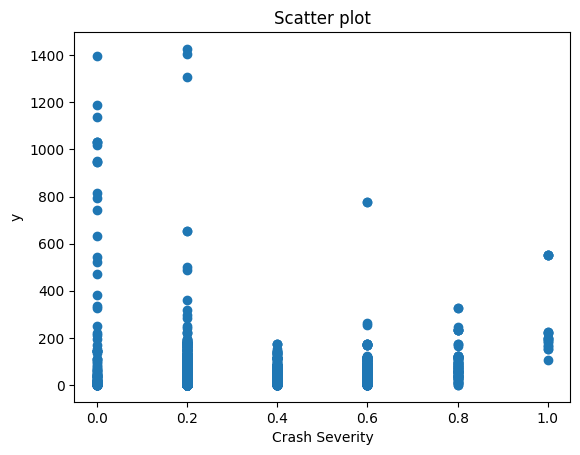

In [355]:
# Scatter plot:

plt.scatter(x, y)
plt.xlabel('Crash Severity')
plt.ylabel('y')
plt.title('Scatter plot')

As it can be observe in the Scatter Plot above, we cannot say there is a linear relatiship between our target and the severity of the crash. 

This plot indicates that the assumpition of linearity is being violated.

In [356]:
# An intercept is not included by default and should be added 
# OSL requires the input to have a column of ones
# add_constant() function will take care of this 

x = sm.add_constant(x)

# Create a linear regression model
model = sm.OLS(y,x).fit()

# Print the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.246
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0221
Time:                        20:13:00   Log-Likelihood:                -25013.
No. Observations:                4300   AIC:                         5.003e+04
Df Residuals:                    4298   BIC:                         5.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.5574      2.433     17.904      0.000      38.788      48.327
x1            16.1757      7.063      2.290      0.022       2.329      30.022
==============================================================================
Omnibus:                     6629.515   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2916216.702
Skew:                           9.744   Prob(JB):                         0.00
Kurtosis:                     129.083   Cond. No.                         6.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
y_predict = model.predict(x)
error = y - y_predict

In [358]:
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

Text(0, 0.5, 'Residuals')

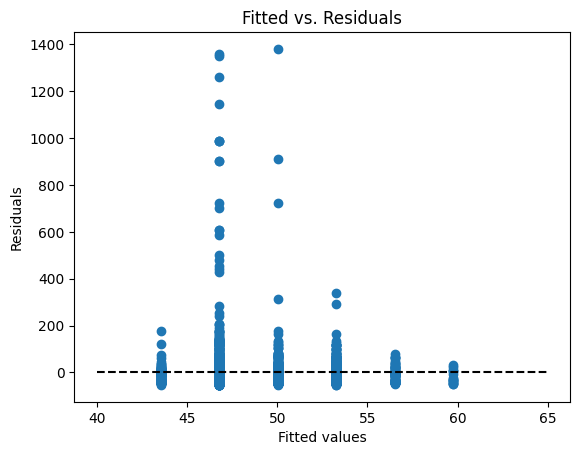

In [359]:
# plot the residual vs fitted

plt.scatter(lin['y_predict'], lin['error'])
plt.hlines(0, xmin = 40, xmax = 65, linestyles= '--', color = 'k')
plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

(-70.0, 150.0)

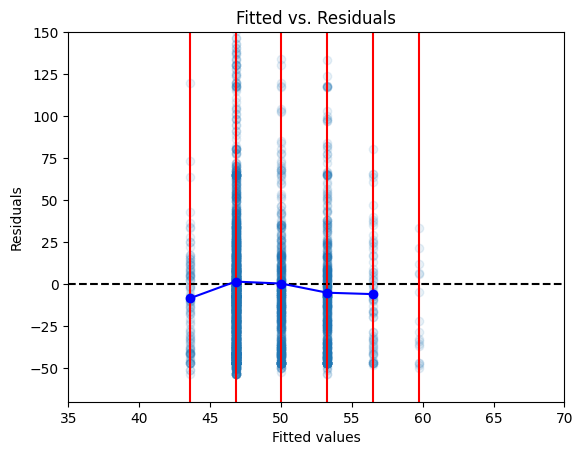

In [360]:
plt.scatter(lin['y_predict'], lin['error'], alpha = 0.1)
plt.hlines(0, xmin = 35, xmax = 70, linestyles= '--', color = 'k')

# divit the plot into 5 equal bands
vals = np.linspace(lin['y_predict'].min(), lin['y_predict'].max(), 6)
for i in range(6):
    plt.vlines(vals[i], ymin = -150, ymax = 150, color = 'red')

# Find the mean of each band
band_mean = []
for i in range(5):
    lin_band = lin[(lin['y_predict'] >= vals[i]) & (lin['y_predict'] < vals[i+1])]
    band_mean.append([lin_band['y_predict'].mean(), lin_band['error'].mean()])

plt.plot(np.array(band_mean)[:,0], np.array(band_mean)[:,1], 'o-', color = 'b')

plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Set the limits for x-axis and y-axis to zoom in
plt.xlim(35, 70)  # Adjust the x-axis limits as needed
plt.ylim(-70, 150)  # Adjust the y-axis limits as needed

Based on the plots above, we observe some significant deviation at the beginning and ending from the horizontal line. 

From the plots above, we can conclude that there is no linear relationship between x and y.

**2. Independence of Errors:**

**3. Normality of Errors:**

we utilize two insightful visualization methods to evaluate the normality assumption: a histogram of the resideals and a quantile-quantile (QQ) plot. These techniques provide valuable insights into the distribution of residuals. 

<Axes: xlabel='Target', ylabel='Count'>

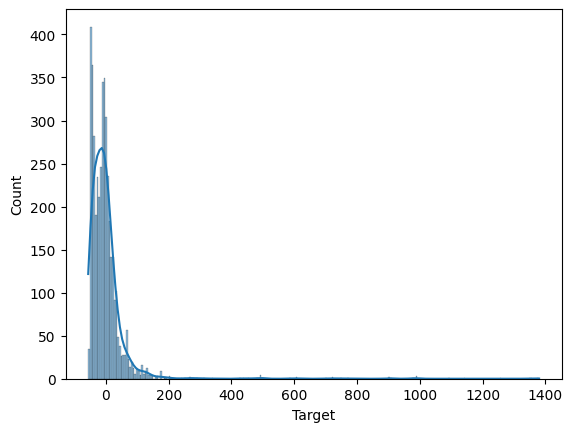

In [361]:
# Histogram

import seaborn as sns

sns.histplot(error, kde= True)

This plot does not exhibit the characteristics of a normal distribution. It is a right skewed distribution.

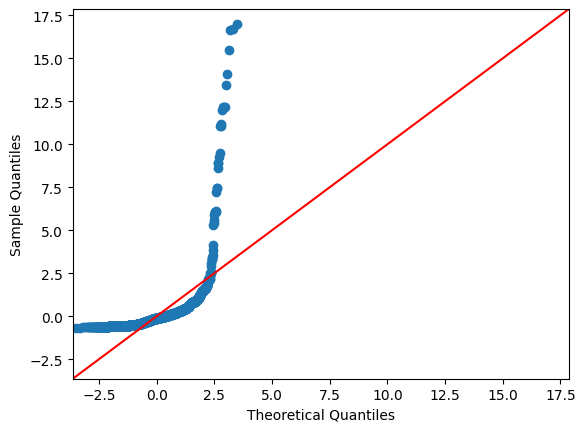

In [362]:
# QQ Plot

import statsmodels.api as sm

sm.qqplot(error, line = '45', fit = True)
plt.show()

The QQ plot shows that the blue dots do not align with the 45-degree reference line, indicating that the error distribution is not normal. The curvative in the QQ plot indicates that the error terms may have heavier or lighter tails than a normal distribution. As we mentioned above, there is a right-skewed distribution in the data.

**4- Equal Variances (Homoscedasticity):**

[[45.17494014773287, -37.792509707745744, 8.207490292254256], [48.41007926775862, -34.792509707745744, 9.73721205220275], [51.645218387784375, -35.42494014773287, 8.73721205220275], [54.880357507810125, -35.792509707745744, 8.795996832209187]]


(-70.0, 150.0)

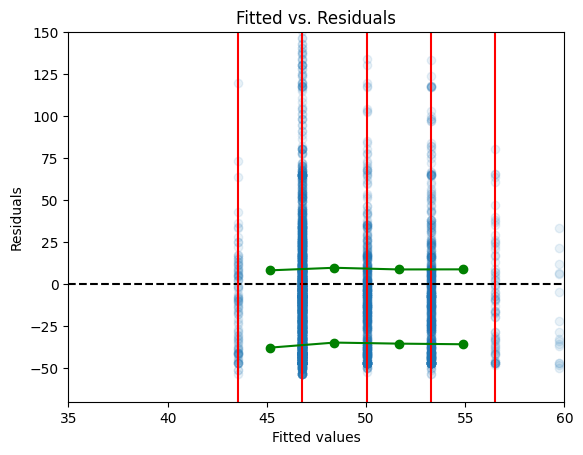

In [363]:
plt.scatter(lin['y_predict'], lin['error'], alpha = 0.1)
plt.hlines(0, xmin = 35, xmax = 70, linestyles= '--', color = 'k')

# divit the plot into 5 equal bands
vals = np.linspace(lin['y_predict'].min(), lin['y_predict'].max(), 6)
for i in range(5):
    plt.vlines(vals[i], ymin = -150, ymax = 150, color = 'red')

# Find the mean of each band
band_quantile = []
for i in range(4):
    lin_band = lin[(lin['y_predict'] >= vals[i]) & (lin['y_predict'] < vals[i+1])]
    band_quantile.append([vals[i:i+2].mean(), lin_band['error'].quantile(0.25), lin_band['error'].quantile(0.75)])

print(band_quantile)
plt.plot(np.array(band_quantile)[:,0], np.array(band_quantile)[:,1], 'o-', color = 'g')
plt.plot(np.array(band_quantile)[:,0], np.array(band_quantile)[:,2], 'o-', color = 'g')

plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Set the limits for x-axis and y-axis to zoom in

plt.xlim(35, 60) # Adjust the x-axis limits as needed
plt.ylim(-70, 150) # Adjust the y-axis as needed

Here we could say that the there are signs of equal variance as the lines are mantaining a consistent distance.

### Hypothesis Testing

Hypothesis testing is an essential step in the linear regression analysis process, even after ensuring that all the linear regression assumptions hold. 
Hypothesis testing helps determine whether the relationships observed in the data are statistically significant. Even if a linear regression model meets all the assumptions, it doesn't necessarily mean that the relationships between the variables are strong enough to be considered meaningful. Hypothesis testing allows you to assess whether the predictor variables' coefficients (slope values) are significantly different from zero.

**Source: Simple Linear Regression PowerPoint 
Author: Dr. Nassim Sohaee**

In [364]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.246
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0221
Time:                        20:13:04   Log-Likelihood:                -25013.
No. Observations:                4300   AIC:                         5.003e+04
Df Residuals:                    4298   BIC:                         5.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.5574      2.433     17.904      0.000      38.788      48.327
x1            16.1757      7.063      2.290      0.022       2.329      30.022
==============================================================================
Omnibus:                     6629.515   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2916216.702
Skew:                           9.744   Prob(JB):                         0.00
Kurtosis:                     129.083   Cond. No.                         6.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Reviewing the table above, it is evident that, based on an R-squared score of 0.001, Crash Severity has a very weak relationship with the time it takes to clean a road after a crash. 

Our team belives this to be interesting enough since we thought there might have been a correlation between the time it takes to clear the road after a car crash and the car crash severity.

## Multiple Linear Regression

Multiple Linear Regression is a statistical method used to model the relationship between a single dependent variable (or target) and two or more independent variables (or predictors). It extends the simple linear regression concept, where only one predictor variable exists. In multiple linear regression, one has to have a linear equation that includes multiple predictors to estimate or predict the value of the dependent variable.

**Source: Simple Linear Regression PowerPoint 
Author: Dr. Nassim Sohaee**

### Multicollinearity.

This occurs when two or more predictor variables in a regression model are strongly and linearly related to each other. Typically, a correlation coefficient exceeding 0.8 in absolute value between two or more predictors suggests the presence of multicollinearity.

In [365]:
corr_matrix = np.corrcoef(X_train.T)
corr_matrix

array([[ 1.00000000e+00,  5.83714800e-03,  2.71602996e-01,
        -2.12939153e-02,  4.84199466e-02, -3.43027364e-02,
         5.06940908e-03, -8.59069027e-03, -9.02263921e-03,
        -1.45038870e-02,  3.58039143e-02, -1.45038870e-02,
         7.72424276e-04, -6.41705972e-02,  1.20294462e-02,
         4.00361647e-02,  1.02069232e-02, -1.29320104e-03,
         7.67347156e-03, -1.46932981e-01,  3.15324859e-02],
       [ 5.83714800e-03,  1.00000000e+00,  3.86633544e-02,
         2.18200291e-02, -3.90505675e-02, -2.11560902e-02,
        -9.76536083e-02,  6.04192222e-02, -1.51791710e-02,
         2.05044618e-02,  6.98574848e-02, -2.58126141e-02,
         6.17703730e-02,  4.94916765e-03,  1.44132684e-02,
         2.31151152e-02,  4.84320647e-02, -6.34051147e-04,
         5.54380617e-03, -8.86819051e-03, -5.84665889e-02],
       [ 2.71602996e-01,  3.86633544e-02,  1.00000000e+00,
        -4.81080485e-02, -4.51090940e-02, -3.90436052e-03,
        -2.36987052e-02,  3.20211394e-03, -1.81922637e

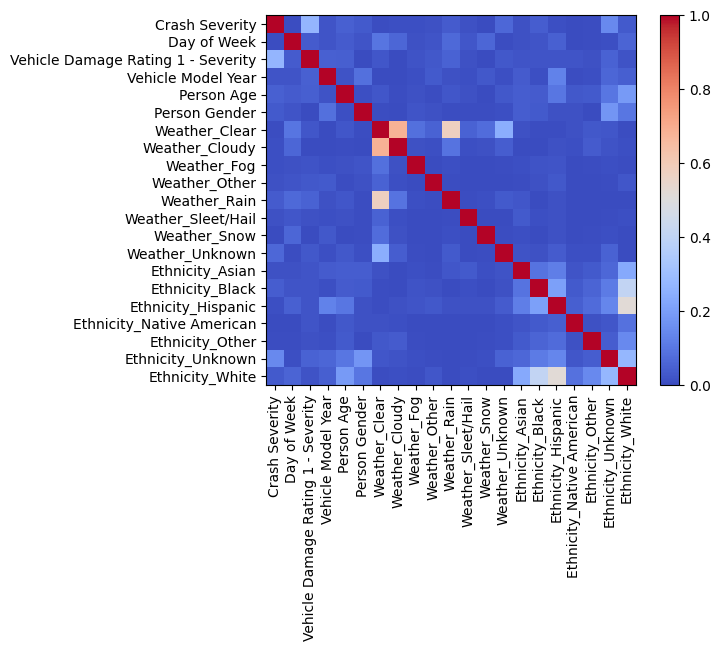

In [366]:
%matplotlib inline

import matplotlib.ticker as ticker

plt.imshow(np.abs(corr_matrix), cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(format=ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.yticks(range(X_train.shape[1]), X.columns)
plt.show()

In [367]:
# Drop the column that showed a strong and linear relationship to another column.

X_train_ols = X_train.drop('Weather_Clear', axis = 1)

In [368]:
#now, we train a multiple linear regression model on the remaining data frame y_train. What is the R-squared of this model?

import statsmodels.api as sm

x = X_train_ols.values
y = y_train

x = sm.add_constant(x)

model  = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     11.27
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.83e-34
Time:                        20:13:05   Log-Likelihood:                -24911.
No. Observations:                4300   AIC:                         4.986e+04
Df Residuals:                    4280   BIC:                         4.999e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1338      9.216      1.534      0.125      -3.935      32.203
x1            16.6598      7.275      2.290      0.022       2.397      30.923
x2             3.0060      3.871      0.777      0.437      -4.583      10.595
x3            48.9636      8.127      6.025      0.000      33.031      64.896
x4            -0.6786     10.859     -0.062      0.950     -21.968      20.611
x5            14.7304      6.474      2.275      0.023       2.039      27.422
x6             9.2037      2.525      3.646      0.000       4.254      14.153
x7             5.9939      4.085      1.467      0.142      -2.016      14.004
x8            44.6756     30.141      1.482      0.138     -14.417     103.768
x9            -3.2224     46.053     -0.070      0.944     -93.509      87.064
x10            0.9794      4.706      0.208      0.835      -8.248      10.206
x11           28.9582     46.019      0.629      0.529     -61.262     119.179
x12          -14.5564     32.596     -0.447      0.655     -78.462      49.349
x13           89.5525     10.240      8.745      0.000      69.476     109.629
x14           -6.6810      5.439     -1.228      0.219     -17.344       3.982
x15           -1.2285      3.868     -0.318      0.751      -8.812       6.355
x16           -0.8216      3.420     -0.240      0.810      -7.526       5.882
x17           -4.0764     12.463     -0.327      0.744     -28.511      20.358
x18           -6.0618      7.853     -0.772      0.440     -21.457       9.334
x19           35.8799      4.928      7.281      0.000      26.219      45.541
x20           -2.8768      3.084     -0.933      0.351      -8.922       3.168
==============================================================================
Omnibus:                     6396.481   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2452613.441
Skew:                           9.105   Prob(JB):                         0.00
Kurtosis:                     118.574   Cond. No.                     3.10e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### SLR Assumptions

**1- Linearity**

In [369]:
y_predict = model.predict(x)
error = y - y_predict

In [370]:
# Make a new data frame with two columns of y_predict and error
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

(-250.0, 1500.0)

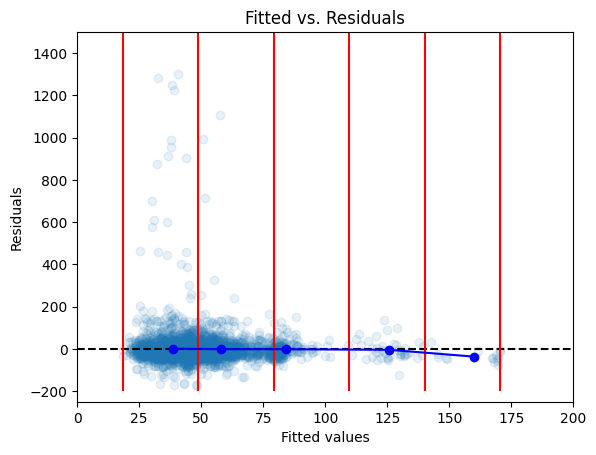

In [371]:
plt.scatter(lin['y_predict'], lin['error'], alpha = 0.1)
plt.hlines(0, xmin = 0, xmax = 200, linestyles= '--', color = 'k')

# divit the plot into 5 equal bands
vals = np.linspace(lin['y_predict'].min(), lin['y_predict'].max(), 6)
for i in range(6):
    plt.vlines(vals[i], ymin = -200, ymax = 1500, color = 'red')

# Find the mean of each band
band_mean = []
for i in range(5):
    lin_band = lin[(lin['y_predict'] >= vals[i]) & (lin['y_predict'] < vals[i+1])]
    band_mean.append([lin_band['y_predict'].mean(), lin_band['error'].mean()])

plt.plot(np.array(band_mean)[:,0], np.array(band_mean)[:,1], 'o-', color = 'b')

plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Set the limits for x-axis and y-axis to zoom in

plt.xlim(0, 200)
plt.ylim(-250, 1500)

(-150.0, 500.0)

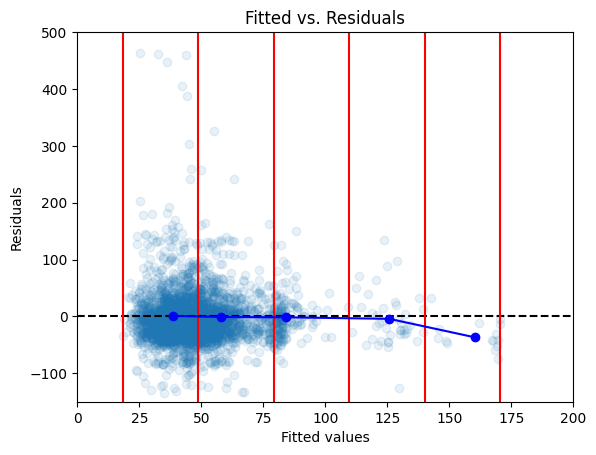

In [372]:
# zoom in

plt.scatter(lin['y_predict'], lin['error'], alpha = 0.1)
plt.hlines(0, xmin = 0, xmax = 200, linestyles= '--', color = 'k')

# divit the plot into 5 equal bands
vals = np.linspace(lin['y_predict'].min(), lin['y_predict'].max(), 6)
for i in range(6):
    plt.vlines(vals[i], ymin = -150, ymax = 500, color = 'red')

# Find the mean of each band
band_mean = []
for i in range(5):
    lin_band = lin[(lin['y_predict'] >= vals[i]) & (lin['y_predict'] < vals[i+1])]
    band_mean.append([lin_band['y_predict'].mean(), lin_band['error'].mean()])

plt.plot(np.array(band_mean)[:,0], np.array(band_mean)[:,1], 'o-', color = 'b')

plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Set the limits for x-axis and y-axis to zoom in

plt.xlim(0, 200)
plt.ylim(-150, 500)

After analyzing the plot, it appears that there is a noticeable variation from the straight line. This indicates that there is not a direct correlation between the dependnet and independent variables. The avergae of the erros is not close to zero.

**2- Independence of Errors**

Using the fitted vs. residual plot presented above, and after examining it carefully, we can see  noticeable systematic patterns meaning that the assumption of independence of errors is not being met.

**3- Normality of Errors:**

To assess the normality assumption, we make use of two visualization methods that offer valuable insights into the distribution of residuals. These methods are a histogram of the residuals and a quantile-quantile (QQ) plot.

<Axes: xlabel='Target', ylabel='Count'>

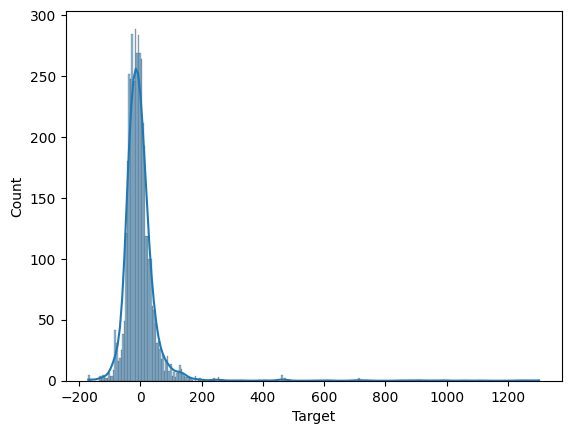

In [373]:
sns.histplot(error, kde= True)

It appears that the error data does not follow a normal distribution. We are seeing a right-skewed distribution.

**4- Equal Variances (Homoscedasticity)**

[[33.57504808792828, -29.506515902941903, 10.819480011013866], [64.02676551038184, -29.106358565910682, 13.060906516286522], [94.47848293283539, -23.632097431481906, 15.223567401292712], [124.93020035528895, -31.551159257253463, 15.850229270638248]]


(-150.0, 500.0)

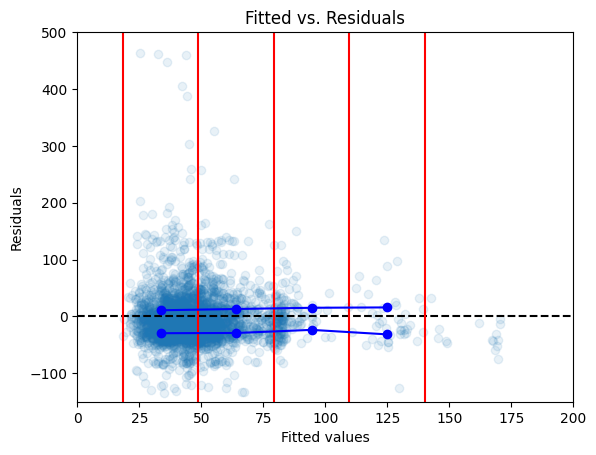

In [374]:
plt.scatter(lin['y_predict'], lin['error'], alpha = 0.1)
plt.hlines(0, xmin = 0, xmax = 200, linestyles= '--', color = 'k')

# divit the plot into 5 equal bands
vals = np.linspace(lin['y_predict'].min(), lin['y_predict'].max(), 6)
for i in range(5):
    plt.vlines(vals[i], ymin = -150, ymax = 500, color = 'red')

# Find the mean of each band
band_quantile = []
for i in range(4):
    lin_band = lin[(lin['y_predict'] >= vals[i]) & (lin['y_predict'] < vals[i+1])]
    band_quantile.append([vals[i:i+2].mean(), lin_band['error'].quantile(0.25), lin_band['error'].quantile(0.75)])

print(band_quantile)
plt.plot(np.array(band_quantile)[:,0], np.array(band_quantile)[:,1], 'o-', color = 'b')
plt.plot(np.array(band_quantile)[:,0], np.array(band_quantile)[:,2], 'o-', color = 'b')

plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Set the limits for x-axis and y-axis to zoom in

plt.xlim(0, 200)
plt.ylim(-150, 500)

### Conclusion:

Our team has concluded that the past models implemented are unfitting to the nature of our data. Since it has not been possible to meet the SRL assumptions, we have decided to continue our modeling with Machine Learning approaches.

## Machine Learning Regression Models

Troughout our exploring for the best model to predict the target for the Test CSV file, we observe the R-scores that the models give. 

"Accuracy Score (R-score) is a commonly used metric in machine learning that measures the overall correctness of predictions made by a classification model. It is a straightforward and intuitive way to evaluate how well a classification model is performing. Accuracy Score is calculated as the ratio of correct predictions to the total number of predictions made by the model." (Linear Regression Jupyter Notebook by Dr. Nassim Sohaee).

The goal is to assess how well the different models fit the data and its ability to make predictions on new, unseen data.

In [375]:
# Define X and y

X = df.drop('Target', axis = 1)
y = df['Target']

# print(y)   -- my y values i am trying to predict are continuous (int/float)  

In [376]:
# Scaling 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,Crash Severity,Day of Week,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Gender,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,...,Weather_Sleet/Hail,Weather_Snow,Weather_Unknown,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_Other,Ethnicity_Unknown,Ethnicity_White
0,0.2,0.0,0.428571,0.907407,0.204301,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.2,0.0,0.571429,0.666667,0.397849,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.4,0.0,0.142857,0.703704,0.311828,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.4,0.0,0.428571,0.888889,0.247312,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.4,0.0,0.428571,0.888889,0.258065,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Linear Regression Model usin sklearn

In [377]:
# import the necessary models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [378]:
# Fit the model to the scaled dataset

lreg = LinearRegression()
lreg.fit(X_scaled, y)


LinearRegression()

In [379]:
# print the r2-score of the model on the train dataset

print('train r2-score: ', lreg.score(X_scaled, y))


train r2-score:  0.05731070609335931


In [380]:
# we call on the .coef_ to check examine the coefficients (or weights) assigned to each feature in the linear regression model.

lreg.coef_

array([ 1.58944553e+01,  3.42292430e+00,  4.23812122e+01, -1.05598302e+00,
        1.27986138e+01,  7.08068467e+00, -1.69905973e+13, -1.69905973e+13,
       -1.69905973e+13, -1.69905973e+13, -1.69905973e+13, -1.69905973e+13,
       -1.69905973e+13, -1.69905973e+13,  1.40010587e+15,  1.40010587e+15,
        1.40010587e+15,  1.40010587e+15,  1.40010587e+15,  1.40010587e+15,
        1.40010587e+15])

In [381]:
# we check for the intercept which represents the predicted value of the target variable when 
# all predictor variables are zero. It provides the baseline prediction before considering the impact of individual features.

lreg.intercept_

-1383115273257545.0

In [382]:
# now we perform the prediction of target variable values (y_pred) based on the input features of X_scaled

y_pred = lreg.predict(X_scaled)

In [383]:
y_pred[:5]

array([47.25, 48.  , 39.  , 50.  , 50.25])

### Error Evaluation

Here we are assessing the performance of regression model applied before by quantifying the discrepancies or erros between the model's prediction and the actual observed valies fo the target variable.

In [384]:
# mean_absolute_error(actual, predicted)

# mean squared error computes the average of the squared differences between predicted and actual values:

mean_squared_error(y, y_pred)

6402.605178106399

In [385]:
# mean absolute error measures the average magnitude of the errors between predicted and actual value.

mean_absolute_error(y, y_pred)

34.626255580357146

In [386]:
r2_score(y, y_pred)

0.05731070609335931

### Model Evaluation

In [387]:
from sklearn.model_selection import train_test_split

#Split the data 20% test and 80% train

X_train, X_valid, y_train, y_valid = train_test_split(X,y, 
                                                      test_size = 0.2, random_state = 0)
# use MinMaxScaler() to scale the data 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


In [388]:
lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)

print('train r2-score: ', lreg.score(X_train_scaled, y_train))
print('validation r2-score: ', lreg.score(X_valid_scaled, y_valid))

train r2-score:  0.047482874181865475
validation r2-score:  0.07794522722870034


Our team has observed that the model's predictive capability is quite limited. The model does not effectively capture the relationships between the features and the target variable.

### SGD Regressor

In [389]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state = 0, max_iter = 15, learning_rate = 'constant', eta0 = 0.02)
sgd.fit(X_train_scaled, y_train)

print('train r2-score: ', sgd.score(X_train_scaled, y_train))
print('validation r2-score: ', sgd.score(X_valid_scaled, y_valid))

train r2-score:  0.014778841195545622
validation r2-score:  0.053046580173605085


In [390]:
# use n_inter_ to get an insight into how many iterations of the training loop were compelted during the training process.
sgd.n_iter_

9

In [391]:
train_score = []
validation_score = []
index = []

for max_iter in [15, 20, 50]:
    for eta0 in [0.1, 0.01, 0.001, 0.0001, 0.0001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X_train_scaled, y_train)
        train_score.append(sgd.score(X_train_scaled, y_train))
        validation_score.append(sgd.score(X_valid_scaled, y_valid))
        index.append((max_iter, eta0))

C:\Users\claud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\claud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\claud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\claud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

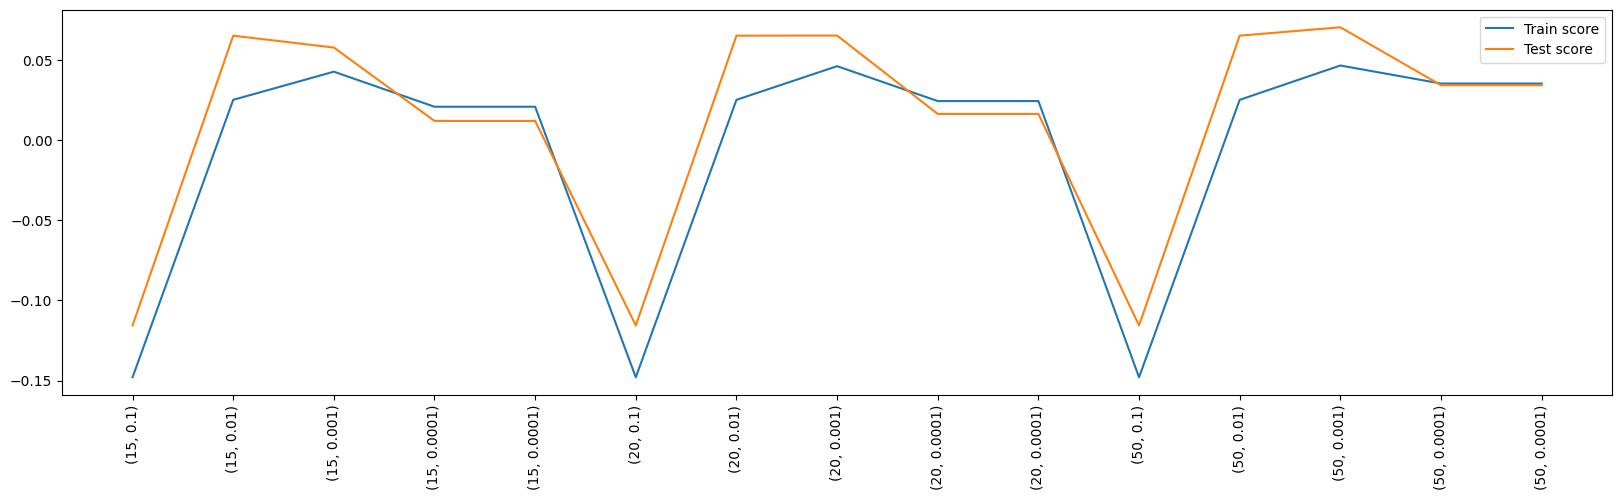

In [392]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.plot(range(len(index)), validation_score, label = 'Test score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

Based on the above plotting, we decided to test different tuples and check how the R-scores improve.

In [393]:
sgd = SGDRegressor(random_state = 0, max_iter = 15, learning_rate = 'constant', eta0 = 0.001)
sgd.fit(X_train_scaled, y_train)

print('train r2-score: ', sgd.score(X_train_scaled, y_train))
print('validation r2-score: ', sgd.score(X_valid_scaled, y_valid))

train r2-score:  0.042728106629708495
validation r2-score:  0.057785844736670255


C:\Users\claud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [394]:
sgd = SGDRegressor(random_state = 0, max_iter = 20, learning_rate = 'constant', eta0 = 0.001)
sgd.fit(X_train_scaled, y_train)

print('train r2-score: ', sgd.score(X_train_scaled, y_train))
print('validation r2-score: ', sgd.score(X_valid_scaled, y_valid))

train r2-score:  0.04616638968078868
validation r2-score:  0.06526922912506739


C:\Users\claud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


From the above plotting, we recognized the tuple (50, 0.001) as the one that aligns better both the train and test or valid scores.

In [395]:
sgd = SGDRegressor(random_state = 0, max_iter = 50, learning_rate = 'constant', eta0 = 0.001)
sgd.fit(X_train_scaled, y_train)

print('train r2-score: ', sgd.score(X_train_scaled, y_train))
print('validation r2-score: ', sgd.score(X_valid_scaled, y_valid))

train r2-score:  0.0465855100355258
validation r2-score:  0.07042727182117303


As observed, the train and validation score improved sligthly with the latest tuple that our team used. 

Nonetheless, our team will keep trying different models and see which one will give us better score to test our test dataset.

### Polynomial Regression

Linear Regression is a powerful tool for modeling relationships when they appear linear. However, it may not be the best choice when dealing with non-linear relationships or higher-degree trends, which is where polynomial regression comes into play. 

Polynomial regression offers flexibility by accommodating various polynomial degrees, making it suitable for capturing complex and curved data patterns. This flexibility addresses the trade-off between bias and variance and allows for a better fit when data exhibits peaks, valleys, or non-linear fluctuations.

It is important to remember that Linear Regression's simplicity can result in underfitting, while high-degree polynomial regression may lead to overfitting. Thus, the choice between linear and polynomial regression hinges on the dataset's characteristics and the need to balance model complexity with data fit. 

**Source: Regression Model Evaluation PowerPoint 
Author: Dr. Nassim Sohaee**

In [396]:
X_train_scaled.shape

(4300, 21)

In [397]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
poly.fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)

In [398]:
X_train_poly.shape

(4300, 253)

In [399]:
lreg = LinearRegression()
lreg.fit(X_train_poly, y_train)

print('train r2-score: ', lreg.score(X_train_poly, y_train))
print('validation r2-score: ', lreg.score(X_valid_poly, y_valid))

train r2-score:  0.16147405738329323
validation r2-score:  -2.6013963012230393e+22


In [400]:
train_score = []
validation_score = []
index = []

for max_iter in [10000, 100000, 1000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X_train_poly, y_train)
        train_score.append(sgd.score(X_train_poly, y_train))
        validation_score.append(sgd.score(X_valid_poly, y_valid))
        index.append((max_iter, eta0))

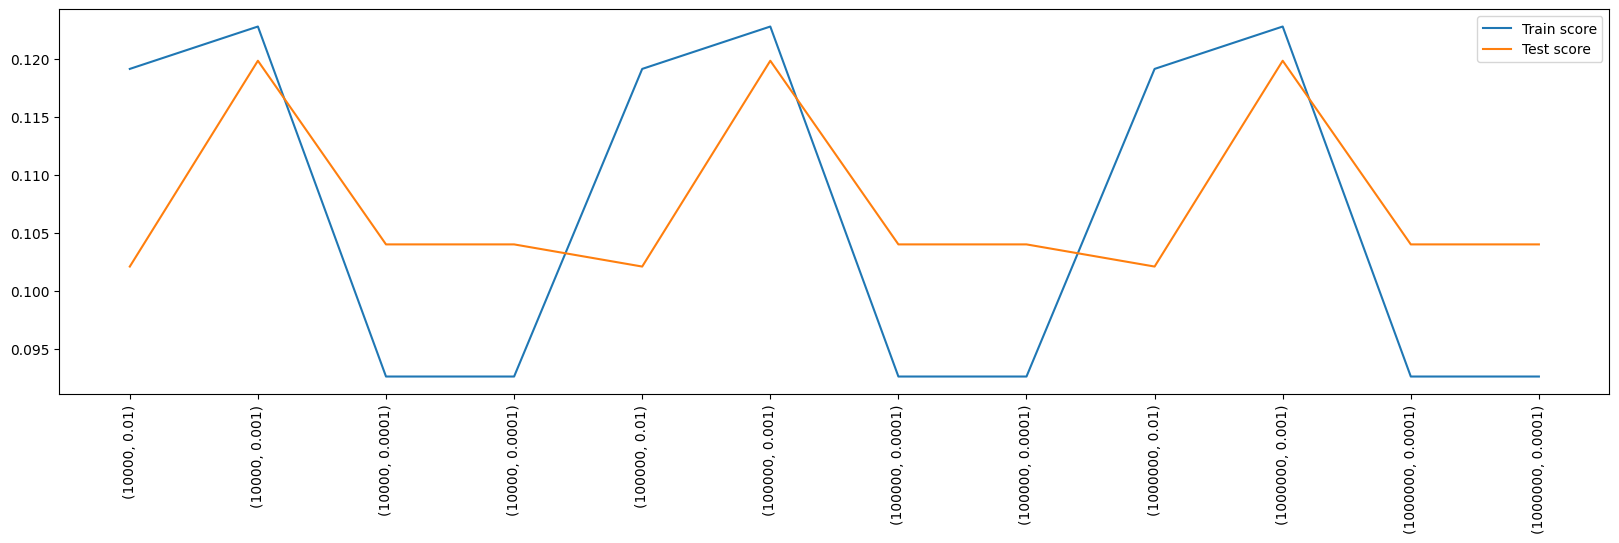

In [401]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.plot(range(len(index)), validation_score, label = 'Test score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

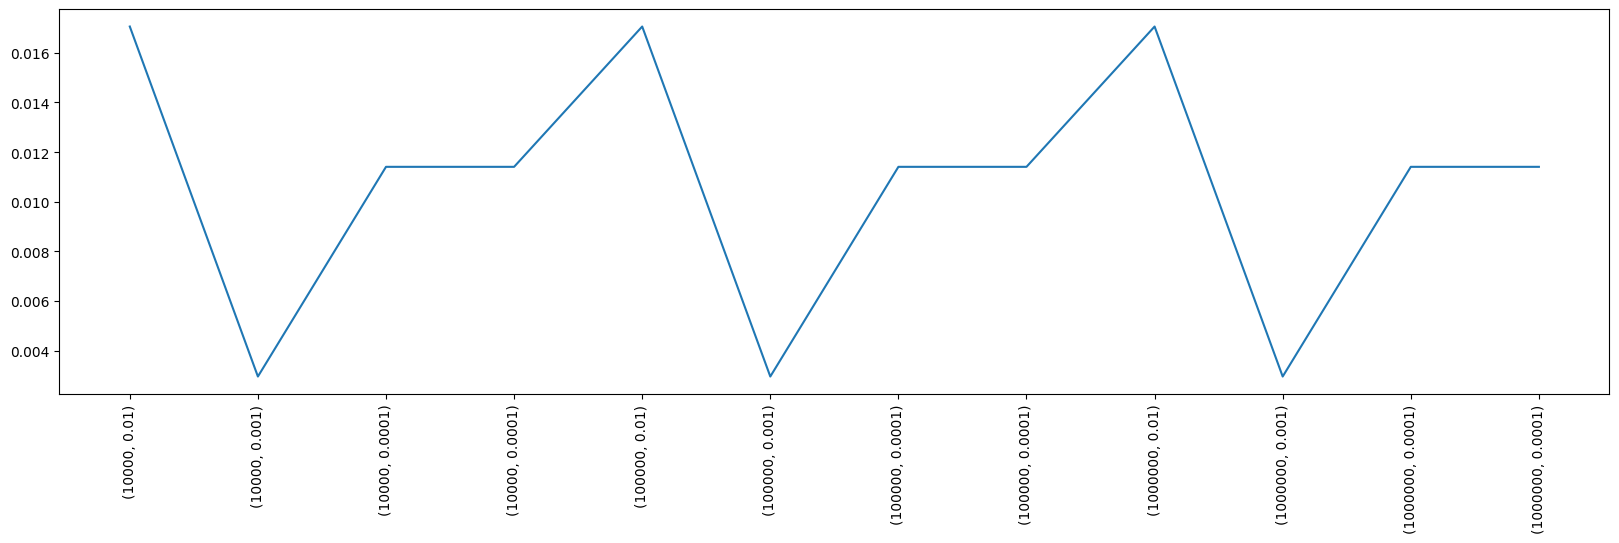

In [402]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  np.abs(np.array(train_score) - np.array(validation_score)))
plt.xticks(range(len(index)), index, rotation = 90)
plt.show()

In [403]:
sgd = SGDRegressor(random_state = 0, max_iter = 10000, learning_rate = 'constant', eta0 = 0.001)
sgd.fit(X_train_poly, y_train)

print('train r2-score: ', sgd.score(X_train_poly, y_train))
print('validation r2-score: ', sgd.score(X_valid_poly, y_valid))

train r2-score:  0.12279950564640718
validation r2-score:  0.11984592177406128


After implementing the Pollynomial Regression, we have seen an improvement in our train and validation R-scores.

### Decision Tree

Tree-based models is a type of machine learning model that operate by recursively partitioning the input data into subsets based on the values of its features. The algorithm selects the features that best separate data into distinct groups at each step, creating a tree-like structure that maps out decision rules. 

Decision Tree model is a simple and interpretable type of tree-based model that works well with both categorical and continuous data. 

**Source: Tree Models PowerPoint 
Author: Dr. Nassim Sohaee**

In [404]:
from sklearn.tree import DecisionTreeRegressor

#Building our model
Tree_regressor = DecisionTreeRegressor(random_state= 0, max_depth = 1)  ## when i give 2 - the value is decreasing 
Tree_regressor.fit(X_train_scaled, y_train)

#Testing our model performance
print('Train r2-score:', Tree_regressor.score(X_train_scaled, y_train))
print('Validation r2-score:', Tree_regressor.score(X_valid_scaled, y_valid))

Train r2-score: 0.06513657240321735
Validation r2-score: 0.012153124557384598


## Bagging Regressor:

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. 

**Source: Random Forest PowerPoint, Author: Dr. Nassim Nohaee**

In [405]:
from sklearn.ensemble import BaggingRegressor


#Building our model with random/default parameters
Tree_Model = DecisionTreeRegressor(random_state = 0)
BaggRegressor_Model = BaggingRegressor(Tree_Model, 
                                max_features=1.0, 
                                n_estimators=5, 
                                bootstrap=True, 
                                random_state=0)
BaggRegressor_Model.fit(X_train_scaled, y_train)


#Testing our model performance
print('Train r2-score:', BaggRegressor_Model.score(X_train_scaled, y_train))
print('Validation r2-score:', BaggRegressor_Model.score(X_valid_scaled, y_valid))

Train r2-score: 0.679026289828814
Validation r2-score: 0.057931170604031856


Scores have definetly improved, we are gonna attempt to tuning the hyper parameters for better results...

In [406]:
#Hyper-parameter tuning for Bagginh Regressor Model :

train_score = []
test_score = []
index = []

for n_estimators in [5, 50, 100]:    
    for max_samples in [0.1, 0.2, 0.5, 1]:
        for max_features in [0.1, 0.5, 1.0]:
            Tree_Model = DecisionTreeRegressor(random_state = 0)
            BaggRegressor_Model = BaggingRegressor(Tree_Model, 
                                max_features = max_features, 
                                n_estimators = n_estimators, 
                                max_samples = max_samples,
                                bootstrap = True, 
                                random_state=0)
            BaggRegressor_Model.fit(X_train_scaled, y_train)
            train_score.append(BaggRegressor_Model.score(X_train_scaled, y_train))
            test_score.append(BaggRegressor_Model.score(X_valid_scaled, y_valid))
            index.append((n_estimators,max_samples, max_features))

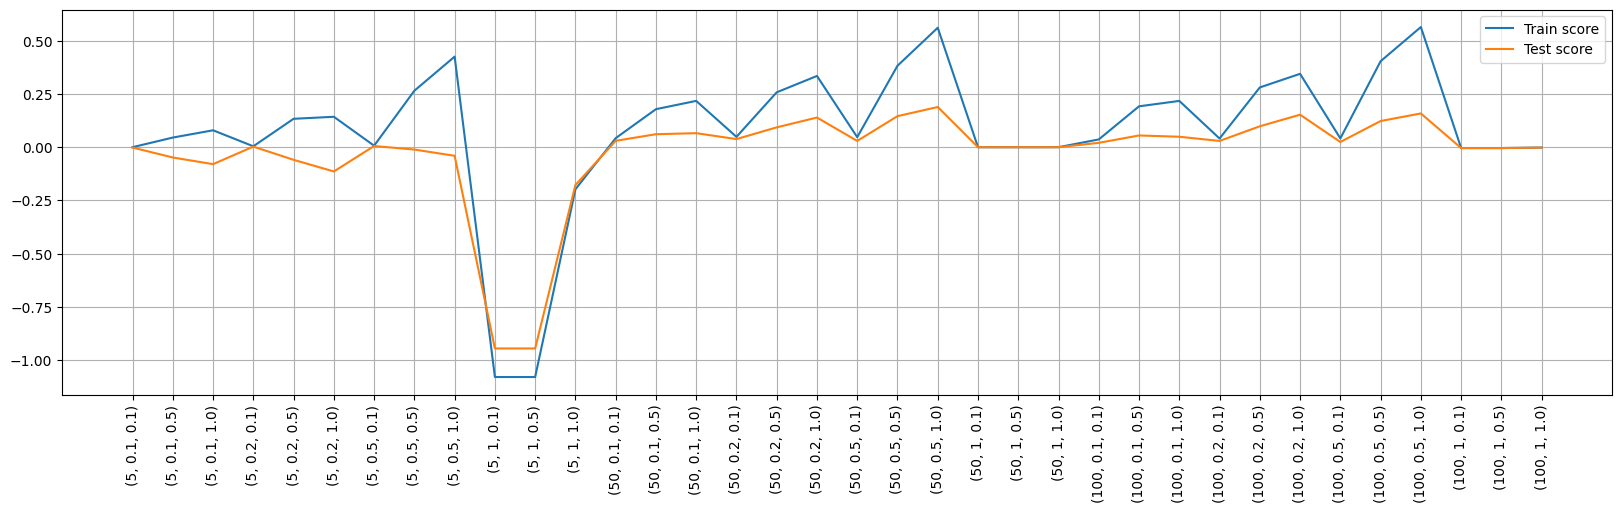

In [407]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train_score, label = 'Train score')
plt.plot(range(len(index)), test_score, label = 'Test score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

Considering the above plot, one of the best hyperparameters of this model is the tuple (50, 1, 1.0).

Now, we will be implementing the same on the above plot!

In [408]:
#Re-Running our model post fine-tuning
Tree_Model = DecisionTreeRegressor(random_state = 0)
BaggRegressor_Model = BaggingRegressor(Tree_Model, 
                                max_features = 1.0, 
                                n_estimators = 50, 
                                max_samples = 1.0,
                                bootstrap = True, 
                                random_state=0)

BaggRegressor_Model.fit(X_train_scaled, y_train)

#Testing our model performance
print('Train r2-score:', BaggRegressor_Model.score(X_train_scaled, y_train))
print('Validation r2-score:', BaggRegressor_Model.score(X_valid_scaled, y_valid))

Train r2-score: 0.7483039470789579
Validation r2-score: 0.15438939695995435


Inference: 

Our team can concluded that the model has improved based on the R-score value of both the Train and Validation datasets. However, we are being presented with an underfitting case where the R-score for the validation set is significantly lower than that of the Train set.

 ## Random Forest Regressor:

 Random Forest is a supervised machine learning algorithm that is constructed from decision tree algorithms. It is used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. 

 **Source: Random Forest PowerPoint
 Author: Dr. Nassim Sohaee**

In [409]:
from sklearn.ensemble import RandomForestRegressor

#Building our model with random/default parameters
RandomForest_Reg_Model = RandomForestRegressor(max_depth = 1, random_state=0)
RandomForest_Reg_Model.fit(X_train_scaled, y_train)

#Testing our model performance
print('Train score: ', RandomForest_Reg_Model.score(X_train_scaled, y_train))
print('Validation score: ', RandomForest_Reg_Model.score(X_valid_scaled, y_valid))

Train score:  0.07686274225328582
Validation score:  0.031301592352588004


Next, we will implement plotting strategy to see at which parameters our Train and Test or Valid score align the best.

In [410]:
train = []
test = []
index = []
for n_estimators in [100, 200, 500]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [1, 2, 5]:
                RandomForest_Reg_Model = RandomForestRegressor(random_state= 0, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features, 
                                             max_depth= max_depth)
                RandomForest_Reg_Model.fit(X_train_scaled, y_train)
                train.append(RandomForest_Reg_Model.score(X_train_scaled, y_train))
                test.append(RandomForest_Reg_Model.score(X_valid_scaled, y_valid))
                index.append((n_estimators, max_features, max_samples, max_depth))

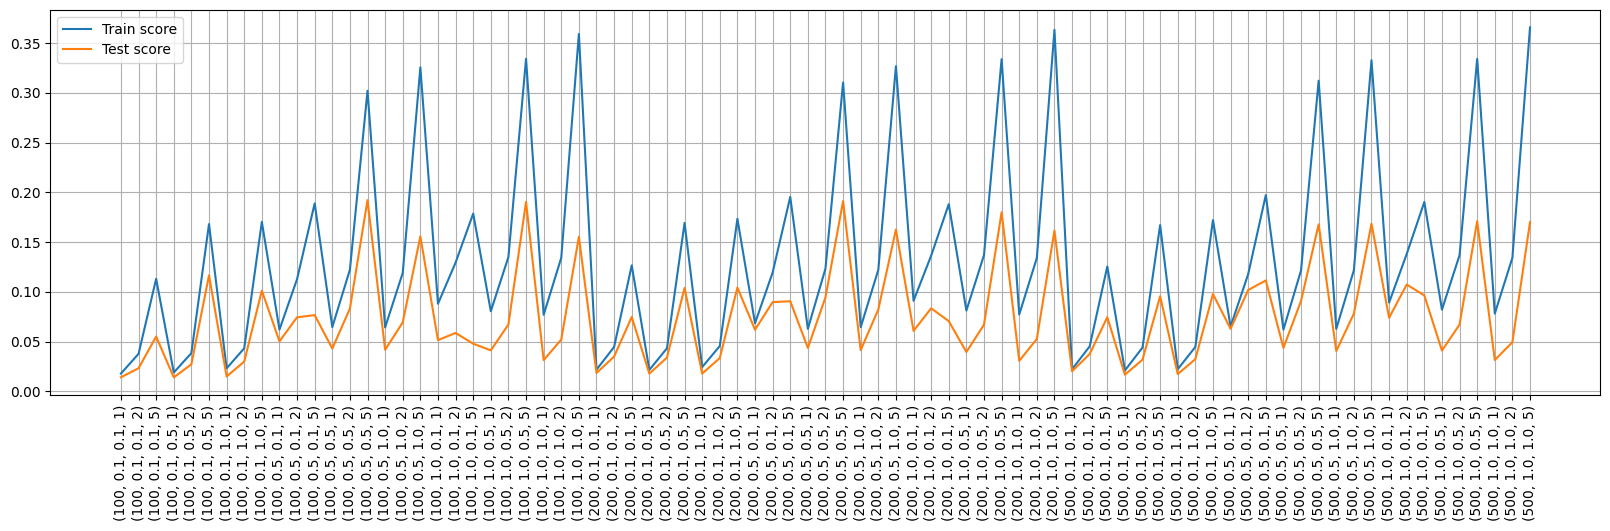

In [411]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

Considering the above plot, one of the best hyperparameters of this model is the tuple (100, 0.5, 0.5, 5).

Now, I'm implementing the same on the above plot!

In [412]:
#Re-Running our model with the tuned hyper parameters
RandomForest_Reg_Model = RandomForestRegressor(random_state= 0, n_estimators = 100, max_samples= 0.5, max_features= 0.5, max_depth = 5)
RandomForest_Reg_Model.fit(X_train_scaled, y_train)

#Testing our model performance
print('Train score: ', RandomForest_Reg_Model.score(X_train_scaled, y_train))
print('Validation score: ', RandomForest_Reg_Model.score(X_valid_scaled, y_valid))

Train score:  0.30206102688569414
Validation score:  0.1921042161386064


Inference: 

Our team can conclude that the model has improved based on the R-score value of both the Train and Validation datasets. However, we are being presented with an underfitting case where the R-score for the validation set is significantly lower than that of the Train set.

# Regression Prediction

- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 

In [413]:
df2.head()

,Crash Severity,Day of Week,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Gender,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,...,Weather_Unknown,Weather_Sleet/Hail,Weather_Snow,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_Other,Ethnicity_Unknown,Ethnicity_White
0,1,4,2,2010.0,19.0,1,False,False,True,False,...,False,0,0,False,False,False,False,False,False,True
1,1,5,3,2015.0,59.0,1,True,False,False,False,...,False,0,0,False,False,False,False,False,False,True
2,1,6,3,2009.0,41.0,0,True,False,False,False,...,False,0,0,False,True,False,False,False,False,False
3,1,4,3,2020.0,56.0,0,True,False,False,False,...,False,0,0,False,False,False,False,False,False,True
4,1,4,3,2019.0,31.0,1,True,False,False,False,...,False,0,0,False,True,False,False,False,False,False


In [414]:
scaler.fit(df2)
X2_scaled = scaler.transform(df2)

X2_scaled = pd.DataFrame(X2_scaled, columns = df2.columns)
X2_scaled.head()

,Crash Severity,Day of Week,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Gender,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,...,Weather_Unknown,Weather_Sleet/Hail,Weather_Snow,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_Other,Ethnicity_Unknown,Ethnicity_White
0,0.2,0.500000,0.285714,0.631579,0.206522,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.666667,0.428571,0.763158,0.641304,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.2,0.833333,0.428571,0.605263,0.445652,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.500000,0.428571,0.894737,0.608696,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.2,0.500000,0.428571,0.868421,0.336957,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [415]:
y_predicted = RandomForest_Reg_Model.predict(X2_scaled)

#printing our predicted time to clear the road
print(y_predicted)

# inverse the scaler:

[ 47.4159813   43.72907593  43.77199465  42.50816453  43.76754908
  45.64715211  40.72955772  43.46965261  41.30915622  40.34576925
  42.78158387  47.57736546  37.54835172  42.78163954  44.33325623
  43.75132784  45.39457959  37.60545543  42.04275597  44.43041231
  41.95260292  40.86983711  38.81548957  44.2106484   42.21314211
  45.72791557  45.52233949  45.79809495  46.76951179  43.65643815
  45.78356074  45.81011683  38.21106916  43.90403418  53.77419362
  68.1894685   53.50872614  40.79885226  60.88186969  38.49861377
  48.93280834  44.803843    42.65306349  43.8637714   40.90962577
  40.41574184  41.07302325 114.36072264  44.7777953   44.94098791
  43.74679226  44.27895346  42.31829093  44.50398223  45.99656318
  51.05440868  44.68837612  47.92185743  40.70877001  43.58944852
  37.21904961  43.30363124  40.52511346  41.50736105  42.15709408
  44.12535801  45.32129204  39.65111841  42.49877035  42.67514254
  43.05541542  42.05325979  48.98040811  38.38492788  56.03967356
  42.28577

C:\Users\claud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
